In [1]:
import pandas as pd
import numpy as np
import math
import cmath
import numpy as np
from scipy import interpolate, fftpack, signal
import matplotlib.pyplot as plt
%matplotlib inline

## Injsig

In [2]:
time=[] #collect time samples
amplitude=[] #amlitude data; collect sampled strain of GW signal
#reading .csv file and plotting its column vs column
df1=pd.read_csv('injsig.csv')
print('total number of samples is', len(df1.Time))

df1.head() #display function

total number of samples is 109674


Amplitude      Time
0   0.128988  0.000000
1  -0.074019  0.000061
2   0.169942  0.000122
3  -0.085080  0.000183
4   0.125861  0.000244

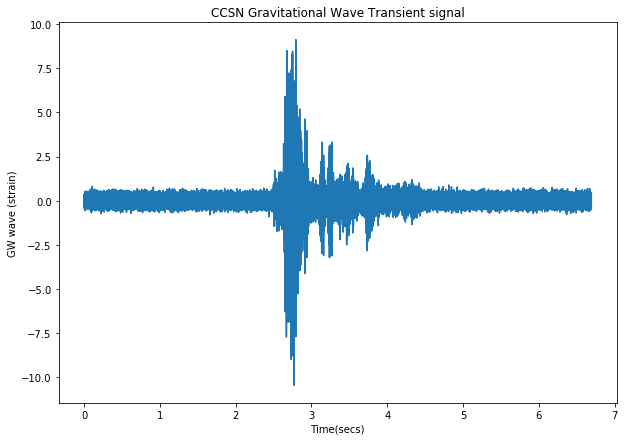

In [3]:
#plot of signal
time=df1.Time
amplitude=df1.Amplitude
plt.figure(figsize = [10,7])
plt.title('CCSN Gravitational Wave Transient signal')
plt.plot(time,amplitude)
plt.xlabel('Time(secs)')
plt.ylabel('GW wave (strain)')
plt.show()

In [4]:
#sampling period and frequency
ts=time[1]-time[0]
print('sampling time period is',ts)
print('sampling frequency is',1/ts)

sampling time period is 6.1e-05
sampling frequency is 16393.442623


In [5]:
#FT of signal
Amplitude=np.array(amplitude) #makes numpy array
Time=np.array(time)

Amp=fftpack.fft(Amplitude) #FFT of signal; complex form
f = fftpack.fftfreq(len(Time),ts) #gives corresponding frequencies
abs_Amp=abs(Amp) #magnitude of complex forms


f = fftpack.fftshift(f) #0,1,2,...-2,-1 to ...-2,-1,0,1,2,...
abs_Amp = fftpack.fftshift(abs_Amp)
    
   


Normalization condition of DFT/FFT: $$\frac{1}{N}\sum |X(f)|^2=\sum |X(t)|^2$$
where; $$X(f)=fft(X(t))$$


From Parseval's relation, we need the energy of the signal same in both time and frequency domains and follow the condition:


$$\sum |\tilde{X}(f)|^2df=\sum |X(t)|^2dt$$
where;
$$df=\frac{1}{dt*N}$$
$$\tilde{X}(f)=aX(f)$$
Here, '$a$' is the scaling factor of the signal in frequency domain to make it follow the Normalization condition.

Now, from Normalization condition, we get;

$\sum |\tilde{X}(f)|^2df=\sum |X(t)|^2dt$

or, $\sum |aX(f)|^2\frac{1}{dt*N}=\sum |X(t)|^2dt$

or, $a^2\frac{1}{N}\sum |X(f)|^2=dt^2\sum |X(t)|^2$

or, $a=dt$

Thus, we need to scale the fft by the sampling frequency $t_s=dt$

In [6]:
abs_Amp = ts*abs_Amp

In [7]:
#Verification of above relations
int_freq = sum(abs(Amp)**2)/len(Amp)
print(int_freq)
int_time = sum(Amplitude**2)
print(int_time)
print(int_time/int_freq)

df=f[1]-f[0]
int_freq = sum(abs_Amp**2)*df
print(int_freq)
int_time = sum(Amplitude**2)*ts
print(int_time)
print(int_time/int_freq)

print(ts)
print(1/ts)
print(len(time), len(abs_Amp))
print(1/len(time))
print(df)
print(1/(ts*len(time)))

40603.2567163
40603.2567162
0.999999999998
2.47679865971
2.47679865969
0.999999999991
6.1e-05
16393.442623
109674 109674
9.117931323741269e-06
0.149474283997
0.149474283996


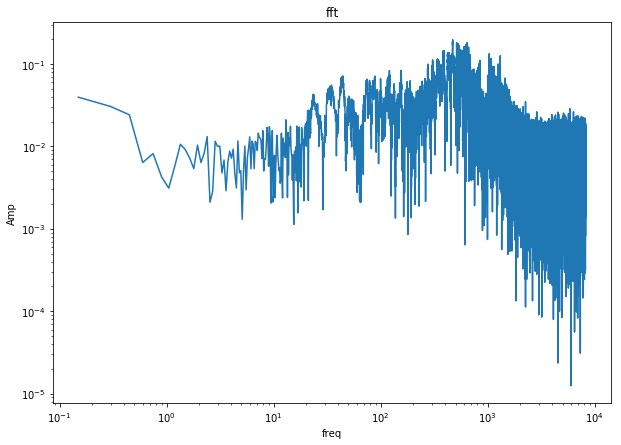

In [8]:
#frequency spectrum
n = len(f)
f = f[int(n/2)+1:n-1] #take only positive frequencies; symmetric 
abs_Amp = 2.0*abs_Amp[int(n/2)+1:n-1] #signal folded in frequency axis to conserve energy; scaled by ts from normalization condition

plt.figure(figsize = [10,7])
plt.title('fft')
plt.loglog(f, abs_Amp)
plt.xlabel('freq')
plt.ylabel('Amp')
plt.show()

# M10, M13, M19

In [9]:
#M10
time1=[]
amplitude1=[]
df2=pd.read_csv('M10.csv')
#M19
time3=[]
amplitude2=[]
df4=pd.read_excel('M19.xlsx')
#M13
time4=[]
amplitude3=[]
df5=pd.read_excel('M13.xlsx')

print('The length of M10, M19 and M13 data are respectively; ', len(df2.Time), len(df4.Time), len(df5.Time))

The length of M10, M19 and M13 data are respectively;  36864 32768 36864


In [10]:
df2.head() 

Time     Amplitude
0  1186766060  0.000000e+00
1  1186766060  4.700000e-38
2  1186766060 -2.350000e-38
3  1186766060 -1.760000e-38
4  1186766060  1.180000e-38

In [11]:
df4.head() 

Time     Amplitude
0  1.186766e+09  2.938736e-38
1  1.186766e+09  6.759093e-38
2  1.186766e+09 -2.938736e-38
3  1.186766e+09 -3.012204e-38
4  1.186766e+09  2.057115e-38

In [12]:
df5.head() 

Time     Amplitude
0  1.186766e+09 -3.232609e-38
1  1.186766e+09  6.906029e-38
2  1.186766e+09  2.057115e-38
3  1.186766e+09 -1.322431e-38
4  1.186766e+09  5.730535e-38

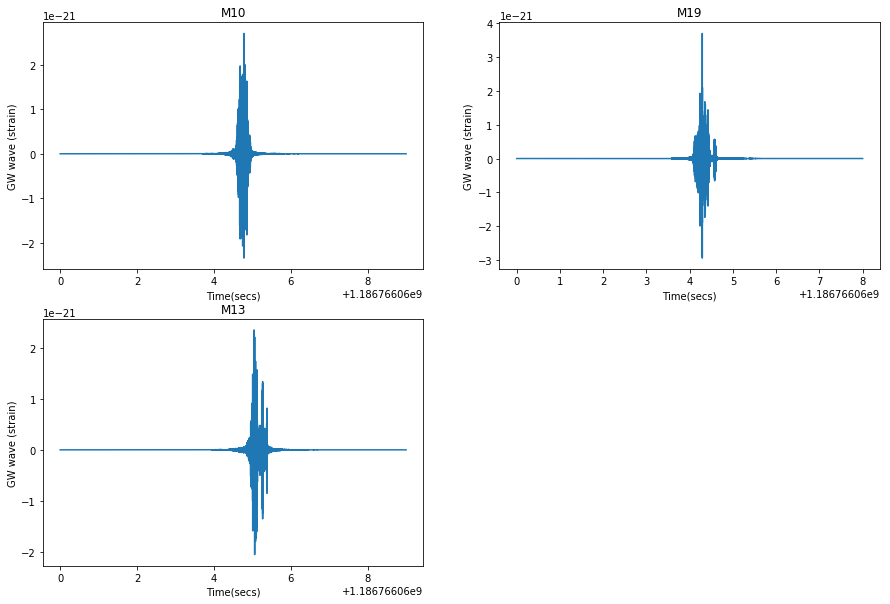

In [13]:
time1=df2.Time
amplitude1=df2.Amplitude
time3=df4.Time
amplitude2=df4.Amplitude
time4=df5.Time
amplitude3=df5.Amplitude


plt.figure(figsize = [15,10])

plt.subplot(2,2,1)
plt.title('M10')
plt.plot(time4,amplitude1)
plt.xlabel('Time(secs)')
plt.ylabel('GW wave (strain)')

plt.subplot(2,2,2)
plt.title('M19')
plt.plot(time3,amplitude2)
plt.xlabel('Time(secs)')
plt.ylabel('GW wave (strain)')

plt.subplot(2,2,3)
plt.title('M13')
plt.plot(time4,amplitude3)
plt.xlabel('Time(secs)')
plt.ylabel('GW wave (strain)')
plt.show()

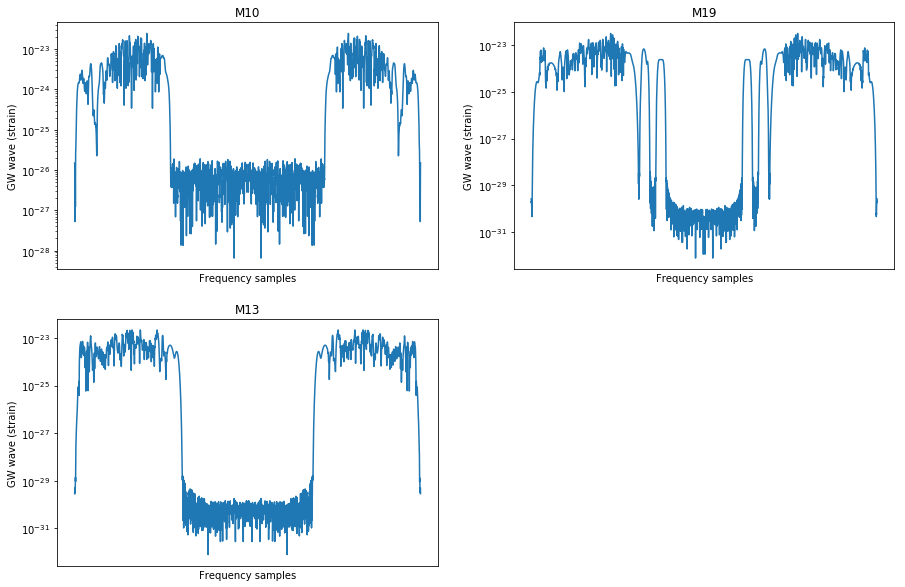

In [14]:
#both sided transform
Amplitude1=np.array(amplitude1)
Amplitude2=np.array(amplitude2)
Amplitude3=np.array(amplitude3)
Time1=np.array(time1)
Time2=np.array(time3)
Time3=np.array(time4)


ts3=Time3[1]-Time3[0] #ts1=ts3
dAmp1=np.fft.fft(Amplitude1)
df1=Time3
dabs_Amp1=abs(dAmp1)
dabs_Amp1 = ts3*dabs_Amp1

ts2=Time2[1]-Time2[0]
dAmp2=np.fft.fft(Amplitude2)
df2 = Time2
dabs_Amp2=abs(dAmp2)
dabs_Amp2 = ts2*dabs_Amp2


dAmp3=np.fft.fft(Amplitude3)
df3 = Time3
dabs_Amp3=abs(dAmp3)
dabs_Amp3 = ts3*dabs_Amp3

plt.figure(figsize = [15,10])

plt.subplot(2,2,1)
plt.title('M10')
plt.loglog(df1,dabs_Amp1)
plt.xlabel('Frequency samples')
plt.ylabel('GW wave (strain)')

plt.subplot(2,2,2)
plt.title('M19')
plt.loglog(df2,dabs_Amp2)
plt.xlabel('Frequency samples')
plt.ylabel('GW wave (strain)')

plt.subplot(2,2,3)
plt.title('M13')
plt.loglog(df3,dabs_Amp3)
plt.xlabel('Frequency samples')
plt.ylabel('GW wave (strain)')
plt.show()

In [15]:
#no negative frequencies; folding

ts3=Time3[1]-Time3[0]
Amp1=fftpack.fft(Amplitude1)
f1 = fftpack.fftfreq(len(Time1),ts3)
abs_Amp1=abs(Amp1)
f1 = fftpack.fftshift(f1)
abs_Amp1 = fftpack.fftshift(abs_Amp1)
n1 = len(f1)
f1 = f1[int(n1/2)+1:n1-1]
abs_Amp1 = ts3*2.0*abs_Amp1[int(n1/2)+1:n1-1] #ts1=ts3

ts2=Time2[1]-Time2[0]
Amp2=fftpack.fft(Amplitude2)
f2 = fftpack.fftfreq(len(Time2),ts2)
abs_Amp2=abs(Amp2)
f2 = fftpack.fftshift(f2)
abs_Amp2 = fftpack.fftshift(abs_Amp2)
n2 = len(f2)
f2 = f2[int(n2/2)+1:n2-1]
abs_Amp2 = ts2*2.0*abs_Amp2[int(n2/2)+1:n2-1]


Amp3=fftpack.fft(Amplitude3)
f3 = fftpack.fftfreq(len(Time3),ts3)
abs_Amp3=abs(Amp3)
f3 = fftpack.fftshift(f3)
abs_Amp3 = fftpack.fftshift(abs_Amp3)
n3 = len(f3)
f3 = f3[int(n3/2)+1:n3-1]
abs_Amp3 = ts3*2.0*abs_Amp3[int(n3/2)+1:n3-1]


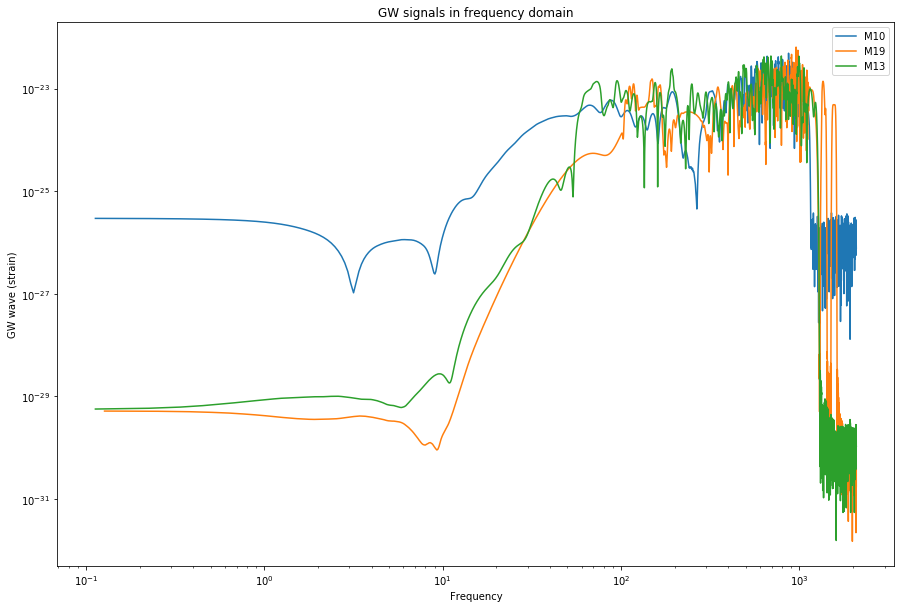

In [16]:
plt.figure(figsize = [15,10])


plt.title('GW signals in frequency domain')
plt.loglog(f1,abs_Amp1,label='M10')




plt.loglog(f2,abs_Amp2,label='M19')




plt.loglog(f3,abs_Amp3,label='M13')
plt.xlabel('Frequency')
plt.ylabel('GW wave (strain)')
plt.legend()
plt.show()

In [17]:
print(len(f1))
print(len(f2))
print(len(f3))

18430
16382
18430


## Whitened Noise data

In [18]:
time2=[]
noise=[]
df3=pd.read_excel('noiseH1.xlsx')
print('Length of the noise data; ',len(df3.Noise))

Length of the noise data;  49357


In [19]:
df3.head() 

Noise
0 -73.290241
1 -64.533752
2 -62.881756
3 -68.597933
4 -79.467850

In [20]:
noise=df3.Noise
for i in range(0,len(noise)):
    time2.append(i)

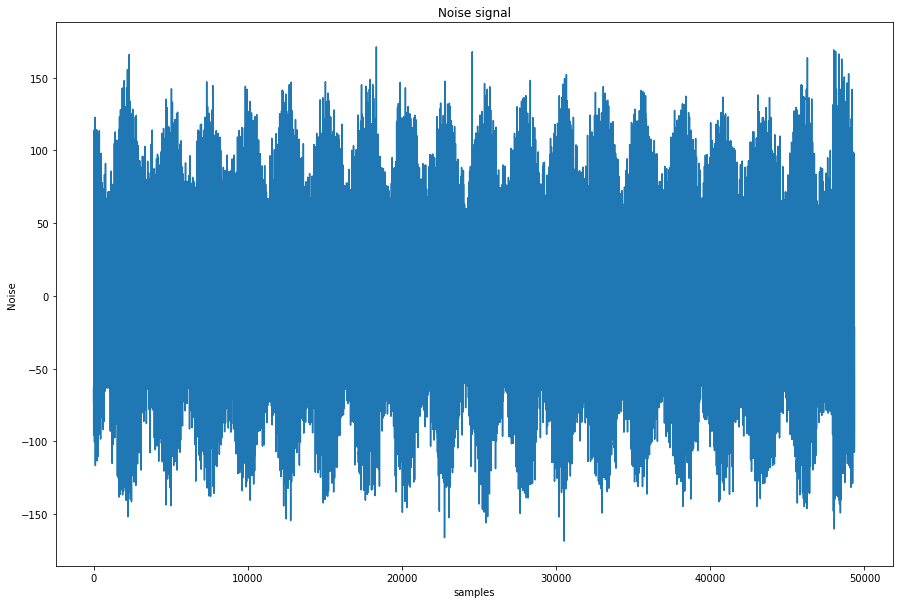

In [21]:
plt.figure(figsize = [15,10])
plt.title('Noise signal')
plt.plot(time2,noise)
plt.xlabel('samples')
plt.ylabel('Noise')
plt.show()

In [22]:
noise1=np.array(noise)
time_arr=np.array(time2)
#print(noise)

## SNR

$SNR = \sqrt{4 \int_{0}^{\infty} \frac{|\tilde{h}(f)|^2}{S_n(f)} df}$

In [23]:
def integral(apple,h):
    sum=apple[0]+apple[len(apple)-1]
    for i in range(1,len(apple)-1):
        if (i%3==0):
            sum=sum+2*apple[i]
        else:
            sum=sum+3*apple[i]
    return (3*h*sum/8)

In [24]:
noise_transformed=fftpack.fft(noise1)
fasd=fftpack.fftfreq(len(time_arr),1/16384) #sample spacing of noise signals in secs=1/16384
asd=abs(noise_transformed)
fasd = fftpack.fftshift(fasd)
asd = fftpack.fftshift(asd)
    

tck = interpolate.splrep(fasd,asd,s=0)

df2 = f2[2]-f2[1]
#asd2 = asd/(len(asd)*df2)
asd2 = asd/16384
asd2 = interpolate.splev(f2,tck,der=0) 
psd2 = asd2**2
snrsq2 = integral(abs_Amp2**2/psd2,df2)
snr2 = np.sqrt(snrsq2)

df1 = f1[2]-f1[1]
#asd1 = asd/(len(asd)*df1)
asd1 = asd/16384
asd1 = interpolate.splev(f1,tck,der=0)
psd1 = asd1**2
snrsq1 = integral(abs_Amp1**2/psd1,df1)
snr1 = np.sqrt(snrsq1)

df3 = f3[2]-f3[1]
#asd3 = asd/(len(asd)*df3)
asd3 = asd/16384
asd3 = interpolate.splev(f3,tck,der=0)
psd3 = asd3**2
snrsq3 = integral(abs_Amp3**2/psd3,df3)
snr3 = np.sqrt(snrsq3)


print('SNR of M10, M19, M13 are respectively;', snr1,snr2,snr3) 


SNR of M10, M19, M13 are respectively; 9.75820991908e-25 1.52705059341e-24 2.33687353754e-24


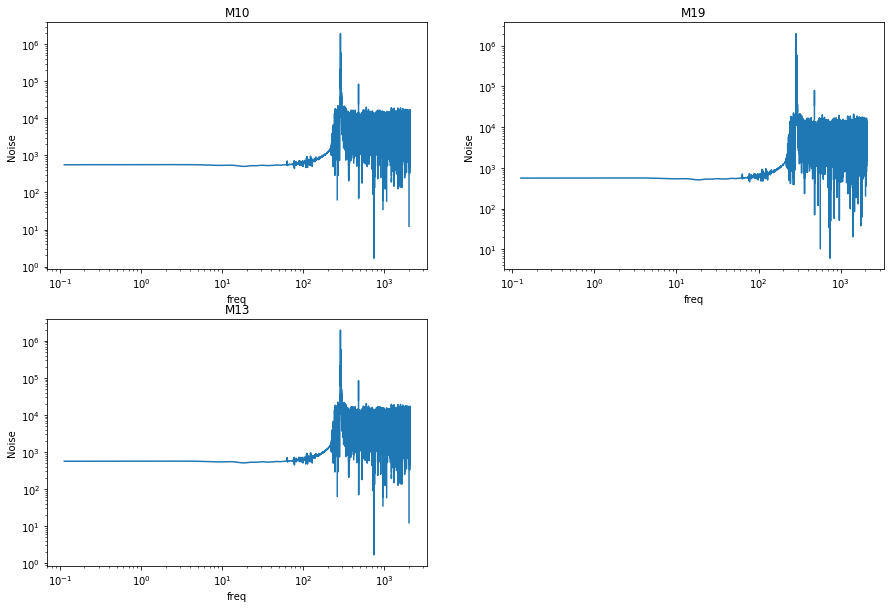

In [25]:
plt.figure(figsize = [15,10])
plt.subplot(2,2,1)
plt.title('M10')
plt.loglog(f1,asd1)
plt.xlabel('freq')
plt.ylabel('Noise')
plt.subplot(2,2,2)
plt.title('M19')
plt.loglog(f2,asd2)
plt.xlabel('freq')
plt.ylabel('Noise')
plt.subplot(2,2,3)
plt.title('M13')
plt.loglog(f3,asd3)
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

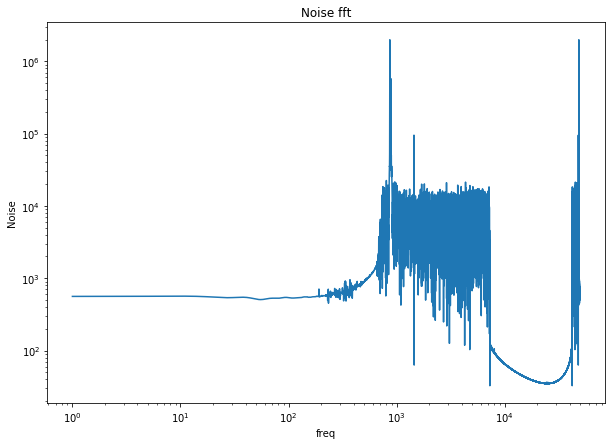

In [26]:
#complete fft noise samples
noise_transformed=fftpack.fft(noise1)
plt.figure(figsize = [10,7])
plt.title('Noise fft')
plt.loglog(time_arr,abs(noise_transformed))
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

# Non whitened noise 1

In [27]:
#import h5py
#import matplotlib.pyplot as plt
#import matplotlib as mpl
#mpl.rcParams['agg.path.chunksize'] = 10000
#f = h5py.File('L-L1_GWOSC_O2_16KHZ_R1-1164603392-4096.hdf5', 'r')
#print(list(f.keys()))
#print(list(f['strain'].keys()))
#print(type(f['strain/Strain']))
#plt.plot(f['strain/Strain'])
#plt.show()
#print(len(f))
#np.savetxt('X.txt', f['strain/Strain'])

In [28]:
#Read noise data
samples=[]
noise=[]
df1=pd.read_excel('L-L1.xlsx')
print('Length of the noise data; ',len(df1.Noise))

Length of the noise data;  983040


In [29]:
df1.head() 

Noise
0  1.018524e-18
1  1.188343e-18
2  1.377472e-18
3  1.532829e-18
4  1.670383e-18

In [30]:
noise=df1.Noise
print('The noise signal duration in seconds is;', len(noise)/16384)
samples=np.arange(0, len(noise)/16384, 1/16384)

The noise signal duration in seconds is; 60.0


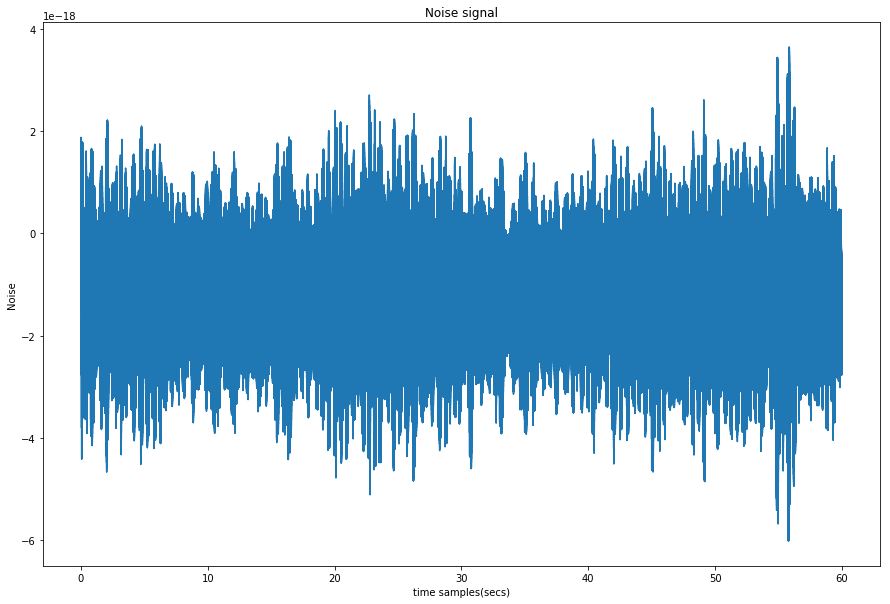

In [31]:
plt.figure(figsize = [15,10])
plt.title('Noise signal')
plt.plot(samples,noise)
plt.xlabel('time samples(secs)')
plt.ylabel('Noise')
plt.show()

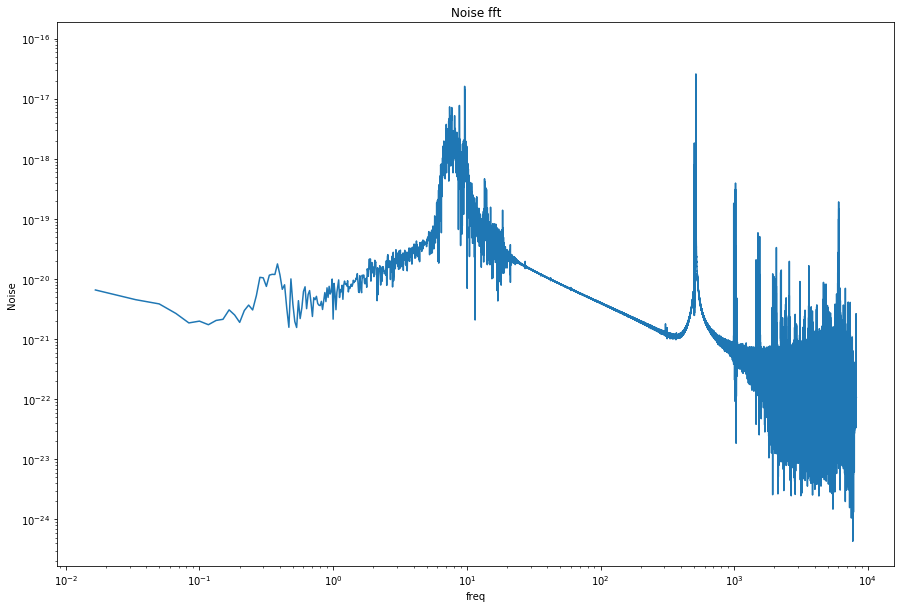

In [32]:
noise1=np.array(noise)
time_arr=np.array(samples)
noise_transformed=fftpack.fft(noise1)
fasd=fftpack.fftfreq(len(time_arr),1/16384) #sample spacing of noise signals in secs=1/16384
asd=abs(noise_transformed)
asd=asd/16384
plt.figure(figsize = [15,10])
plt.title('Noise fft')
plt.loglog(fasd,asd)
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

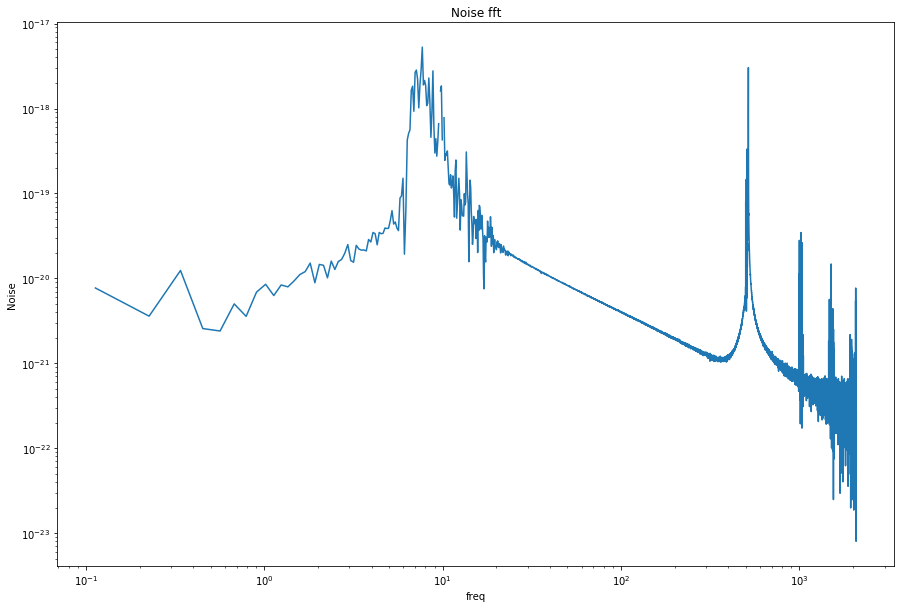

In [33]:
#For M10 signal
noise_transformed=fftpack.fft(noise1)
fasd=fftpack.fftfreq(len(time_arr),1/16384) #sample spacing of noise signals in secs=1/16384
asd=abs(noise_transformed)
df1 = f1[2]-f1[1]
#asd1 = asd/(len(asd)*df1) 
asd1 = asd/16384 #scaling from normalization condition; using df1 of signal or df1=1/16384 ??
fasd = fftpack.fftshift(fasd)
asd1 = fftpack.fftshift(asd1)
    

tck1 = interpolate.splrep(fasd,asd1,s=0) #spline interpolate using noise data
asd1 = interpolate.splev(f1,tck1,der=0) #resampling at frequency f1; to get same freq components as signal

#Now, the length of the signal has changed; df and dt also have changed




plt.figure(figsize = [15,10])
plt.title('Noise fft')
plt.loglog(f1,asd1)
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

In [34]:
print(len(asd))
print(len(asd1))
dfasd=fasd[1]-fasd[0]
print(dfasd)
print(df1)

print(1/(len(asd)*df1))
print(1/(len(asd)*dfasd))
print(1/16384)

983040
18430
0.0166666666664
0.11298686969
9.00328159332e-06
6.10351562509e-05
6.103515625e-05


In [35]:
psd1 = asd1**2


snrsq1 = sum(abs_Amp1**2/psd1)*df1
snr1 = np.sqrt(snrsq1)
print('SNR of M10 signal using direct sum;', snr1) 

snrsq1 = integral(abs_Amp1**2/psd1,df1)
print('SNR of M10 signal using SImpsons 3/8th rule;', snr1) 


SNR of M10 signal using direct sum; 0.466623593903
SNR of M10 signal using SImpsons 3/8th rule; 0.466623593903


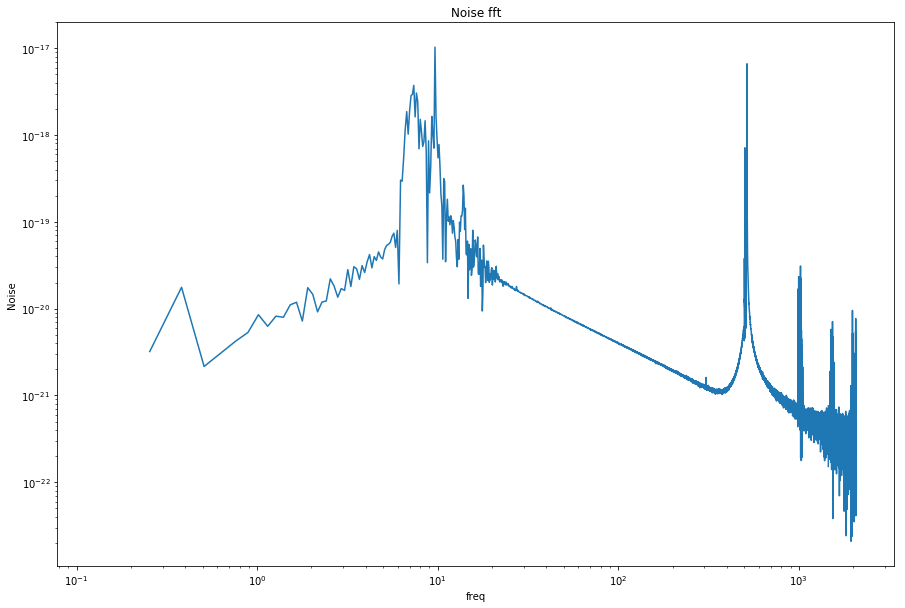

In [36]:
#For M19 signal
noise_transformed=fftpack.fft(noise1)
fasd=fftpack.fftfreq(len(time_arr),1/16384) #sample spacing of noise signals in secs=??
asd=abs(noise_transformed)
df2 = f2[2]-f2[1]
#asd2 = asd/(len(asd)*df2)
asd2 = asd/16384
fasd = fftpack.fftshift(fasd)
asd2 = fftpack.fftshift(asd2)
    

tck2 = interpolate.splrep(fasd,asd2,s=0)
asd2 = interpolate.splev(f2,tck2,der=0) 





plt.figure(figsize = [15,10])
plt.title('Noise fft')
plt.loglog(f2,asd2)
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

In [37]:
psd2 = asd2**2


snrsq2 = sum(abs_Amp2**2/psd2)*df2
snr2 = np.sqrt(snrsq2)
print('SNR of M19 signal using direct sum;', snr2) 

snrsq2 = integral(abs_Amp2**2/psd2,df2)
snr2 = np.sqrt(snrsq2)
print('SNR of M19 signal using SImpsons 3/8th rule;', snr2) 

SNR of M19 signal using direct sum; 0.626673172407
SNR of M19 signal using SImpsons 3/8th rule; 0.627713660766


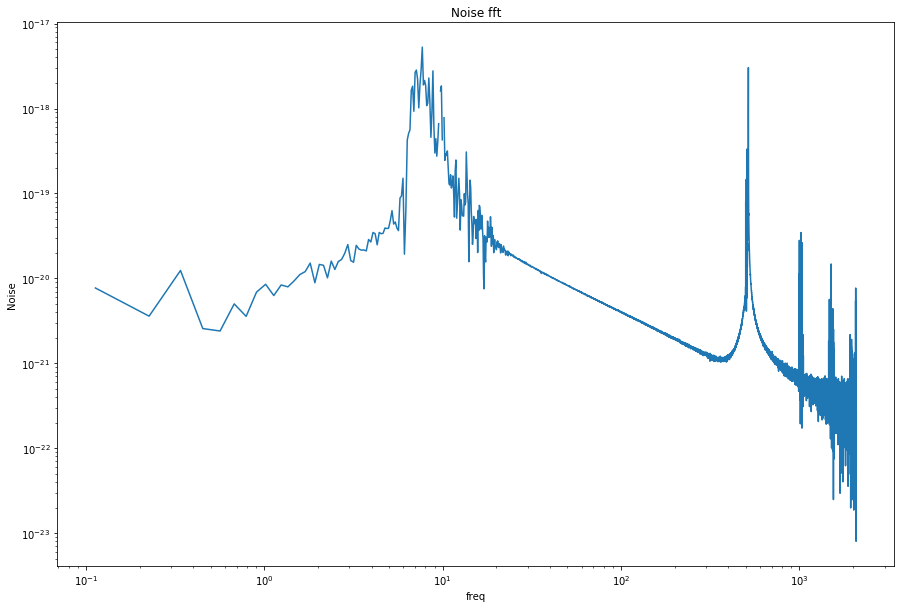

In [38]:
#For M13 signal
noise_transformed=fftpack.fft(noise1)
fasd=fftpack.fftfreq(len(time_arr),1/16384) #sample spacing of noise signals in secs=??
asd=abs(noise_transformed)
df3 = f3[2]-f3[1]
#asd3 = asd/(len(asd)*df3)
asd3 = asd/16384
fasd = fftpack.fftshift(fasd)
asd3 = fftpack.fftshift(asd3)
    

tck3 = interpolate.splrep(fasd,asd3,s=0)
asd3 = interpolate.splev(f3,tck3,der=0) 





plt.figure(figsize = [15,10])
plt.title('Noise fft')
plt.loglog(f3,asd3)
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

In [39]:
psd3 = asd3**2


snrsq3 = sum(abs_Amp3**2/psd3)*df3
snr3 = np.sqrt(snrsq3)
print('SNR of M13 signal using Direct sum;', snr3) 

snrsq3 = integral(abs_Amp3**2/psd3,df3)
snr3 = np.sqrt(snrsq3)
print('SNR of M13 signal using SImpsons 3/8th rule;', snr3) 

SNR of M13 signal using Direct sum; 0.42768845808
SNR of M13 signal using SImpsons 3/8th rule; 0.427930913718


## Morozova2018

In [40]:
#Read noise data
samples=[]
noise=[]
df1=pd.read_excel('Morozova2018.xlsx')
print('Length of the noise data; ',len(df1.Noise))

Length of the noise data;  36019


In [41]:
df1.head() 

Time     Noise
0 -0.259447  0.000147
1 -0.259398  0.000147
2 -0.259345  0.000147
3 -0.259291  0.000147
4 -0.259245  0.000147

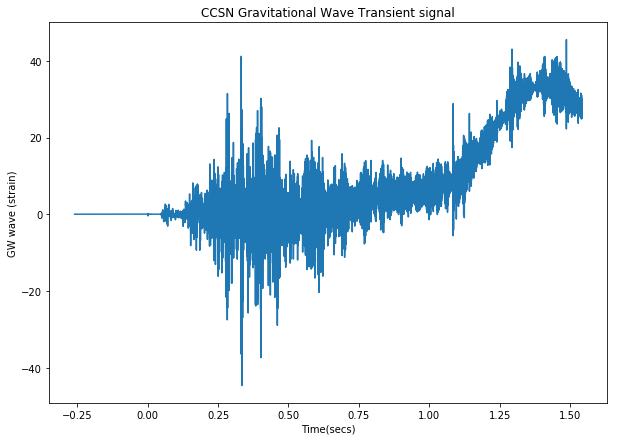

In [42]:
#plot of signal
time=df1.Time
amplitude=df1.Noise
plt.figure(figsize = [10,7])
plt.title('CCSN Gravitational Wave Transient signal')
plt.plot(time,amplitude)
plt.xlabel('Time(secs)')
plt.ylabel('GW wave (strain)')
plt.show()

In [43]:
#sampling period and frequency
ts=time[1]-time[0]
fs=1/ts
print('sampling time period is',ts)
print('sampling frequency is',fs)

sampling time period is 4.90754900001e-05
sampling frequency is 20376.770563


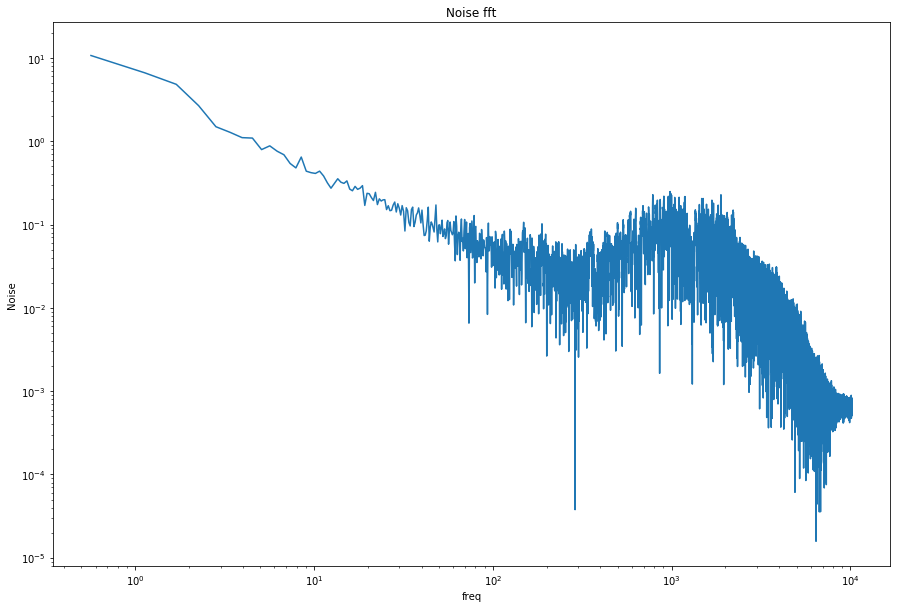

In [44]:
noise1=np.array(amplitude)
time_arr=np.array(time)
noise_transformed=fftpack.fft(noise1)
fasd=fftpack.fftfreq(len(time_arr),ts) #sample spacing of noise signals in secs
asd=ts*abs(noise_transformed)
plt.figure(figsize = [15,10])
plt.title('Noise fft')
plt.loglog(fasd,asd)
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

## O3H1, O3L1

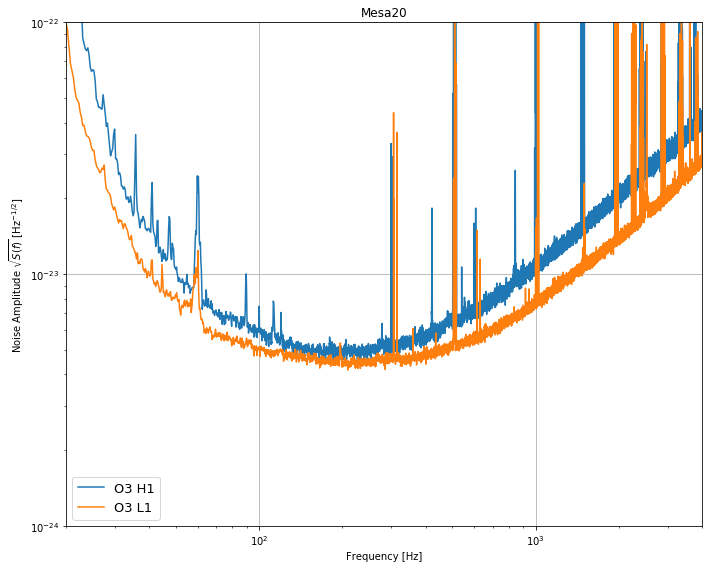

In [45]:
O3H1 = np.loadtxt("aligo_O3actual_H1.txt")
O3L1 = np.loadtxt("aligo_O3actual_L1.txt")

plt.figure(figsize=(10,8))
plt.title('Mesa20')
plt.loglog(O3H1[:,0],O3H1[:,1],label="O3 H1")
plt.loglog(O3L1[:,0],O3L1[:,1],label="O3 L1")
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'Noise Amplitude $\sqrt{S(f)}$ [Hz$^{-1/2}$]')
plt.xlim([20.0,4.0e3])
plt.ylim([1.0e-24,1.0e-22])
plt.legend(fontsize=13)
plt.grid()
plt.tight_layout()
plt.savefig("mesa20.png")
plt.show()

# SNR calculations taking O3H1 noise 

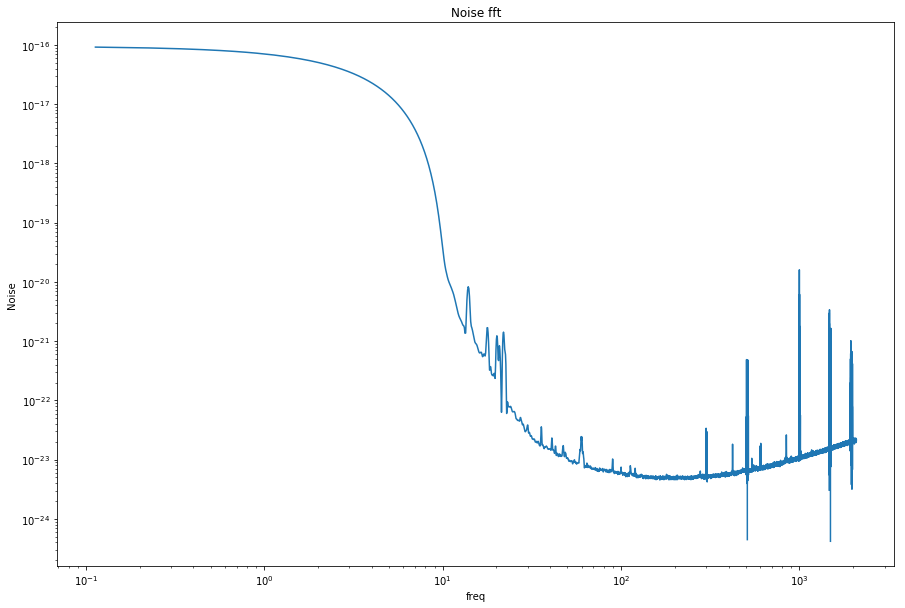

In [46]:
#For M10 signal


    

tck1 = interpolate.splrep(O3H1[:,0],O3H1[:,1],s=0) #spline interpolate using noise data
asd1 = interpolate.splev(f1,tck1,der=0) #resampling at frequency f1; to get same freq components as signal

#Now, the length of the signal has changed; df and dt also have changed
asd1H1=asd1



plt.figure(figsize = [15,10])
plt.title('Noise fft')
plt.loglog(f1,asd1)
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

In [47]:
print(len(asd1))
print(len(abs_Amp1))

18430
18430


In [48]:
asd1=np.array(asd1)
psd1 = asd1**2

df1 = f1[2]-f1[1]
snrsq1 = sum(abs_Amp1**2/psd1)*df1
snr1 = np.sqrt(snrsq1)
print('SNR of M10 signal using direct sum;', snr1) 

snrsq1 = integral(abs_Amp1**2/psd1,df1)
snr1 = np.sqrt(snrsq1)
print('SNR of M10 signal using SImpsons 3/8th rule;', snr1) 

SNR of M10 signal using direct sum; 56.2080288442
SNR of M10 signal using SImpsons 3/8th rule; 56.2816309401


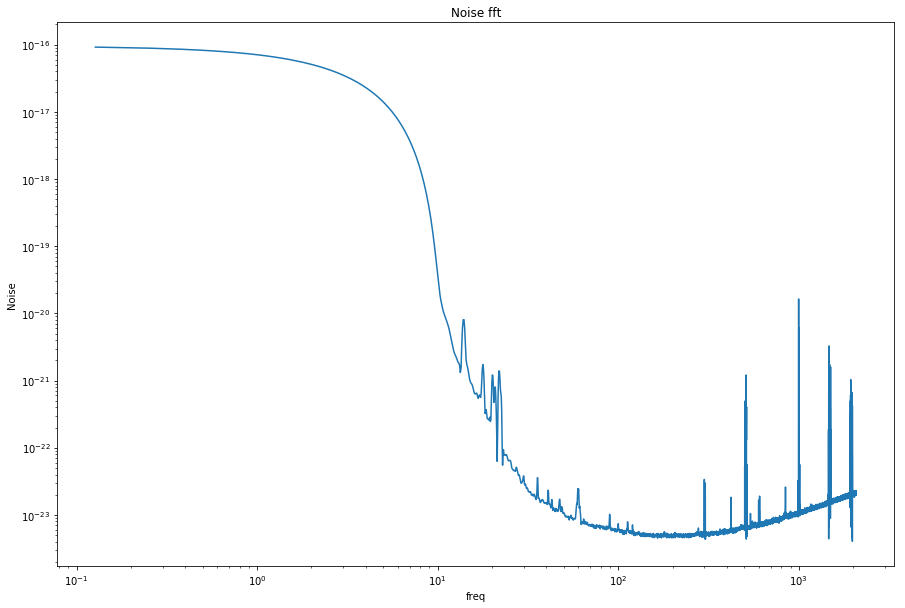

In [49]:
#For M19 signal


    

tck2 = interpolate.splrep(O3H1[:,0],O3H1[:,1],s=0) #spline interpolate using noise data
asd2 = interpolate.splev(f2,tck2,der=0) #resampling at frequency f2; to get same freq components as signal

#Now, the length of the signal has changed; df and dt also have changed

asd2H1=asd2


plt.figure(figsize = [15,10])
plt.title('Noise fft')
plt.loglog(f2,asd2)
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

In [50]:
print(len(asd2))
print(len(abs_Amp2))

16382
16382


In [51]:
asd2=np.array(asd2)
psd2 = asd2**2

df2 = f2[2]-f2[1]
snrsq2 = sum(abs_Amp2**2/psd2)*df2
snr2 = np.sqrt(snrsq2)
print('SNR of M19 signal using direct sum;', snr2) 

snrsq2 = integral(abs_Amp2**2/psd2,df2)
snr2 = np.sqrt(snrsq2)
print('SNR of M19 signal using SImpsons 3/8th rule;', snr2) 

SNR of M19 signal using direct sum; 50.3300865169
SNR of M19 signal using SImpsons 3/8th rule; 50.3292238564


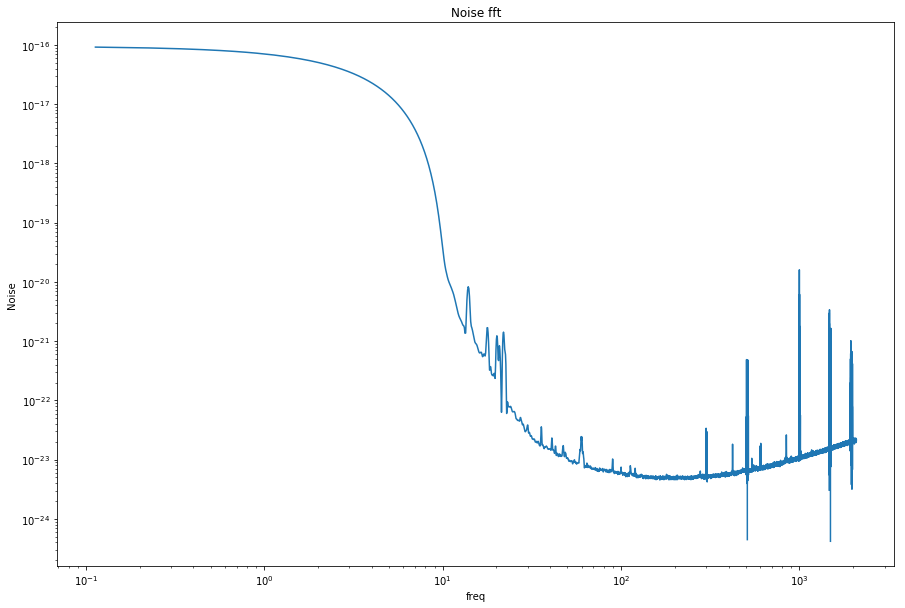

In [52]:
#For M13 signal


    

tck3 = interpolate.splrep(O3H1[:,0],O3H1[:,1],s=0) #spline interpolate using noise data
asd3 = interpolate.splev(f3,tck3,der=0) #resampling at frequency f3; to get same freq components as signal

#Now, the length of the signal has changed; df and dt also have changed

asd3H1=asd3


plt.figure(figsize = [15,10])
plt.title('Noise fft')
plt.loglog(f3,asd3)
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

In [53]:
print(len(asd3))
print(len(abs_Amp3))

18430
18430


In [54]:
asd3=np.array(asd3)
psd3 = asd3**2

df3 = f3[2]-f3[1]
snrsq3 = sum(abs_Amp3**2/psd3)*df3
snr3 = np.sqrt(snrsq3)
print('SNR of M13 signal using direct sum;', snr3) 

snrsq3 = integral(abs_Amp3**2/psd3,df3)
snr3 = np.sqrt(snrsq3)
print('SNR of M13 signal using SImpsons 3/8th rule;', snr3) 

SNR of M13 signal using direct sum; 56.377334395
SNR of M13 signal using SImpsons 3/8th rule; 56.4141315744


## SNR calculations taking O3L1 noise

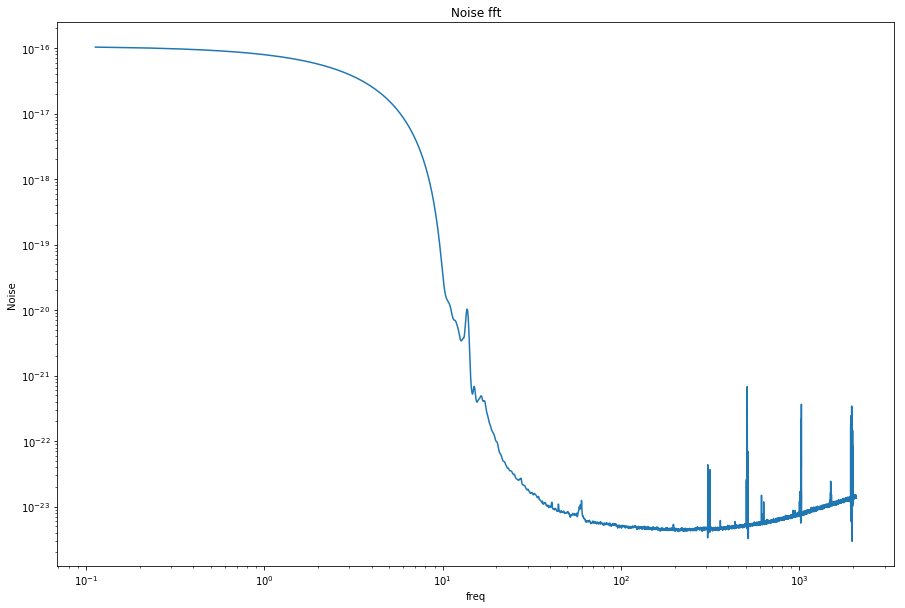

In [55]:
#For M10 signal


    

tck1 = interpolate.splrep(O3L1[:,0],O3L1[:,1],s=0) #spline interpolate using noise data
asd1 = interpolate.splev(f1,tck1,der=0) #resampling at frequency f1; to get same freq components as signal

#Now, the length of the signal has changed; df and dt also have changed

asd1L1=asd1


plt.figure(figsize = [15,10])
plt.title('Noise fft')
plt.loglog(f1,asd1)
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

In [56]:
print(len(asd1))
print(len(abs_Amp1))

18430
18430


In [57]:
asd1=np.array(asd1)
psd1 = asd1**2

df1 = f1[2]-f1[1]
snrsq1 = sum(abs_Amp1**2/psd1)*df1
snr1 = np.sqrt(snrsq1)
print('SNR of M10 signal using direct sum;', snr1) 

snrsq1 = integral(abs_Amp1**2/psd1,df1)
snr1 = np.sqrt(snrsq1)
print('SNR of M10 signal using SImpsons 3/8th rule;', snr1) 

SNR of M10 signal using direct sum; 73.1101331737
SNR of M10 signal using SImpsons 3/8th rule; 72.9870814369


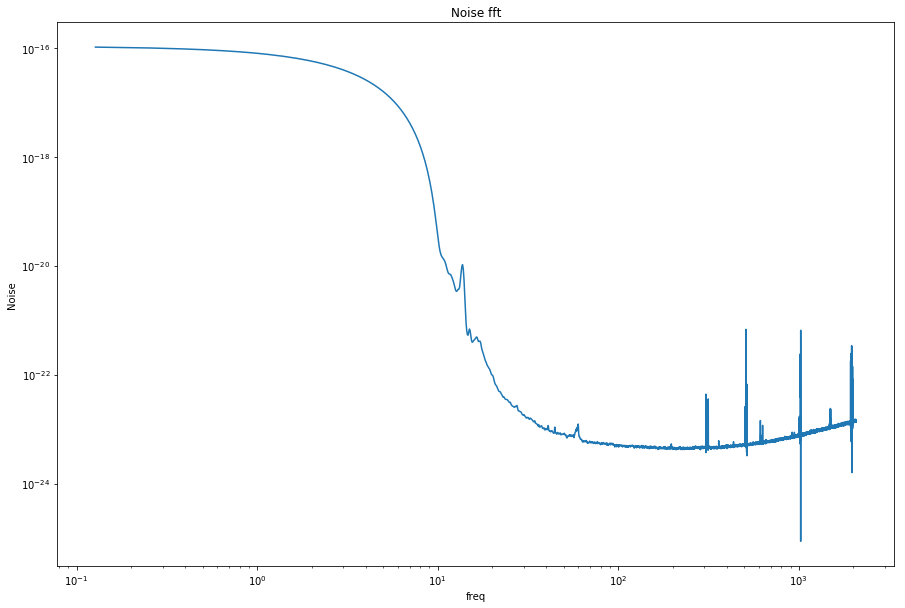

In [58]:
#For M19 signal


    

tck2 = interpolate.splrep(O3L1[:,0],O3L1[:,1],s=0) #spline interpolate using noise data
asd2 = interpolate.splev(f2,tck2,der=0) #resampling at frequency f2; to get same freq components as signal

#Now, the length of the signal has changed; df and dt also have changed

asd2L1=asd2


plt.figure(figsize = [15,10])
plt.title('Noise fft')
plt.loglog(f2,asd2)
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

In [59]:
print(len(asd2))
print(len(abs_Amp2))

16382
16382


In [60]:
asd2=np.array(asd2)
psd2 = asd2**2

df2 = f2[2]-f2[1]
snrsq2 = sum(abs_Amp2**2/psd2)*df2
snr2 = np.sqrt(snrsq2)
print('SNR of M19 signal using direct sum;', snr2) 

snrsq2 = integral(abs_Amp2**2/psd2,df2)
snr2 = np.sqrt(snrsq2)
print('SNR of M19 signal using SImpsons 3/8th rule;', snr2) 

SNR of M19 signal using direct sum; 102.090897883
SNR of M19 signal using SImpsons 3/8th rule; 105.623431103


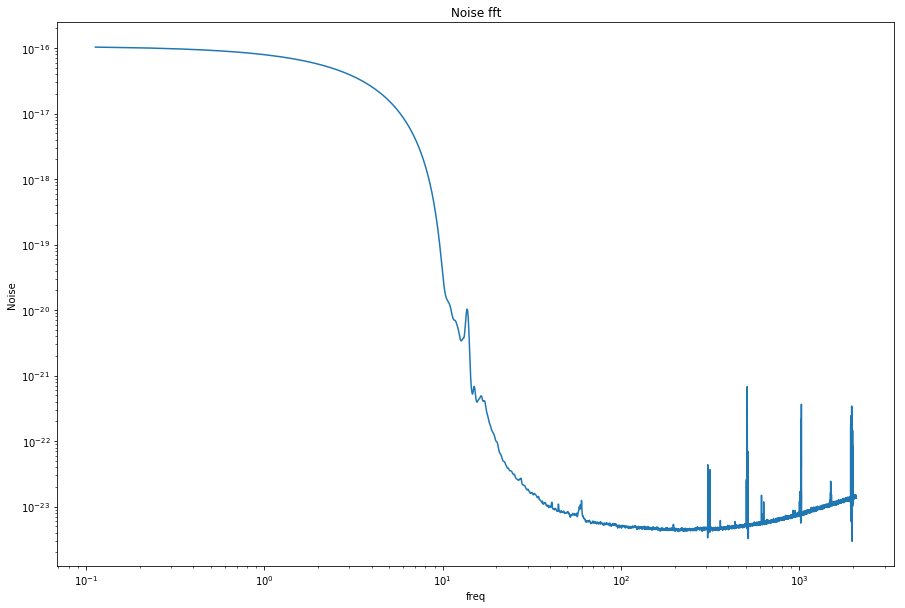

In [61]:
#For M13 signal


    

tck3 = interpolate.splrep(O3L1[:,0],O3L1[:,1],s=0) #spline interpolate using noise data
asd3 = interpolate.splev(f3,tck3,der=0) #resampling at frequency f3; to get same freq components as signal

#Now, the length of the signal has changed; df and dt also have changed

asd3L1=asd3


plt.figure(figsize = [15,10])
plt.title('Noise fft')
plt.loglog(f3,asd3)
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

In [62]:
print(len(asd3))
print(len(abs_Amp3))

18430
18430


In [63]:
asd3=np.array(asd3)
psd3 = asd3**2

df3 = f3[2]-f3[1]
snrsq3 = sum(abs_Amp3**2/psd3)*df3
snr3 = np.sqrt(snrsq3)
print('SNR of M13 signal using direct sum;', snr3) 

snrsq3 = integral(abs_Amp3**2/psd3,df3)
snr3 = np.sqrt(snrsq3)
print('SNR of M13 signal using SImpsons 3/8th rule;', snr3) 

SNR of M13 signal using direct sum; 72.5835680694
SNR of M13 signal using SImpsons 3/8th rule; 72.5811045024


##  Pure Signal and Noise spectra

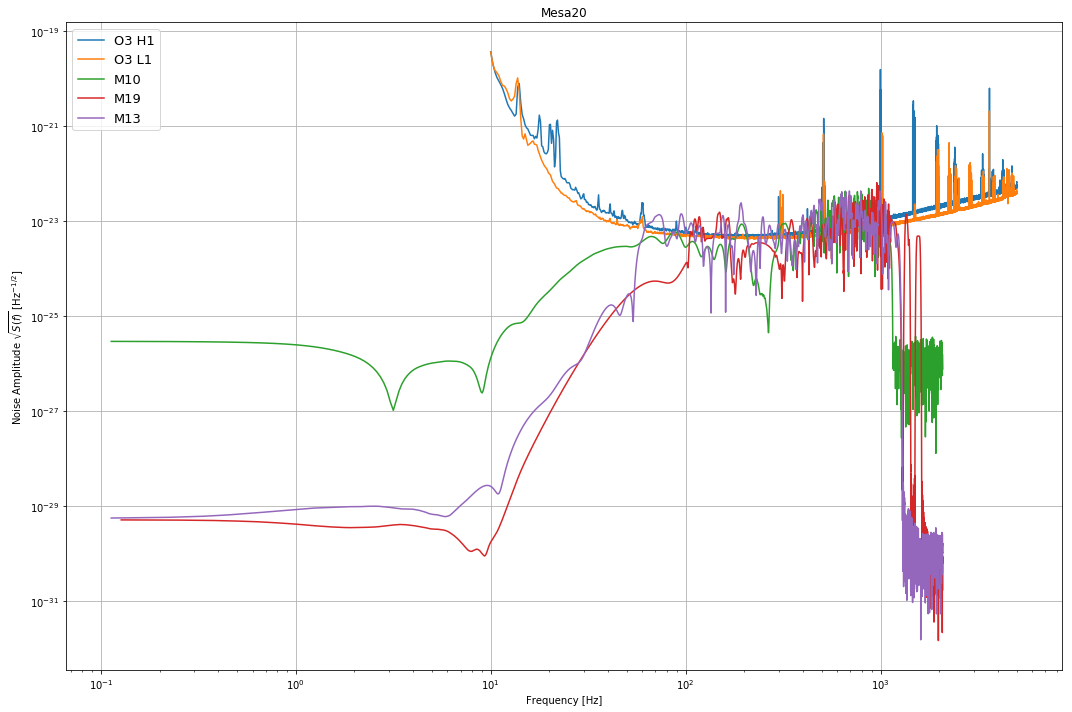

In [64]:
plt.figure(figsize = [15,10])
plt.title('Mesa20')
plt.loglog(O3H1[:,0],O3H1[:,1],label="O3 H1")
plt.loglog(O3L1[:,0],O3L1[:,1],label="O3 L1")
plt.loglog(f1,abs_Amp1,label='M10')
plt.loglog(f2,abs_Amp2,label='M19')
plt.loglog(f3,abs_Amp3,label='M13')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'Noise Amplitude $\sqrt{S(f)}$ [Hz$^{-1/2}$]')
plt.legend(fontsize=13)
plt.grid()
plt.tight_layout()
plt.savefig("mesa20.png")
plt.show()

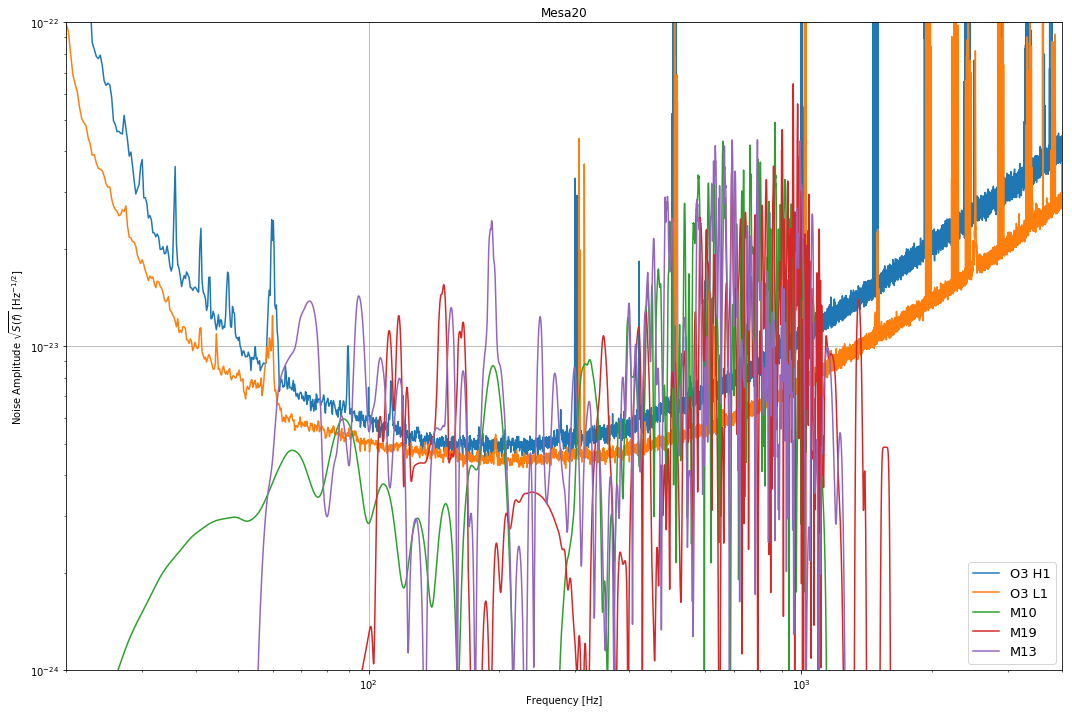

In [65]:
plt.figure(figsize = [15,10])
plt.title('Mesa20')
plt.loglog(O3H1[:,0],O3H1[:,1],label="O3 H1")
plt.loglog(O3L1[:,0],O3L1[:,1],label="O3 L1")
plt.loglog(f1,abs_Amp1,label='M10')
plt.loglog(f2,abs_Amp2,label='M19')
plt.loglog(f3,abs_Amp3,label='M13')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'Noise Amplitude $\sqrt{S(f)}$ [Hz$^{-1/2}$]')
plt.xlim([20.0,4.0e3])
plt.ylim([1.0e-24,1.0e-22])
plt.legend(fontsize=13)
plt.grid()
plt.tight_layout()
plt.savefig("mesa20.png")
plt.show()

##  Noise added Signal and Noise spectra

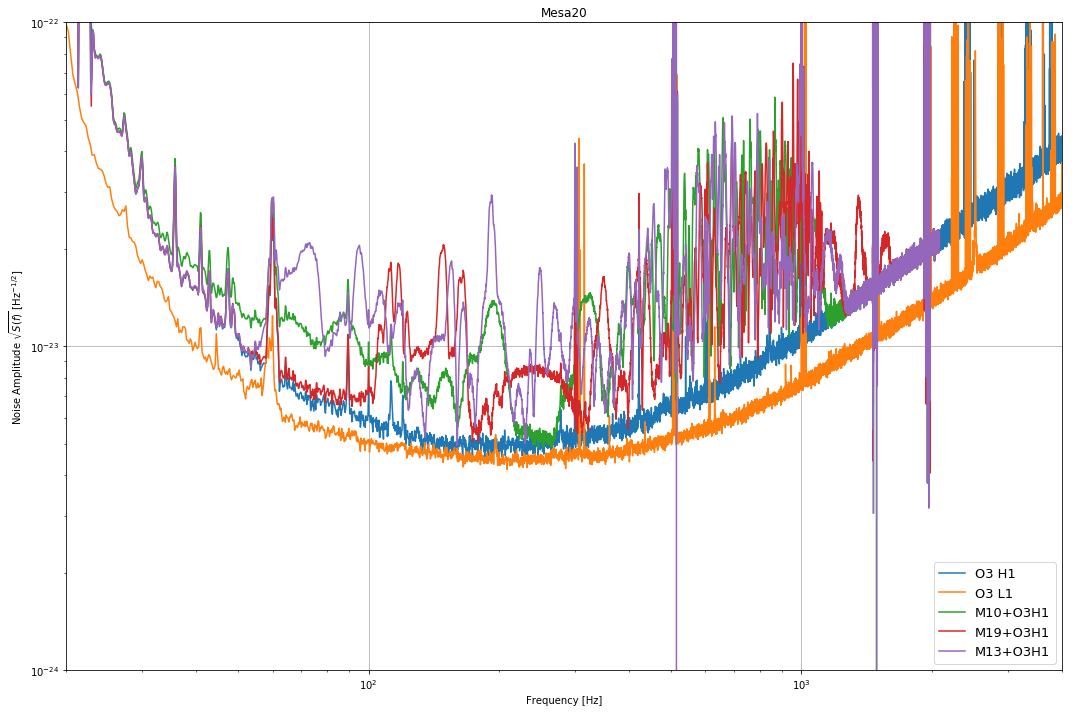

In [66]:
#adding O3H1 noise

noisy_M10_H1=abs_Amp1+asd1H1
noisy_M19_H1=abs_Amp2+asd2H1
noisy_M13_H1=abs_Amp3+asd3H1

plt.figure(figsize = [15,10])
plt.title('Mesa20')
plt.loglog(O3H1[:,0],O3H1[:,1],label="O3 H1")
plt.loglog(O3L1[:,0],O3L1[:,1],label="O3 L1")
plt.loglog(f1,noisy_M10_H1,label='M10+O3H1')
plt.loglog(f2,noisy_M19_H1,label='M19+O3H1')
plt.loglog(f3,noisy_M13_H1,label='M13+O3H1')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'Noise Amplitude $\sqrt{S(f)}$ [Hz$^{-1/2}$]')
plt.xlim([20.0,4.0e3])
plt.ylim([1.0e-24,1.0e-22])
plt.legend(fontsize=13)
plt.grid()
plt.tight_layout()
plt.savefig("mesa20.png")
plt.show()

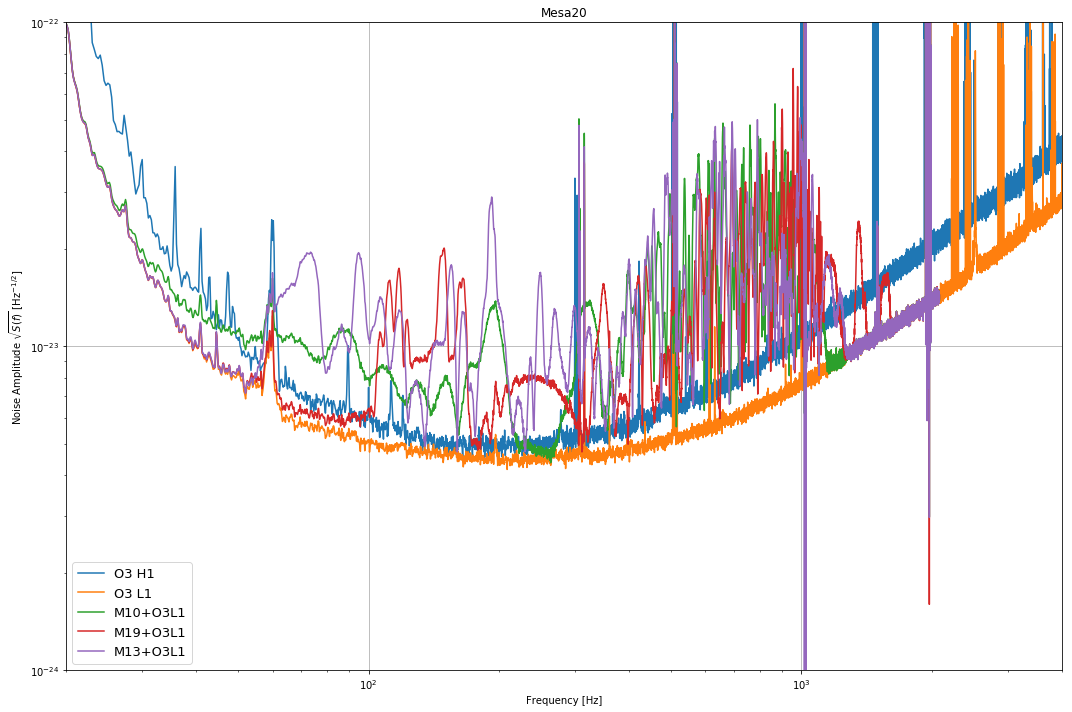

In [67]:
#adding O3L1 noise

noisy_M10_L1=abs_Amp1+asd1L1
noisy_M19_L1=abs_Amp2+asd2L1
noisy_M13_L1=abs_Amp3+asd3L1

plt.figure(figsize = [15,10])
plt.title('Mesa20')
plt.loglog(O3H1[:,0],O3H1[:,1],label="O3 H1")
plt.loglog(O3L1[:,0],O3L1[:,1],label="O3 L1")
plt.loglog(f1,noisy_M10_L1,label='M10+O3L1')
plt.loglog(f2,noisy_M19_L1,label='M19+O3L1')
plt.loglog(f3,noisy_M13_L1,label='M13+O3L1')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'Noise Amplitude $\sqrt{S(f)}$ [Hz$^{-1/2}$]')
plt.xlim([20.0,4.0e3])
plt.ylim([1.0e-24,1.0e-22])
plt.legend(fontsize=13)
plt.grid()
plt.tight_layout()
plt.savefig("mesa20.png")
plt.show()

## Inverse fft of O3H1 and O3L1 noise

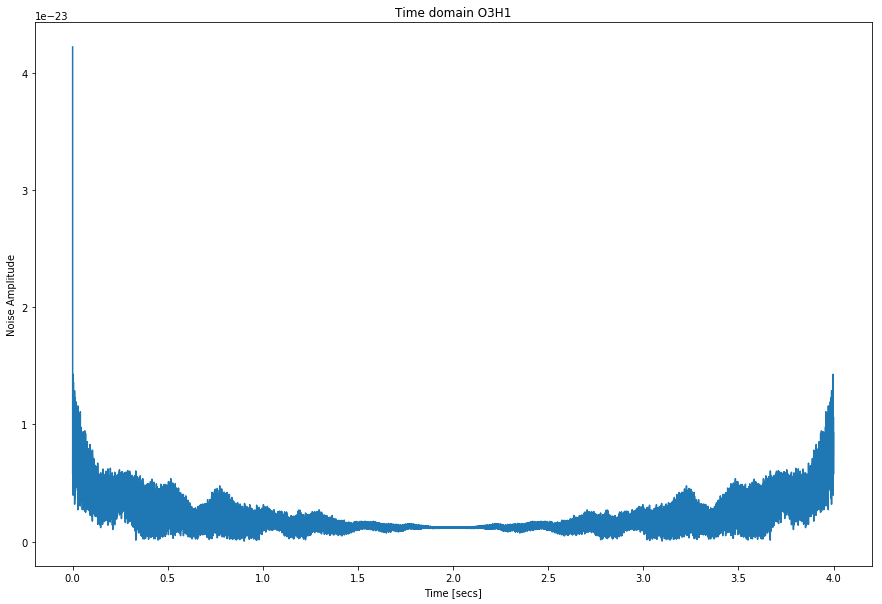

In [68]:
plt.figure(figsize = [15,10])
plt.title('Time domain O3H1')
y1=fftpack.ifft(O3H1[:,1])
df=O3H1[1,0]-O3H1[0,0]
dt=1/(len(O3H1[:,1])*df)
time=np.arange(0,1/df,dt)
plt.plot(time,abs(y1))
plt.xlabel('Time [secs]')
plt.ylabel('Noise Amplitude')
plt.show()

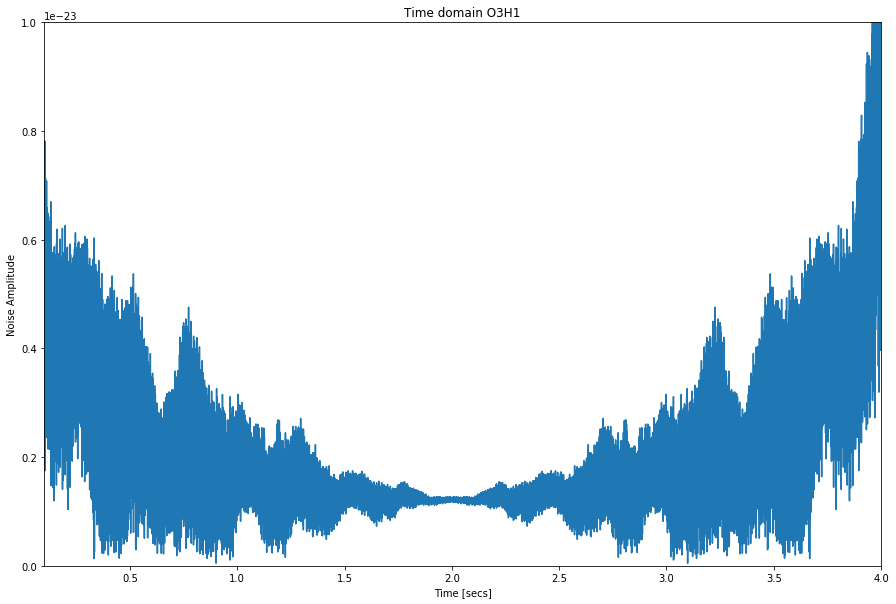

In [69]:
plt.figure(figsize = [15,10])
plt.title('Time domain O3H1')
y1=fftpack.ifft(O3H1[:,1])
df=O3H1[1,0]-O3H1[0,0]
dt=1/(len(O3H1[:,1])*df)
time=np.arange(0,1/df,dt)
plt.plot(time,abs(y1))
plt.xlabel('Time [secs]')
plt.ylabel('Noise Amplitude')
plt.xlim([0.1,4.0])
plt.ylim([0,1.0e-23])
plt.show()

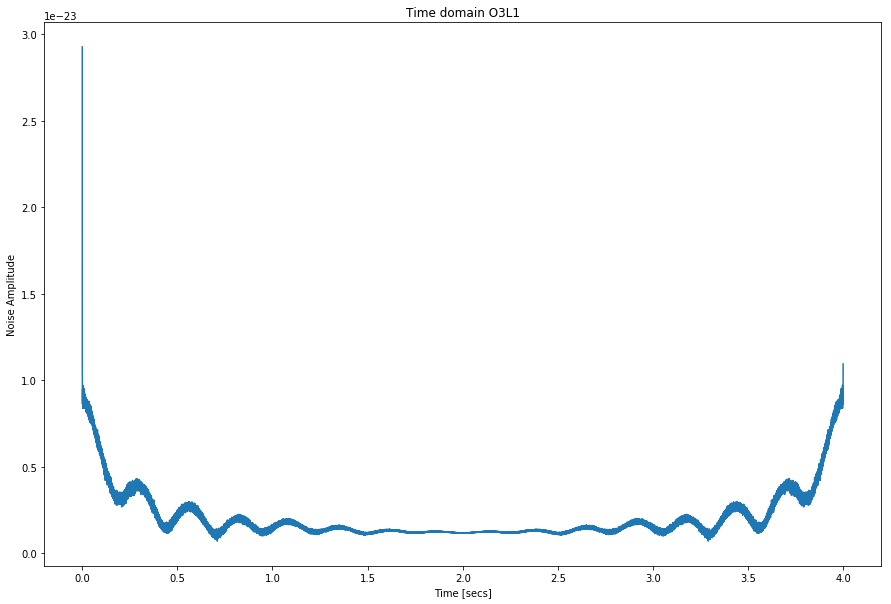

In [70]:
plt.figure(figsize = [15,10])
plt.title('Time domain O3L1')
y1=fftpack.ifft(O3L1[:,1])
df=O3L1[1,0]-O3L1[0,0]
dt=1/(len(O3L1[:,1])*df)
time=np.arange(0,1/df,dt)
plt.plot(time,abs(y1))
plt.xlabel('Time [secs]')
plt.ylabel('Noise Amplitude')
plt.show()

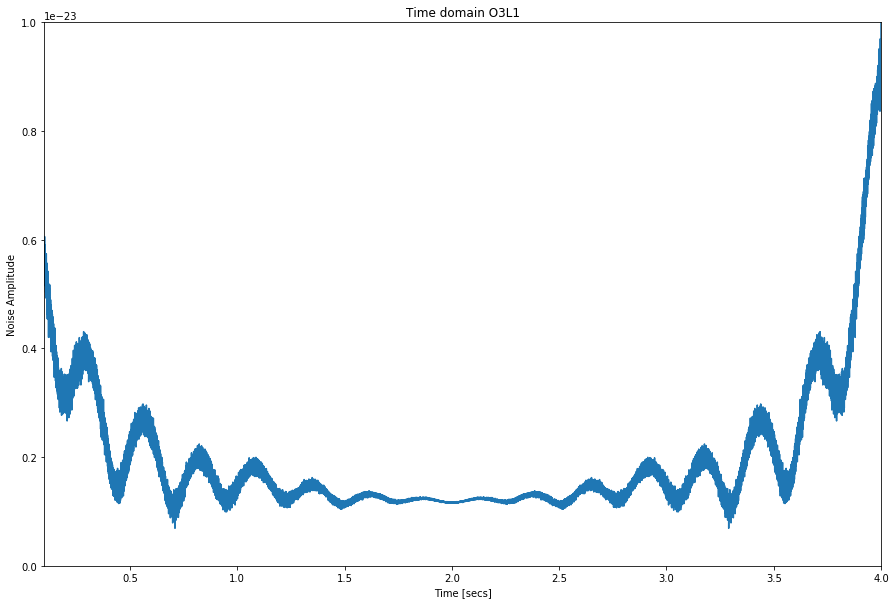

In [71]:
plt.figure(figsize = [15,10])
plt.title('Time domain O3L1')
y1=fftpack.ifft(O3L1[:,1])
df=O3L1[1,0]-O3L1[0,0]
dt=1/(len(O3L1[:,1])*df)
time=np.arange(0,1/df,dt)
plt.plot(time,abs(y1))
plt.xlabel('Time [secs]')
plt.ylabel('Noise Amplitude')
plt.xlim([0.1,4.0])
plt.ylim([0,1.0e-23])
plt.show()

## SNR for distances ranging from 1Kpc to 100Kpc

In [72]:
#M19 for L1 noise
asd2=np.array(asd2)
psd2 = asd2**2

df2 = f2[2]-f2[1]
snrsq2 = sum(abs_Amp2**2/psd2)*df2
snr2 = np.sqrt(snrsq2)
print('SNR of M19 signal using direct sum;', snr2) 

snrsq2 = integral(abs_Amp2**2/psd2,df2)
snr2 = np.sqrt(snrsq2)
print('SNR of M19 signal using SImpsons 3/8th rule;', snr2) 

SNR of M19 signal using direct sum; 102.090897883
SNR of M19 signal using SImpsons 3/8th rule; 105.623431103


In [73]:
def SNR(abs_Amp):
    asd=np.array(asd2)
    psd = asd**2
    df2 = f2[2]-f2[1]
    snrsq = integral(abs_Amp**2/psd,df2)
    snr = np.sqrt(snrsq)
    return snr

In [74]:
R=[]
SN_R=[]
Amp=np.zeros([100,len(abs_Amp2)])
for r in range(1,101):
    R.append(r)
    Amp[r-1,:]=(10/r)*abs_Amp2
    sn=SNR(Amp[r-1,:])
    SN_R.append(sn)

In [75]:
print(R)
print(Amp.shape)
print(r)
print(Amp[9,:])
print(abs_Amp2)
print(SN_R[9])
print(SN_R)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
(100, 16382)
100
[  5.20016473e-30   5.15051880e-30   5.05275575e-30 ...,   3.11935316e-31
   2.51424114e-31   1.76943151e-31]
[  5.20016473e-30   5.15051880e-30   5.05275575e-30 ...,   3.11935316e-31
   2.51424114e-31   1.76943151e-31]
105.623431103
[1056.2343110252098, 528.11715551260488, 352.07810367506852, 264.05857775630244, 211.24686220504179, 176.03905183753426, 150.89061586074413, 132.02928887815122, 117.35936789168971, 105.6234311025209, 96.02130100229185, 88.01952591876713, 81.248793155785151, 75.445307930372067, 70.415620735013817, 66.01464443907561, 62.1314300603064, 58.679683945844857, 5

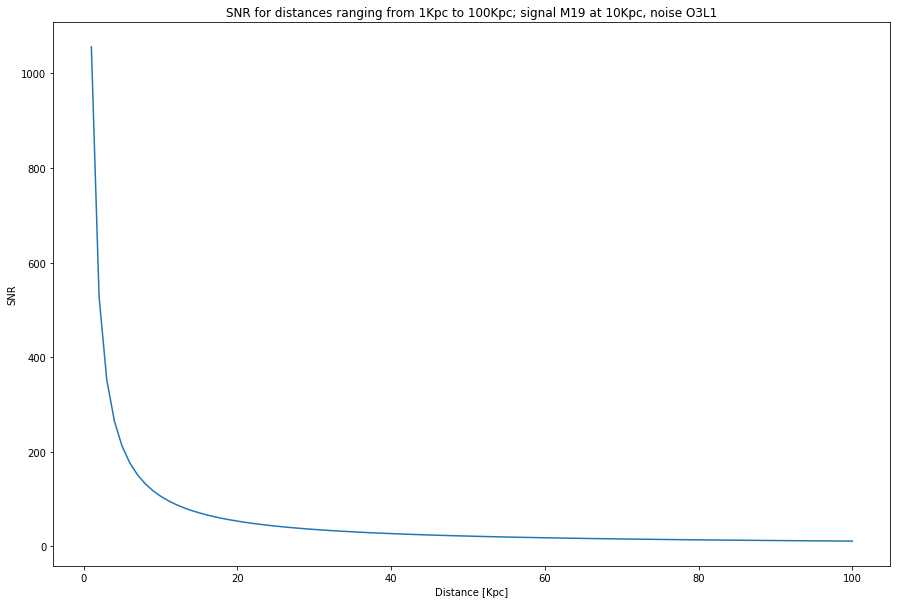

In [76]:
plt.figure(figsize = [15,10])
plt.title('SNR for distances ranging from 1Kpc to 100Kpc; signal M19 at 10Kpc, noise O3L1')
plt.plot(R,SN_R)
plt.xlabel('Distance [Kpc]')
plt.ylabel('SNR')
#plt.xlim([1,100])
#plt.ylim([0,1.0e-23])
plt.show()

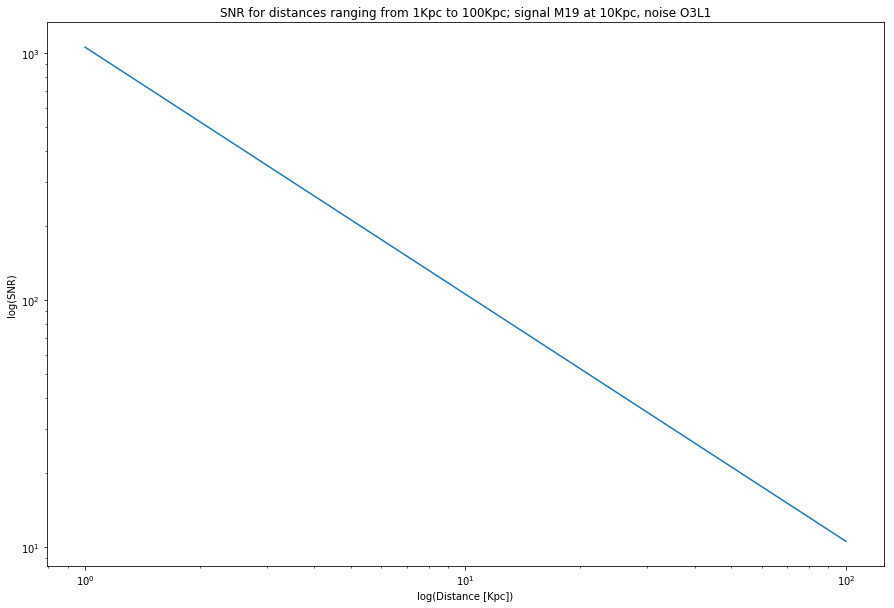

In [77]:
plt.figure(figsize = [15,10])
plt.title('SNR for distances ranging from 1Kpc to 100Kpc; signal M19 at 10Kpc, noise O3L1')
plt.loglog(R,SN_R)
plt.xlabel('log(Distance [Kpc])')
plt.ylabel('log(SNR)')
#plt.xlim([1,100])
#plt.ylim([0,1.0e-23])
plt.show()

# Non-whitened noise hdf5 file

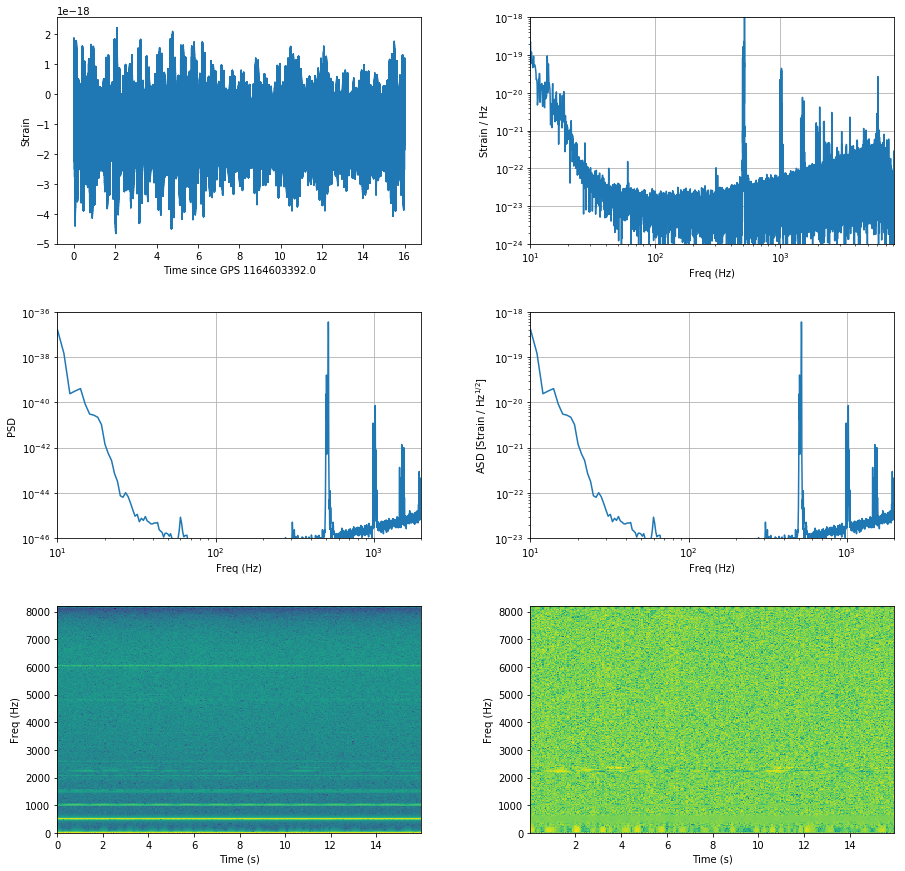

In [78]:

#----------------------
# Import needed modules
#----------------------
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import readligo as rl

#---------------------
# Read in strain data
#---------------------
fileName = 'L-L1_GWOSC_O2_16KHZ_R1-1164603392-4096.hdf5'
strain, time, channel_dict = rl.loaddata(fileName, 'H1')
ts = time[1] - time[0] #-- Time between samples
fs = int(1.0 / ts)          #-- Sampling frequency

#---------------------------------------------------------
# Find a good segment, get first 16 seconds of data
#---------------------------------------------------------
segList = rl.dq_channel_to_seglist(channel_dict['DEFAULT'], fs)
length = 16  # seconds
strain_seg = strain[segList[0]][0:(length*fs)]
time_seg = time[segList[0]][0:(length*fs)]

#---------------------
# Plot the time series
#----------------------
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.subplot(321)
plt.plot(time_seg - time_seg[0], strain_seg)
plt.xlabel('Time since GPS ' + str(time_seg[0]))
plt.ylabel('Strain')

#------------------------------------------
# Apply a Blackman Window, and plot the FFT
#------------------------------------------
window = np.blackman(strain_seg.size)
windowed_strain = strain_seg*window
freq_domain = np.fft.rfft(windowed_strain) / fs
freq = np.fft.rfftfreq(len(windowed_strain))*fs

plt.subplot(322)
plt.loglog( freq, abs(freq_domain) )
plt.axis([10, fs/2.0, 1e-24, 1e-18])
plt.grid('on')
plt.xlabel('Freq (Hz)')
plt.ylabel('Strain / Hz')

#----------------------------------
# Make PSD for first chunk of data
#----------------------------------
plt.subplot(323)
Pxx, freqs = mlab.psd(strain_seg, Fs = fs, NFFT=fs)
plt.loglog(freqs, Pxx)
plt.axis([10, 2000, 1e-46, 1e-36])
plt.grid('on')
plt.ylabel('PSD')
plt.xlabel('Freq (Hz)')

#-------------------------
# Plot the ASD
#-------------------------------
plt.subplot(324)
plt.loglog(freqs, np.sqrt(Pxx))
plt.axis([10, 2000, 1e-23, 1e-18])
plt.grid('on')
plt.xlabel('Freq (Hz)')
plt.ylabel('ASD [Strain / Hz$^{1/2}$]')

#--------------------
# Make a spectrogram
#-------------------
NFFT = 1024
window = np.blackman(NFFT)
plt.subplot(325)
spec_power, freqs, bins, im = plt.specgram(strain_seg, NFFT=NFFT, Fs=fs, 
                                    window=window)
plt.xlabel('Time (s)')
plt.ylabel('Freq (Hz)')

#------------------------------------------
# Renormalize by average power in freq. bin
#-----------------------------------------
med_power = np.zeros(freqs.shape)
norm_spec_power = np.zeros(spec_power.shape)
index = 0
for row in spec_power:
    med_power[index] = np.median(row)
    norm_spec_power[index] = row / med_power[index]
    index += 1

ax = plt.subplot(326)
ax.pcolormesh(bins, freqs, np.log10(norm_spec_power))
plt.xlabel('Time (s)')
plt.ylabel('Freq (Hz)')

plt.show()


## Calculating SNRs of M10, M13, M19 signals using hdf5 file noise

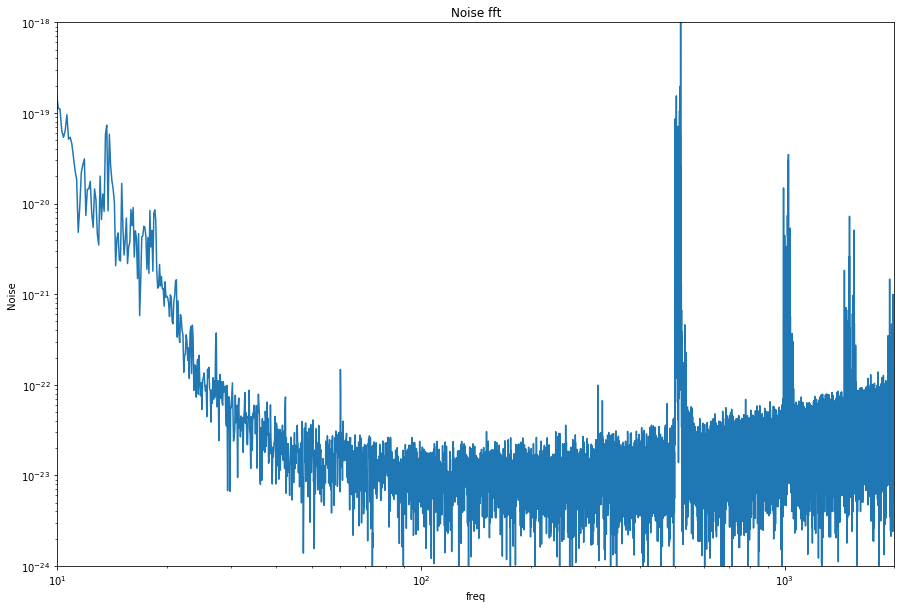

In [79]:
#Spectrum resampling of noise to signal frequency
#For M10 signal

#print(len(freqs))
#print(len(np.sqrt(Pxx)))

tck1 = interpolate.splrep(freq, abs(freq_domain),s=0) #spline interpolate using noise data
asd1 = interpolate.splev(f1,tck1,der=0) #resampling at frequency f1; to get same freq components as signal

#Now, the length of the signal has changed; df and dt also have changed



plt.figure(figsize = [15,10])
plt.title('Noise fft')
plt.loglog(f1,asd1)
plt.axis([10, 2000, 1e-24, 1e-18])
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

In [80]:
asd1=np.array(asd1)
psd1 = asd1**2

df1 = f1[2]-f1[1]
snrsq1 = sum(abs_Amp1**2/psd1)*df1
snr1 = np.sqrt(snrsq1)
print('SNR of M10 signal using direct sum;', snr1) 

snrsq1 = integral(abs_Amp1**2/psd1,df1)
snr1 = np.sqrt(snrsq1)
print('SNR of M10 signal using SImpsons 3/8th rule;', snr1) 

SNR of M10 signal using direct sum; 72.9169119288
SNR of M10 signal using SImpsons 3/8th rule; 74.5592433547


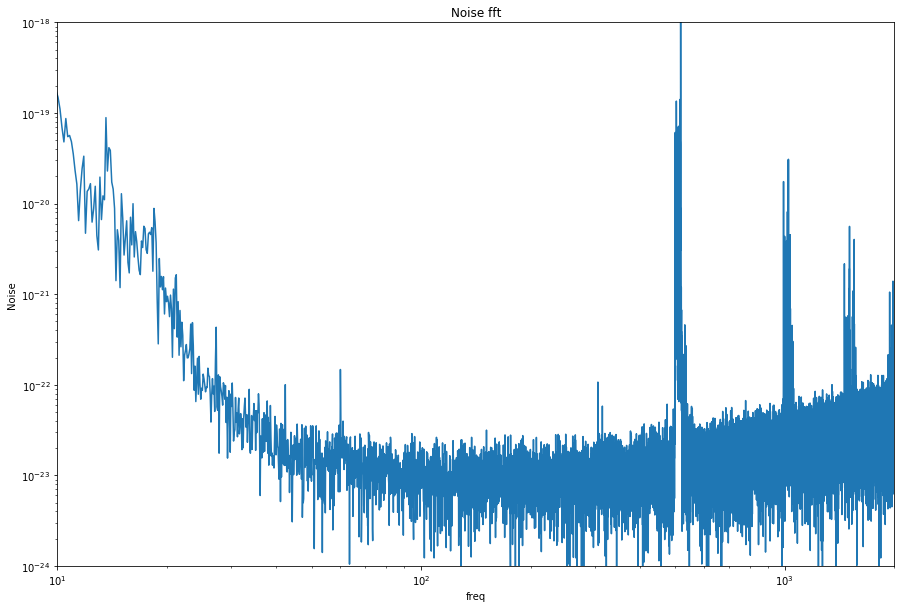

In [81]:
#For M19 signal


    

tck2 = interpolate.splrep(freq, abs(freq_domain),s=0) #spline interpolate using noise data
asd2 = interpolate.splev(f2,tck2,der=0) #resampling at frequency f2; to get same freq components as signal

#Now, the length of the signal has changed; df and dt also have changed




plt.figure(figsize = [15,10])
plt.title('Noise fft')
plt.loglog(f2,asd2)
plt.axis([10, 2000, 1e-24, 1e-18])
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

In [82]:
asd2=np.array(asd2)
psd2 = asd2**2

df2 = f2[2]-f2[1]
snrsq2 = sum(abs_Amp2**2/psd2)*df2
snr2 = np.sqrt(snrsq2)
print('SNR of M19 signal using direct sum;', snr2) 

snrsq2 = integral(abs_Amp2**2/psd2,df2)
snr2 = np.sqrt(snrsq2)
print('SNR of M19 signal using SImpsons 3/8th rule;', snr2) 

SNR of M19 signal using direct sum; 78.6464421336
SNR of M19 signal using SImpsons 3/8th rule; 81.4126557237


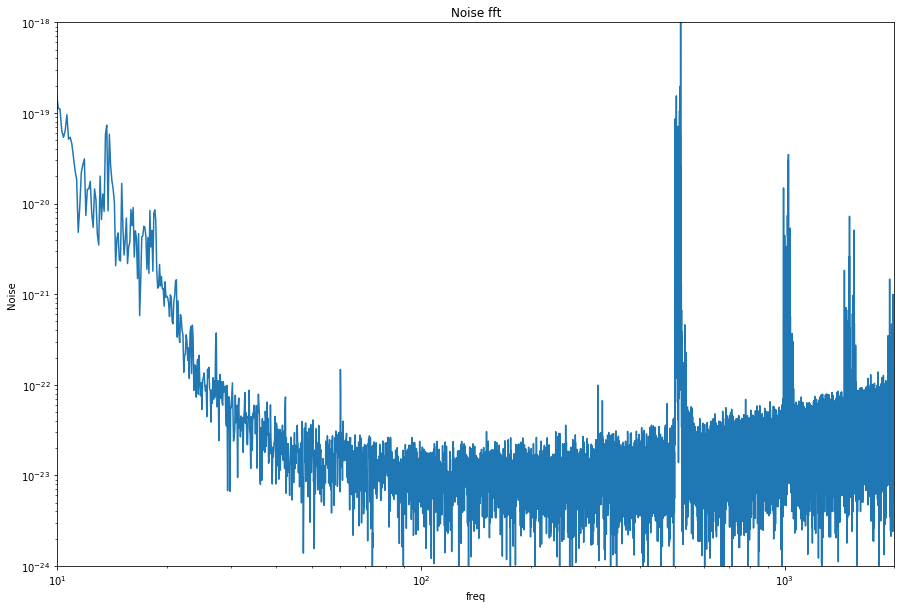

In [83]:
#For M13 signal


    

tck3 = interpolate.splrep(freq, abs(freq_domain),s=0) #spline interpolate using noise data
asd3 = interpolate.splev(f3,tck3,der=0) #resampling at frequency f3; to get same freq components as signal

#Now, the length of the signal has changed; df and dt also have changed




plt.figure(figsize = [15,10])
plt.title('Noise fft')
plt.loglog(f3,asd3)
plt.axis([10, 2000, 1e-24, 1e-18])
plt.xlabel('freq')
plt.ylabel('Noise')
plt.show()

In [84]:
asd3=np.array(asd3)
psd3 = asd3**2

df3 = f3[2]-f3[1]
snrsq3 = sum(abs_Amp3**2/psd3)*df3
snr3 = np.sqrt(snrsq3)
print('SNR of M13 signal using direct sum;', snr3) 

snrsq3 = integral(abs_Amp3**2/psd3,df3)
snr3 = np.sqrt(snrsq3)
print('SNR of M13 signal using SImpsons 3/8th rule;', snr3) 

SNR of M13 signal using direct sum; 81.6771318871
SNR of M13 signal using SImpsons 3/8th rule; 84.3766933113


## Adding M10, M13, M19 signals to hdf5 noise in time domain and plotting time series and  spectra/spectrograms of added signals 

6.103515625e-05 16384
262144
262144


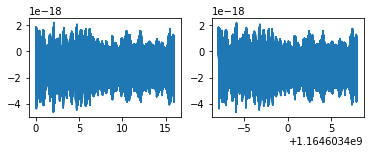

In [85]:
print(ts,fs)
print(len(time_seg))
print(len(strain_seg))
plt.subplot(2,2,1)
plt.plot(time_seg-time_seg[0], strain_seg)
plt.subplot(2,2,2)
plt.plot(time_seg, strain_seg)

In [86]:
#M10
time1=[]
amplitude1=[]
df2=pd.read_csv('M10.csv')
#M19
time3=[]
amplitude2=[]
df4=pd.read_excel('M19.xlsx')
#M13
time4=[]
amplitude3=[]
df5=pd.read_excel('M13.xlsx')

print('The length of M10, M19 and M13 data are respectively; ', len(df2.Time), len(df4.Time), len(df5.Time))

The length of M10, M19 and M13 data are respectively;  36864 32768 36864


In [87]:
time1=df2.Time
amplitude1=np.array(df2.Amplitude)
time3=df4.Time
amplitude2=np.array(df4.Amplitude)
time4=df5.Time
amplitude3=np.array(df5.Amplitude)



In [88]:
print(len(time1),len(time4))
print(time1[len(time1)-1],time4[len(time1)-1])
#Assuming same sampling frequency, time1=time4

36864 36864
1186766069 1186766069.0


In [89]:
#Pure signals
#Time Series/Spectra/Spectrogram

len2=time3[len(time3)-1]-time3[0]
len3=time4[len(time4)-1]-time4[0]
print(len2,len3)
ts2=len2/len(time3)
ts3=len3/len(time4)
print(ts2,ts3)
fs2=int(1/ts2)
fs3=int(1/ts3)
print(fs2,fs3)

7.99974989891 8.99974989891
0.00024413299252 0.000244133840574
4096 4096


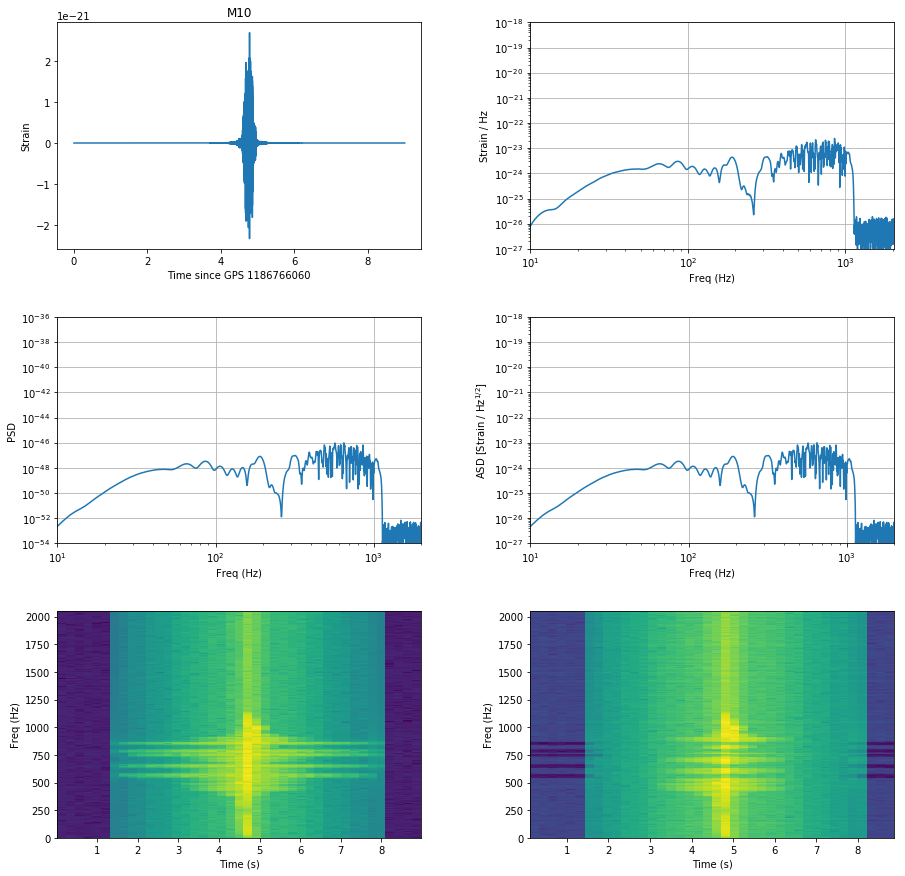

In [90]:
#M10
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(321)
plt.title('M10')
plt.plot(time4 - time4[0], amplitude1)
plt.xlabel('Time since GPS ' + str(time1[0]))
plt.ylabel('Strain')
#------------------------------------------
# Apply a Blackman Window, and plot the FFT
#------------------------------------------
window = np.blackman(amplitude1.size)
windowed_strain = amplitude1*window
freq_domain = np.fft.rfft(windowed_strain) / fs3
freq = np.fft.rfftfreq(len(windowed_strain))*fs3

plt.subplot(322)
plt.loglog( freq, abs(freq_domain) )
plt.axis([10, fs3/2.0, 1e-27, 1e-18])
plt.grid('on')
plt.xlabel('Freq (Hz)')
plt.ylabel('Strain / Hz')

#----------------------------------
# Make PSD for first chunk of data
#----------------------------------
plt.subplot(323)
Pxx, freqs = mlab.psd(amplitude1, Fs = fs3, NFFT=fs3)
plt.loglog(freqs, Pxx)
plt.axis([10, 2000, 1e-54, 1e-36])
plt.grid('on')
plt.ylabel('PSD')
plt.xlabel('Freq (Hz)')

#-------------------------
# Plot the ASD
#-------------------------------
plt.subplot(324)
plt.loglog(freqs, np.sqrt(Pxx))
plt.axis([10, 2000, 1e-27, 1e-18])
plt.grid('on')
plt.xlabel('Freq (Hz)')
plt.ylabel('ASD [Strain / Hz$^{1/2}$]')

#--------------------
# Make a spectrogram
#-------------------
NFFT = 1024
window = np.blackman(NFFT)
plt.subplot(325)
spec_power, freqs, bins, im = plt.specgram(amplitude1, NFFT=NFFT, Fs=fs3, 
                                    window=window)
plt.xlabel('Time (s)')
plt.ylabel('Freq (Hz)')

#------------------------------------------
# Renormalize by average power in freq. bin
#-----------------------------------------
med_power = np.zeros(freqs.shape)
norm_spec_power = np.zeros(spec_power.shape)
index = 0
for row in spec_power:
    med_power[index] = np.median(row)
    norm_spec_power[index] = row / med_power[index]
    index += 1

ax = plt.subplot(326)
ax.pcolormesh(bins, freqs, np.log10(norm_spec_power))
plt.xlabel('Time (s)')
plt.ylabel('Freq (Hz)')

plt.show()

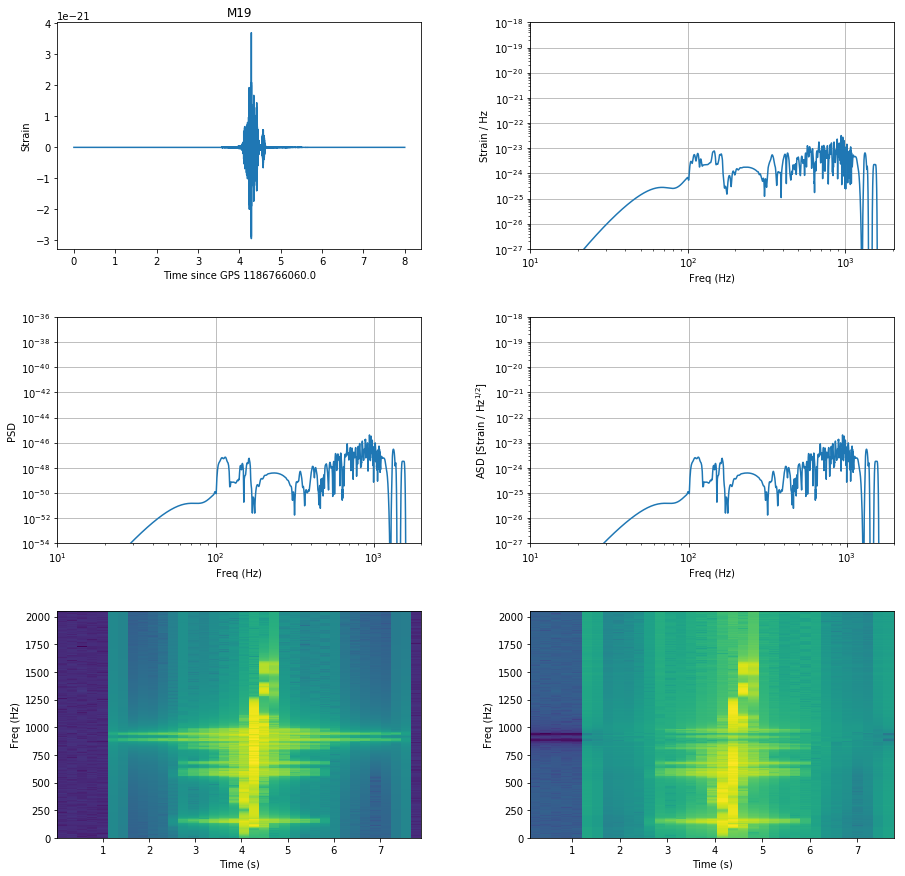

In [91]:
#M19
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(321)
plt.title('M19')
plt.plot(time3 - time3[0], amplitude2)
plt.xlabel('Time since GPS ' + str(time3[0]))
plt.ylabel('Strain')
#------------------------------------------
# Apply a Blackman Window, and plot the FFT
#------------------------------------------
window = np.blackman(amplitude2.size)
windowed_strain = amplitude2*window
freq_domain = np.fft.rfft(windowed_strain) / fs2
freq = np.fft.rfftfreq(len(windowed_strain))*fs2

plt.subplot(322)
plt.loglog( freq, abs(freq_domain) )
plt.axis([10, fs2/2.0, 1e-27, 1e-18])
plt.grid('on')
plt.xlabel('Freq (Hz)')
plt.ylabel('Strain / Hz')

#----------------------------------
# Make PSD for first chunk of data
#----------------------------------
plt.subplot(323)
Pxx, freqs = mlab.psd(amplitude2, Fs = fs2, NFFT=fs2)
plt.loglog(freqs, Pxx)
plt.axis([10, 2000, 1e-54, 1e-36])
plt.grid('on')
plt.ylabel('PSD')
plt.xlabel('Freq (Hz)')

#-------------------------
# Plot the ASD
#-------------------------------
plt.subplot(324)
plt.loglog(freqs, np.sqrt(Pxx))
plt.axis([10, 2000, 1e-27, 1e-18])
plt.grid('on')
plt.xlabel('Freq (Hz)')
plt.ylabel('ASD [Strain / Hz$^{1/2}$]')

#--------------------
# Make a spectrogram
#-------------------
NFFT = 1024
window = np.blackman(NFFT)
plt.subplot(325)
spec_power, freqs, bins, im = plt.specgram(amplitude2, NFFT=NFFT, Fs=fs2, 
                                    window=window)
plt.xlabel('Time (s)')
plt.ylabel('Freq (Hz)')

#------------------------------------------
# Renormalize by average power in freq. bin
#-----------------------------------------
med_power = np.zeros(freqs.shape)
norm_spec_power = np.zeros(spec_power.shape)
index = 0
for row in spec_power:
    med_power[index] = np.median(row)
    norm_spec_power[index] = row / med_power[index]
    index += 1

ax = plt.subplot(326)
ax.pcolormesh(bins, freqs, np.log10(norm_spec_power))
plt.xlabel('Time (s)')
plt.ylabel('Freq (Hz)')

plt.show()

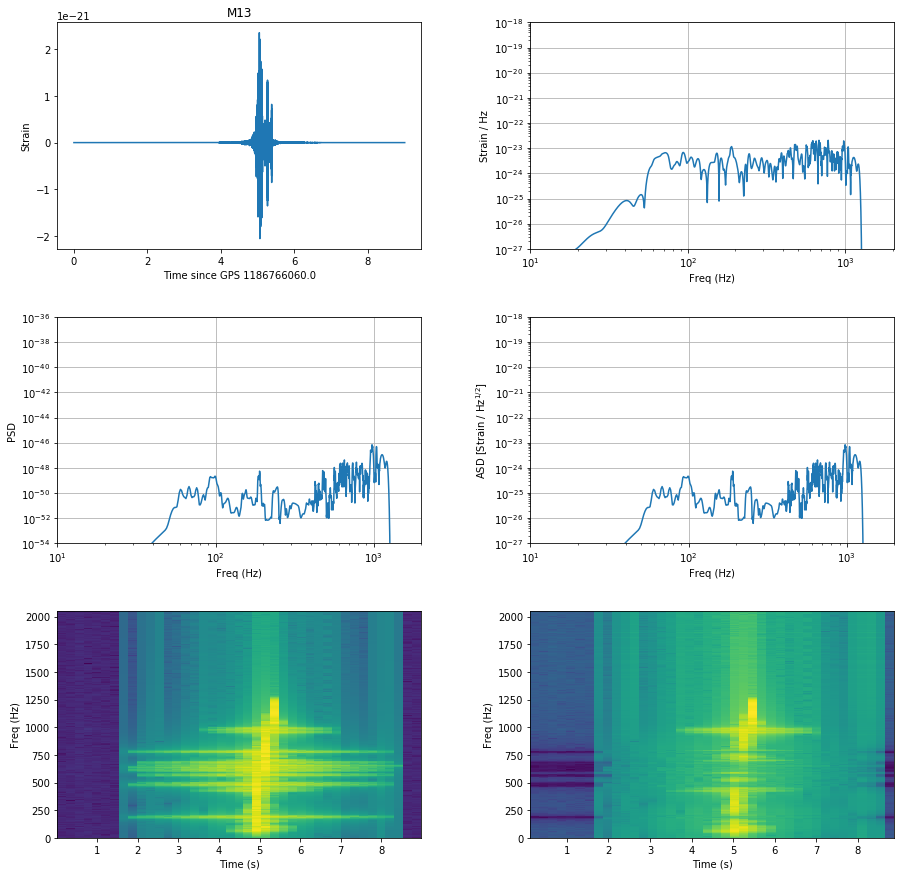

In [92]:
#M13
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(321)
plt.title('M13')
plt.plot(time4 - time4[0], amplitude3)
plt.xlabel('Time since GPS ' + str(time4[0]))
plt.ylabel('Strain')
#------------------------------------------
# Apply a Blackman Window, and plot the FFT
#------------------------------------------
window = np.blackman(amplitude3.size)
windowed_strain = amplitude3*window
freq_domain = np.fft.rfft(windowed_strain) / fs3
freq = np.fft.rfftfreq(len(windowed_strain))*fs3

plt.subplot(322)
plt.loglog( freq, abs(freq_domain) )
plt.axis([10, fs3/2.0, 1e-27, 1e-18])
plt.grid('on')
plt.xlabel('Freq (Hz)')
plt.ylabel('Strain / Hz')

#----------------------------------
# Make PSD for first chunk of data
#----------------------------------
plt.subplot(323)
Pxx, freqs = mlab.psd(amplitude3, Fs = fs3, NFFT=fs3)
plt.loglog(freqs, Pxx)
plt.axis([10, 2000, 1e-54, 1e-36])
plt.grid('on')
plt.ylabel('PSD')
plt.xlabel('Freq (Hz)')

#-------------------------
# Plot the ASD
#-------------------------------
plt.subplot(324)
plt.loglog(freqs, np.sqrt(Pxx))
plt.axis([10, 2000, 1e-27, 1e-18])
plt.grid('on')
plt.xlabel('Freq (Hz)')
plt.ylabel('ASD [Strain / Hz$^{1/2}$]')

#--------------------
# Make a spectrogram
#-------------------
NFFT = 1024
window = np.blackman(NFFT)
plt.subplot(325)
spec_power, freqs, bins, im = plt.specgram(amplitude3, NFFT=NFFT, Fs=fs3, 
                                    window=window)
plt.xlabel('Time (s)')
plt.ylabel('Freq (Hz)')

#------------------------------------------
# Renormalize by average power in freq. bin
#-----------------------------------------
med_power = np.zeros(freqs.shape)
norm_spec_power = np.zeros(spec_power.shape)
index = 0
for row in spec_power:
    med_power[index] = np.median(row)
    norm_spec_power[index] = row / med_power[index]
    index += 1

ax = plt.subplot(326)
ax.pcolormesh(bins, freqs, np.log10(norm_spec_power))
plt.xlabel('Time (s)')
plt.ylabel('Freq (Hz)')

plt.show()

In [93]:
print(np.amin( abs(freq_domain)), np.amax( abs(freq_domain)))

1.25149893634e-32 2.06703675455e-23


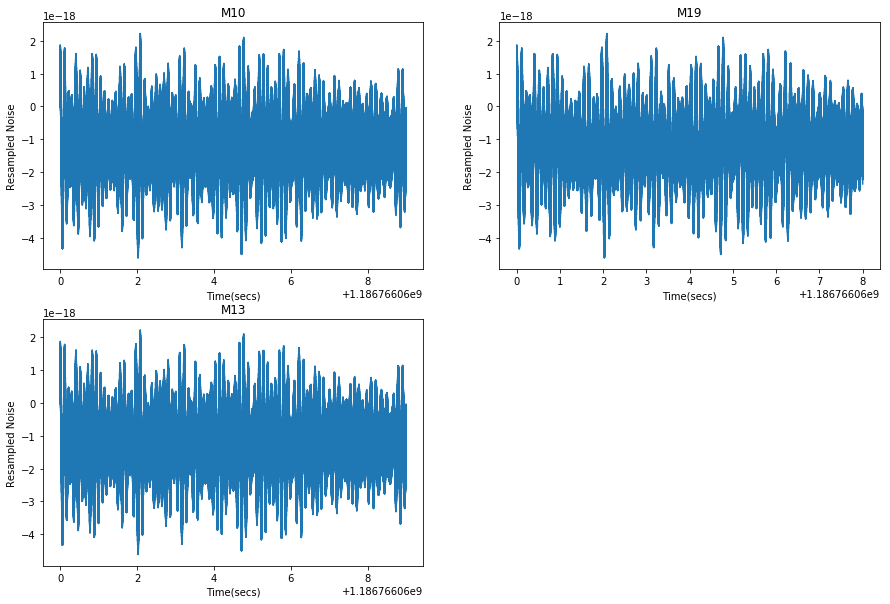

In [94]:
#Adding noise to signal by interpolating and sampling noise to signal time

#M10
tck1 = interpolate.splrep(time_seg-time_seg[0],strain_seg,s=0) #spline interpolate using noise data
new_noise1 = interpolate.splev(time4-time4[0],tck1,der=0) #resampling at frequency time1; to get same time components as signal
new_noise1=np.array(new_noise1)
noisy_amp_M10=amplitude1+new_noise1*10**(-4)
#M19
tck2 = interpolate.splrep(time_seg-time_seg[0],strain_seg,s=0) #spline interpolate using noise data
new_noise2 = interpolate.splev(time3-time3[0],tck1,der=0) #resampling at frequency time1; to get same time components as signal
new_noise2=np.array(new_noise2)
noisy_amp_M19=amplitude2+new_noise2*10**(-4)
#M13
tck3 = interpolate.splrep(time_seg-time_seg[0],strain_seg,s=0) #spline interpolate using noise data
new_noise3 = interpolate.splev(time4-time4[0],tck1,der=0) #resampling at frequency time1; to get same time components as signal
new_noise3=np.array(new_noise3)
noisy_amp_M13=amplitude3+new_noise3*10**(-4)

plt.figure(figsize = [15,10])

plt.subplot(2,2,1)
plt.title('M10')
plt.plot(time4,new_noise1)
plt.xlabel('Time(secs)')
plt.ylabel('Resampled Noise')

plt.subplot(2,2,2)
plt.title('M19')
plt.plot(time3,new_noise2)
plt.xlabel('Time(secs)')
plt.ylabel('Resampled Noise')

plt.subplot(2,2,3)
plt.title('M13')
plt.plot(time4,new_noise3)
plt.xlabel('Time(secs)')
plt.ylabel('Resampled Noise')
plt.show()


In [95]:
#Noisy Signals
#Time Series/Spectra/Spectrogram

len2=time3[len(time3)-1]-time3[0]
len3=time4[len(time4)-1]-time4[0]
print(len2,len3)
ts2=len2/len(time3)
ts3=len3/len(time4)
print(ts2,ts3)
fs2=int(1/ts2)
fs3=int(1/ts3)
print(fs2,fs3)

7.99974989891 8.99974989891
0.00024413299252 0.000244133840574
4096 4096


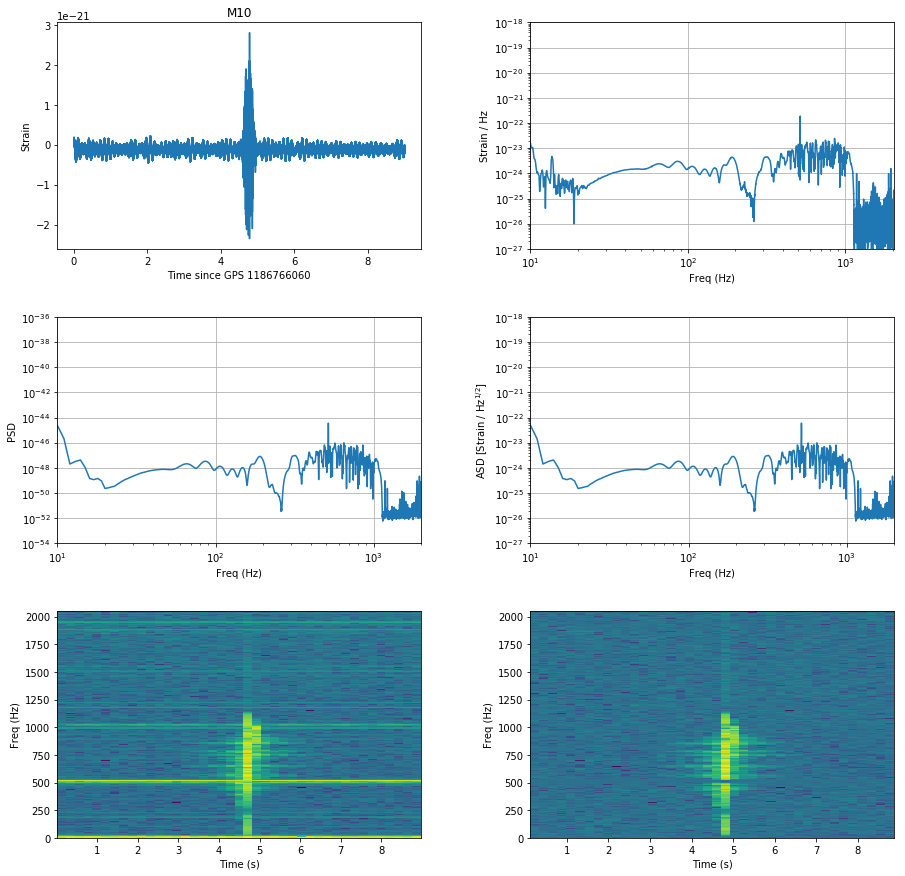

In [96]:
#M10
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(321)
plt.title('M10')
plt.plot(time4 - time4[0], noisy_amp_M10)
plt.xlabel('Time since GPS ' + str(time1[0]))
plt.ylabel('Strain')
#------------------------------------------
# Apply a Blackman Window, and plot the FFT
#------------------------------------------
window = np.blackman(noisy_amp_M10.size)
windowed_strain = noisy_amp_M10*window
freq_domain = np.fft.rfft(windowed_strain) / fs3
freq = np.fft.rfftfreq(len(windowed_strain))*fs3

plt.subplot(322)
plt.loglog( freq, abs(freq_domain) )
plt.axis([10, fs3/2.0, 1e-27, 1e-18])
plt.grid('on')
plt.xlabel('Freq (Hz)')
plt.ylabel('Strain / Hz')

#----------------------------------
# Make PSD for first chunk of data
#----------------------------------
plt.subplot(323)
Pxx, freqs = mlab.psd(noisy_amp_M10, Fs = fs3, NFFT=fs3)
plt.loglog(freqs, Pxx)
plt.axis([10, 2000, 1e-54, 1e-36])
plt.grid('on')
plt.ylabel('PSD')
plt.xlabel('Freq (Hz)')

#-------------------------
# Plot the ASD
#-------------------------------
plt.subplot(324)
plt.loglog(freqs, np.sqrt(Pxx))
plt.axis([10, 2000, 1e-27, 1e-18])
plt.grid('on')
plt.xlabel('Freq (Hz)')
plt.ylabel('ASD [Strain / Hz$^{1/2}$]')

#--------------------
# Make a spectrogram
#-------------------
NFFT = 1024
window = np.blackman(NFFT)
plt.subplot(325)
spec_power, freqs, bins, im = plt.specgram(noisy_amp_M10, NFFT=NFFT, Fs=fs3, 
                                    window=window)
plt.xlabel('Time (s)')
plt.ylabel('Freq (Hz)')

#------------------------------------------
# Renormalize by average power in freq. bin
#-----------------------------------------
med_power = np.zeros(freqs.shape)
norm_spec_power = np.zeros(spec_power.shape)
index = 0
for row in spec_power:
    med_power[index] = np.median(row)
    norm_spec_power[index] = row / med_power[index]
    index += 1

ax = plt.subplot(326)
ax.pcolormesh(bins, freqs, np.log10(norm_spec_power))
plt.xlabel('Time (s)')
plt.ylabel('Freq (Hz)')

plt.show()

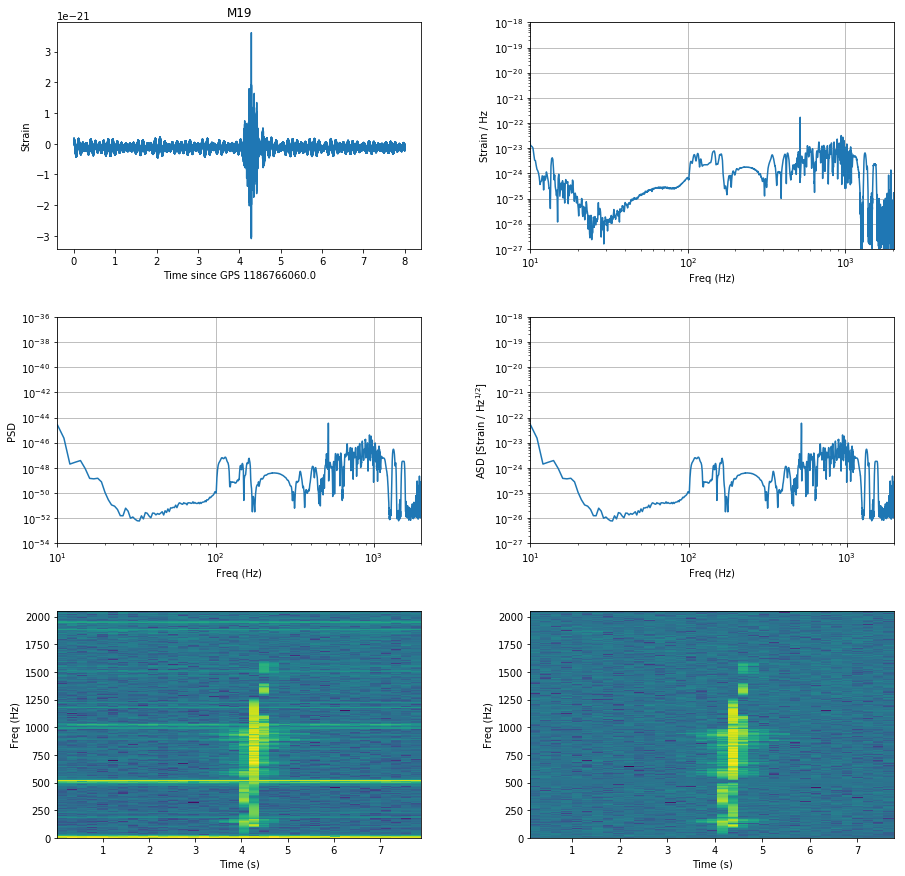

In [97]:
#M19
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(321)
plt.title('M19')
plt.plot(time3 - time3[0], noisy_amp_M19)
plt.xlabel('Time since GPS ' + str(time3[0]))
plt.ylabel('Strain')
#------------------------------------------
# Apply a Blackman Window, and plot the FFT
#------------------------------------------
window = np.blackman(noisy_amp_M19.size)
windowed_strain = noisy_amp_M19*window
freq_domain = np.fft.rfft(windowed_strain) / fs2
freq = np.fft.rfftfreq(len(windowed_strain))*fs2

plt.subplot(322)
plt.loglog( freq, abs(freq_domain) )
plt.axis([10, fs2/2.0, 1e-27, 1e-18])
plt.grid('on')
plt.xlabel('Freq (Hz)')
plt.ylabel('Strain / Hz')

#----------------------------------
# Make PSD for first chunk of data
#----------------------------------
plt.subplot(323)
Pxx, freqs = mlab.psd(noisy_amp_M19, Fs = fs2, NFFT=fs2)
plt.loglog(freqs, Pxx)
plt.axis([10, 2000, 1e-54, 1e-36])
plt.grid('on')
plt.ylabel('PSD')
plt.xlabel('Freq (Hz)')

#-------------------------
# Plot the ASD
#-------------------------------
plt.subplot(324)
plt.loglog(freqs, np.sqrt(Pxx))
plt.axis([10, 2000, 1e-27, 1e-18])
plt.grid('on')
plt.xlabel('Freq (Hz)')
plt.ylabel('ASD [Strain / Hz$^{1/2}$]')

#--------------------
# Make a spectrogram
#-------------------
NFFT = 1024
window = np.blackman(NFFT)
plt.subplot(325)
spec_power, freqs, bins, im = plt.specgram(noisy_amp_M19, NFFT=NFFT, Fs=fs2, 
                                    window=window)
plt.xlabel('Time (s)')
plt.ylabel('Freq (Hz)')

#------------------------------------------
# Renormalize by average power in freq. bin
#-----------------------------------------
med_power = np.zeros(freqs.shape)
norm_spec_power = np.zeros(spec_power.shape)
index = 0
for row in spec_power:
    med_power[index] = np.median(row)
    norm_spec_power[index] = row / med_power[index]
    index += 1

ax = plt.subplot(326)
ax.pcolormesh(bins, freqs, np.log10(norm_spec_power))
plt.xlabel('Time (s)')
plt.ylabel('Freq (Hz)')

plt.show()

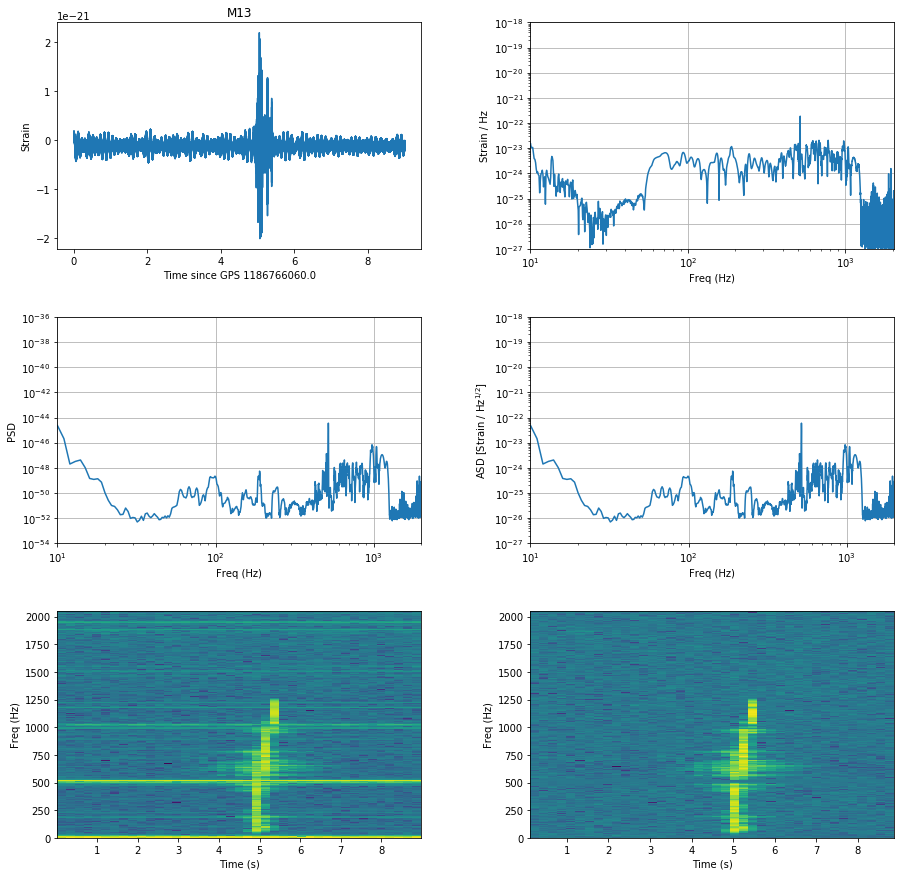

In [98]:
#M13
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(321)
plt.title('M13')
plt.plot(time4 - time4[0], noisy_amp_M13)
plt.xlabel('Time since GPS ' + str(time4[0]))
plt.ylabel('Strain')
#------------------------------------------
# Apply a Blackman Window, and plot the FFT
#------------------------------------------
window = np.blackman(noisy_amp_M13.size)
windowed_strain = noisy_amp_M13*window
freq_domain = np.fft.rfft(windowed_strain) / fs3
freq = np.fft.rfftfreq(len(windowed_strain))*fs3

plt.subplot(322)
plt.loglog( freq, abs(freq_domain) )
plt.axis([10, fs3/2.0, 1e-27, 1e-18])
plt.grid('on')
plt.xlabel('Freq (Hz)')
plt.ylabel('Strain / Hz')

#----------------------------------
# Make PSD for first chunk of data
#----------------------------------
plt.subplot(323)
Pxx, freqs = mlab.psd(noisy_amp_M13, Fs = fs3, NFFT=fs3)
plt.loglog(freqs, Pxx)
plt.axis([10, 2000, 1e-54, 1e-36])
plt.grid('on')
plt.ylabel('PSD')
plt.xlabel('Freq (Hz)')

#-------------------------
# Plot the ASD
#-------------------------------
plt.subplot(324)
plt.loglog(freqs, np.sqrt(Pxx))
plt.axis([10, 2000, 1e-27, 1e-18])
plt.grid('on')
plt.xlabel('Freq (Hz)')
plt.ylabel('ASD [Strain / Hz$^{1/2}$]')

#--------------------
# Make a spectrogram
#-------------------
NFFT = 1024
window = np.blackman(NFFT)
plt.subplot(325)
spec_power, freqs, bins, im = plt.specgram(noisy_amp_M13, NFFT=NFFT, Fs=fs3, 
                                    window=window)
plt.xlabel('Time (s)')
plt.ylabel('Freq (Hz)')

#------------------------------------------
# Renormalize by average power in freq. bin
#-----------------------------------------
med_power = np.zeros(freqs.shape)
norm_spec_power = np.zeros(spec_power.shape)
index = 0
for row in spec_power:
    med_power[index] = np.median(row)
    norm_spec_power[index] = row / med_power[index]
    index += 1

ax = plt.subplot(326)
ax.pcolormesh(bins, freqs, np.log10(norm_spec_power))
plt.xlabel('Time (s)')
plt.ylabel('Freq (Hz)')

plt.show()

In [99]:
print(np.amin( abs(freq_domain)), np.amax( abs(freq_domain)))

9.19997567716e-29 4.56346604337e-22


## For best SNR signal(10Kpc), calculates amplitude data from 1 to 100 Kpc, plots spectra/spectrograms of added signals and calculates SNRs (SNR graph)

In [100]:
#M13-best SNR
def M13_plots(noisy_amp):
    fig = plt.figure(figsize=(15,15))
    fig.subplots_adjust(wspace=0.3, hspace=0.3)

    plt.subplot(321)
    plt.title('M13')
    plt.plot(time4 - time4[0], noisy_amp)
    plt.xlabel('Time since GPS ' + str(time4[0]))
    plt.ylabel('Strain')
#------------------------------------------
# Apply a Blackman Window, and plot the FFT
#------------------------------------------
    window = np.blackman(noisy_amp.size)
    windowed_strain = noisy_amp*window
    freq_domain = np.fft.rfft(windowed_strain) / fs3
    freq = np.fft.rfftfreq(len(windowed_strain))*fs3

    plt.subplot(322)
    plt.loglog( freq, abs(freq_domain) )
    plt.axis([10, fs3/2.0, 1e-27, 1e-18])
    plt.grid('on')
    plt.xlabel('Freq (Hz)')
    plt.ylabel('Strain / Hz')

#----------------------------------
# Make PSD for first chunk of data
#----------------------------------
    plt.subplot(323)
    Pxx, freqs = mlab.psd(noisy_amp, Fs = fs3, NFFT=fs3)
    plt.loglog(freqs, Pxx)
    plt.axis([10, 2000, 1e-54, 1e-36])
    plt.grid('on')
    plt.ylabel('PSD')
    plt.xlabel('Freq (Hz)')

#-------------------------
# Plot the ASD
#-------------------------------
    plt.subplot(324)
    plt.loglog(freqs, np.sqrt(Pxx))
    plt.axis([10, 2000, 1e-27, 1e-18])
    plt.grid('on')
    plt.xlabel('Freq (Hz)')
    plt.ylabel('ASD [Strain / Hz$^{1/2}$]')

#--------------------
# Make a spectrogram
#-------------------
    NFFT = 1024
    window = np.blackman(NFFT)
    plt.subplot(325)
    spec_power, freqs, bins, im = plt.specgram(noisy_amp, NFFT=NFFT, Fs=fs3, 
                                    window=window)
    plt.xlabel('Time (s)')
    plt.ylabel('Freq (Hz)')

#------------------------------------------
# Renormalize by average power in freq. bin
#-----------------------------------------
    med_power = np.zeros(freqs.shape)
    norm_spec_power = np.zeros(spec_power.shape)
    index = 0
    for row in spec_power:
        med_power[index] = np.median(row)
        norm_spec_power[index] = row / med_power[index]
        index += 1

    ax = plt.subplot(326)
    ax.pcolormesh(bins, freqs, np.log10(norm_spec_power))
    plt.xlabel('Time (s)')
    plt.ylabel('Freq (Hz)')

    plt.show()

    
def SNR13(abs_Amp):
    asd=np.array(asd3)
    psd = asd**2
    

    snrsq = integral(abs_Amp**2/psd,df3)
    snr = np.sqrt(snrsq)
    return snr

def fft_M13(amplitude):
    Amplitude=np.array(amplitude)
    Time=np.array(time4)

    ts=Time[1]-Time[0]
    Amp=fftpack.fft(Amplitude)
    f = fftpack.fftfreq(len(Time),ts)
    abs_Amp=abs(Amp)
    f = fftpack.fftshift(f)
    abs_Amp = fftpack.fftshift(abs_Amp)
    n = len(f)
    f = f[int(n/2)+1:n-1]
    abs_Amp = ts*2.0*abs_Amp[int(n/2)+1:n-1]
    return abs_Amp

In [101]:
#M13 has highest SNR
R=[]
SN_R13=[]
noisy_amp_M13=np.zeros([100,len(amplitude3)])
Signal_Amp=np.zeros([100,len(amplitude3)])
window = np.blackman(amplitude3.size)
for r in range(1,101):
    R.append(r)
    Signal_Amp[r-1,:]=(10/r)*amplitude3
    #fft of pure signal
    abs_amp=fft_M13(Signal_Amp[r-1,:])
    #corresponding SNR for hdf5 noise
    SN_R13.append(SNR13(abs_amp))
    #noisy signal
    noisy_amp_M13[r-1,:]=(10/r)*amplitude3+new_noise3*10**(-4)

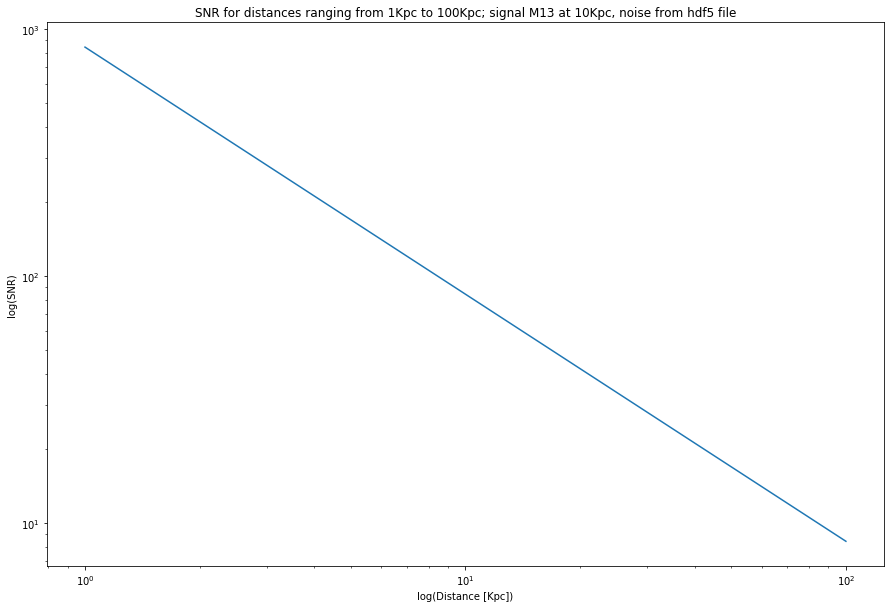

In [102]:
#SNR log plot for 1 to 100 Kpc M13 signal
plt.figure(figsize = [15,10])
plt.title('SNR for distances ranging from 1Kpc to 100Kpc; signal M13 at 10Kpc, noise from hdf5 file')
plt.loglog(R, SN_R13)
plt.xlabel('log(Distance [Kpc])')
plt.ylabel('log(SNR)')
#plt.xlim([1,100])
#plt.ylim([0,1.0e-23])
plt.show()

In [103]:
R1=[1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100] #distances in Kpc for plotting time series/spectrum/spectrogram


### 1 Kpc

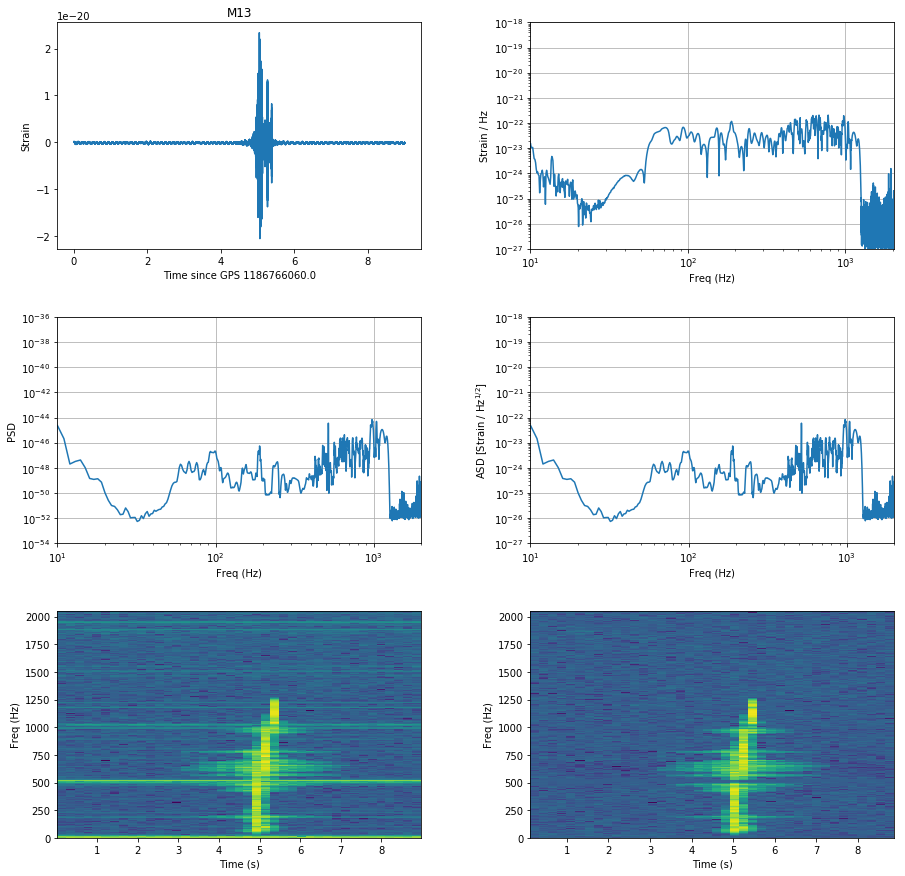

SNR= 843.766933113


In [104]:
M13_plots(noisy_amp_M13[R1[0]-1])
print ('SNR=', SN_R13[R1[0]-1])

### 10 Kpc

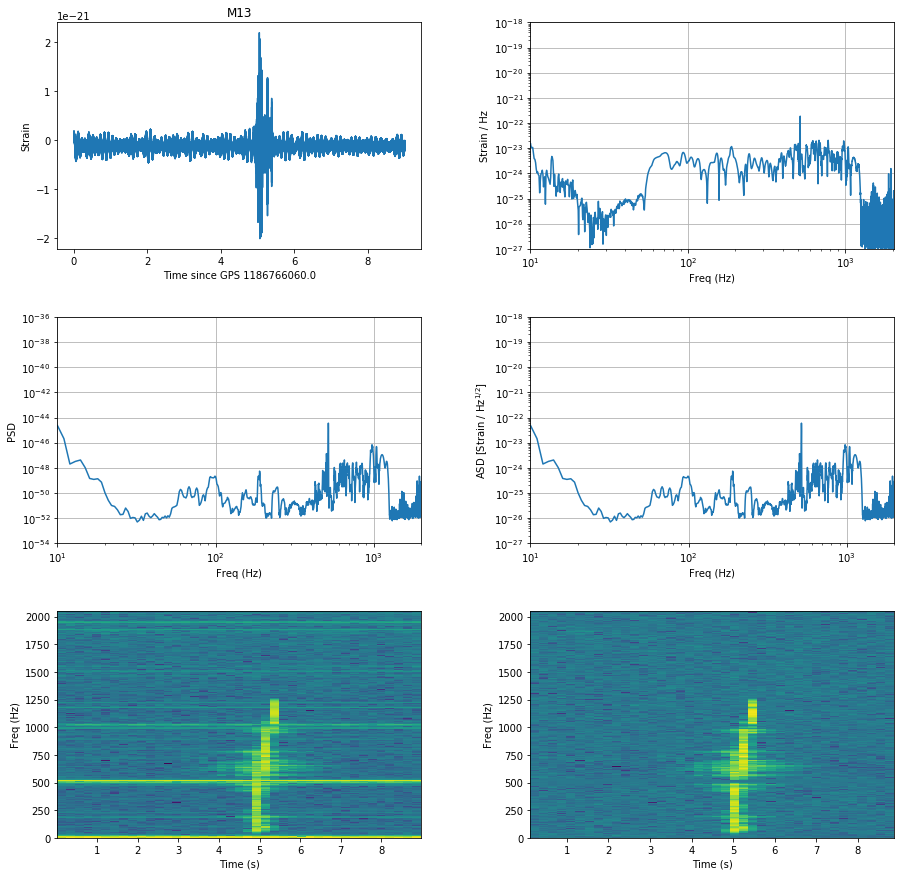

SNR= 84.3766933113


In [105]:
M13_plots(noisy_amp_M13[R1[1]-1])
print ('SNR=', SN_R13[R1[1]-1])

### 20 Kpc

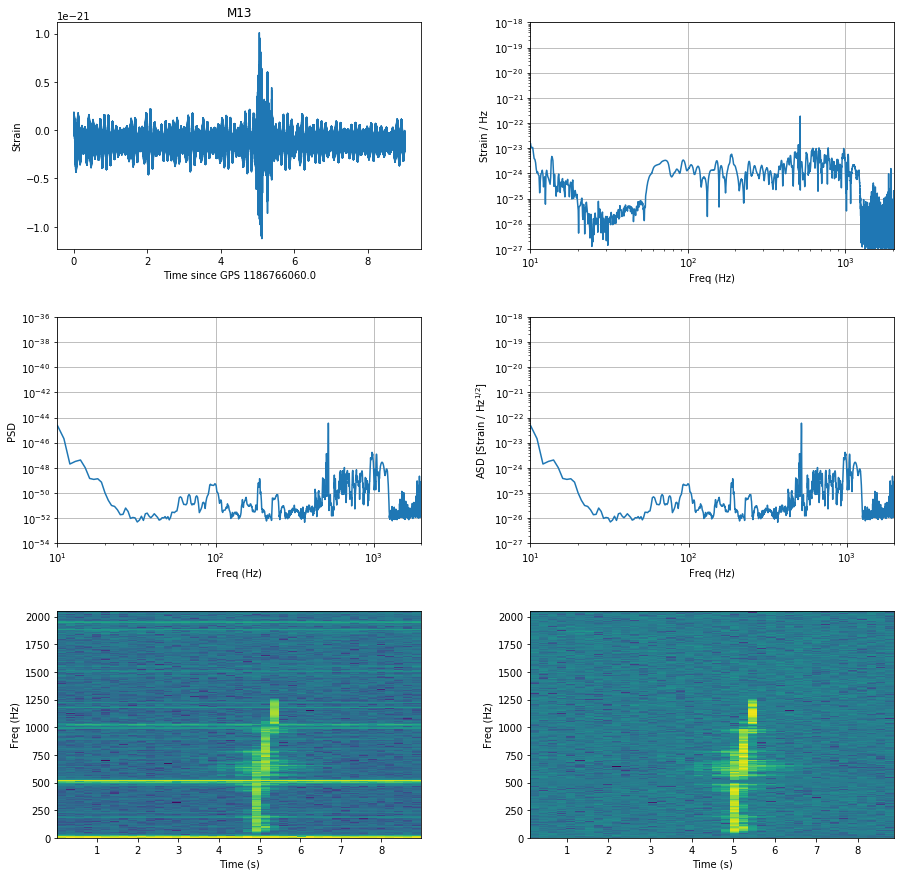

SNR= 42.1883466556


In [106]:
M13_plots(noisy_amp_M13[R1[2]-1])
print ('SNR=', SN_R13[R1[2]-1])

### 30 Kpc

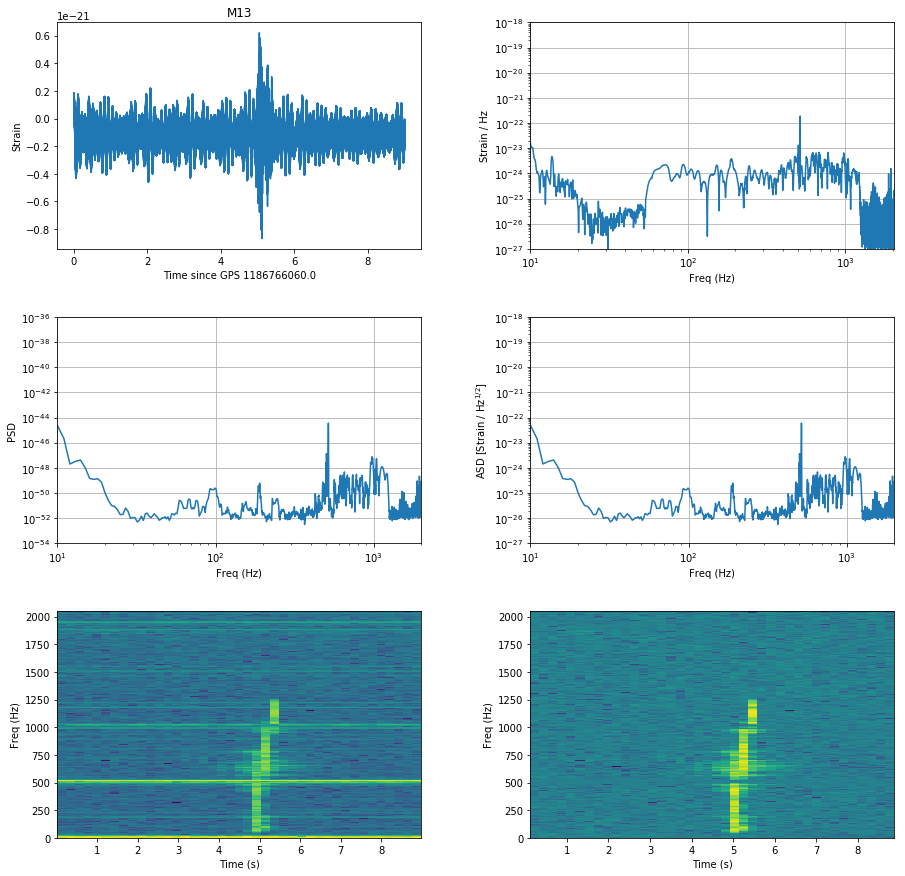

SNR= 28.1255644371


In [107]:
M13_plots(noisy_amp_M13[R1[3]-1])
print ('SNR=', SN_R13[R1[3]-1])

### 40 Kpc

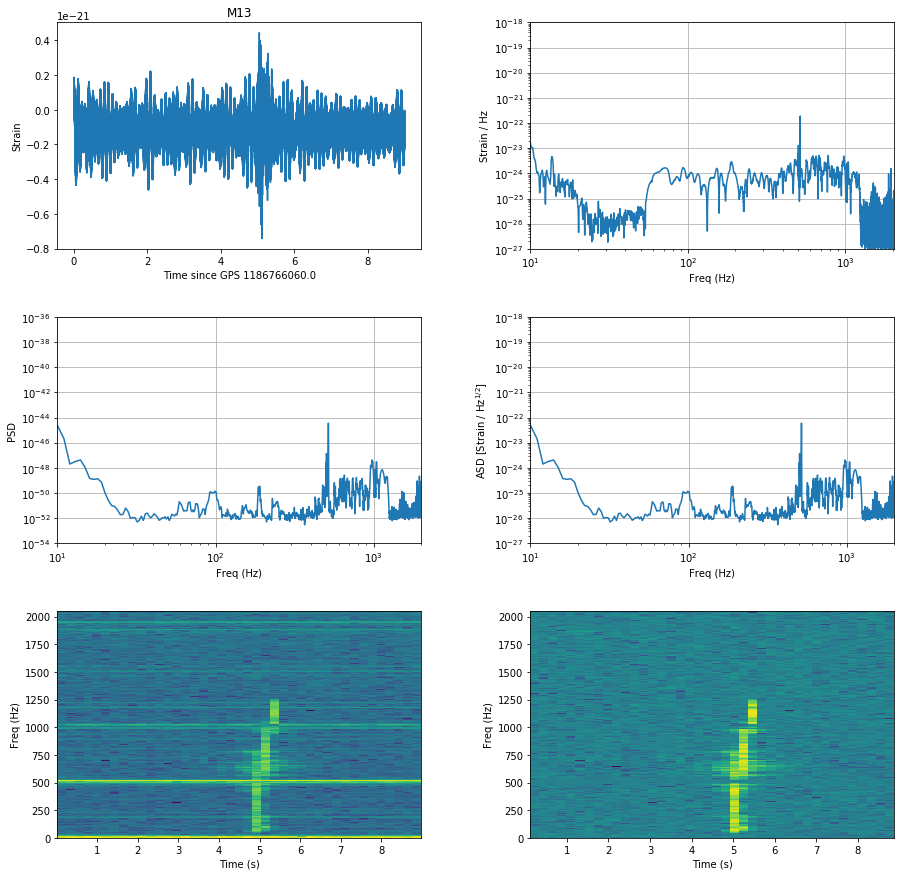

SNR= 21.0941733278


In [108]:
M13_plots(noisy_amp_M13[R1[4]-1])
print ('SNR=', SN_R13[R1[4]-1])

### 50 Kpc


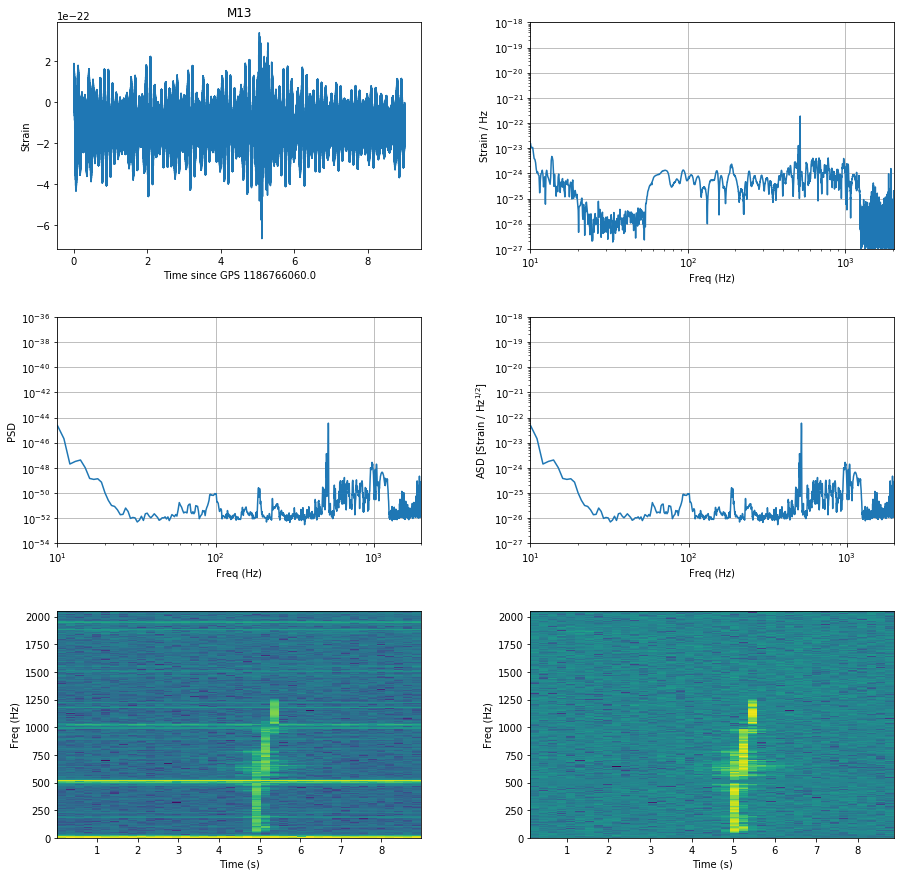

SNR= 16.8753386623


In [109]:
M13_plots(noisy_amp_M13[R1[5]-1])
print ('SNR=', SN_R13[R1[5]-1])

### 60 Kpc

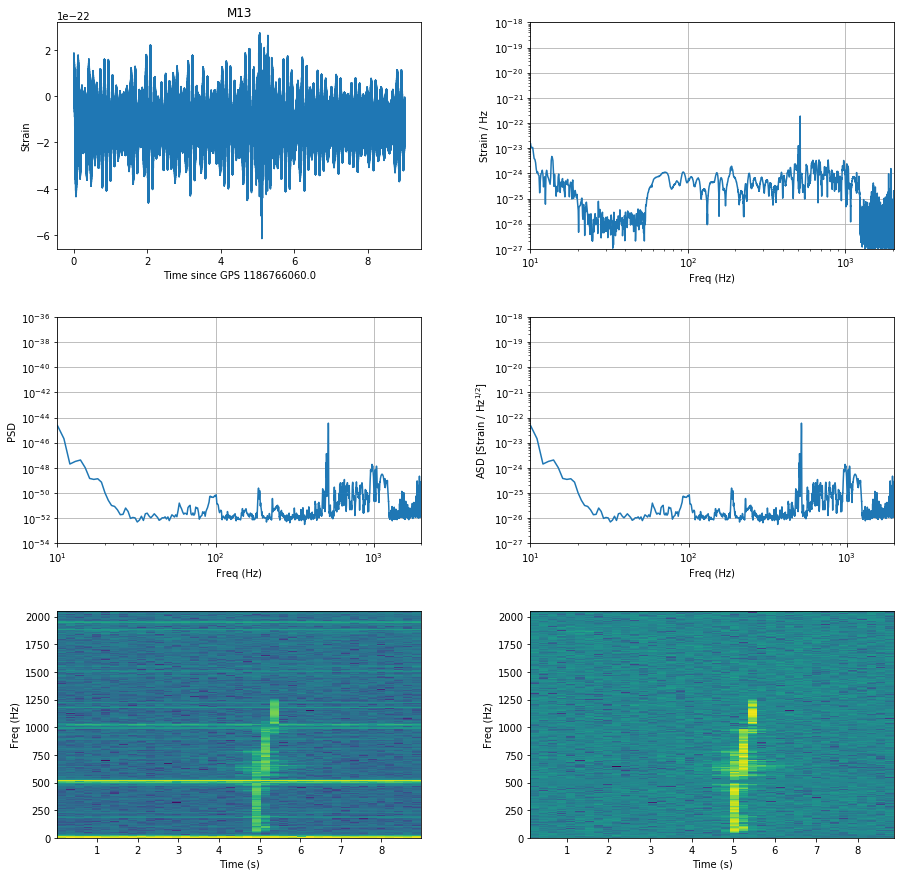

SNR= 14.0627822185


In [110]:
M13_plots(noisy_amp_M13[R1[6]-1])
print ('SNR=', SN_R13[R1[6]-1])

### 70 Kpc

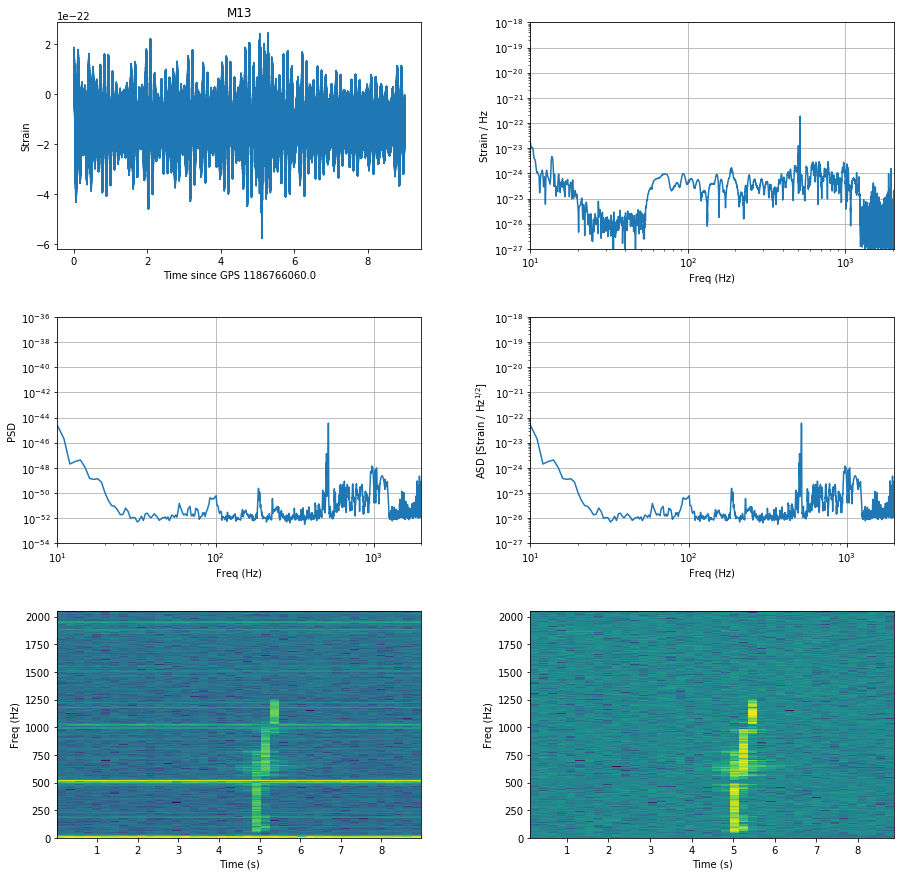

SNR= 12.0538133302


In [111]:
M13_plots(noisy_amp_M13[R1[7]-1])
print ('SNR=', SN_R13[R1[7]-1])

### 80 Kpc

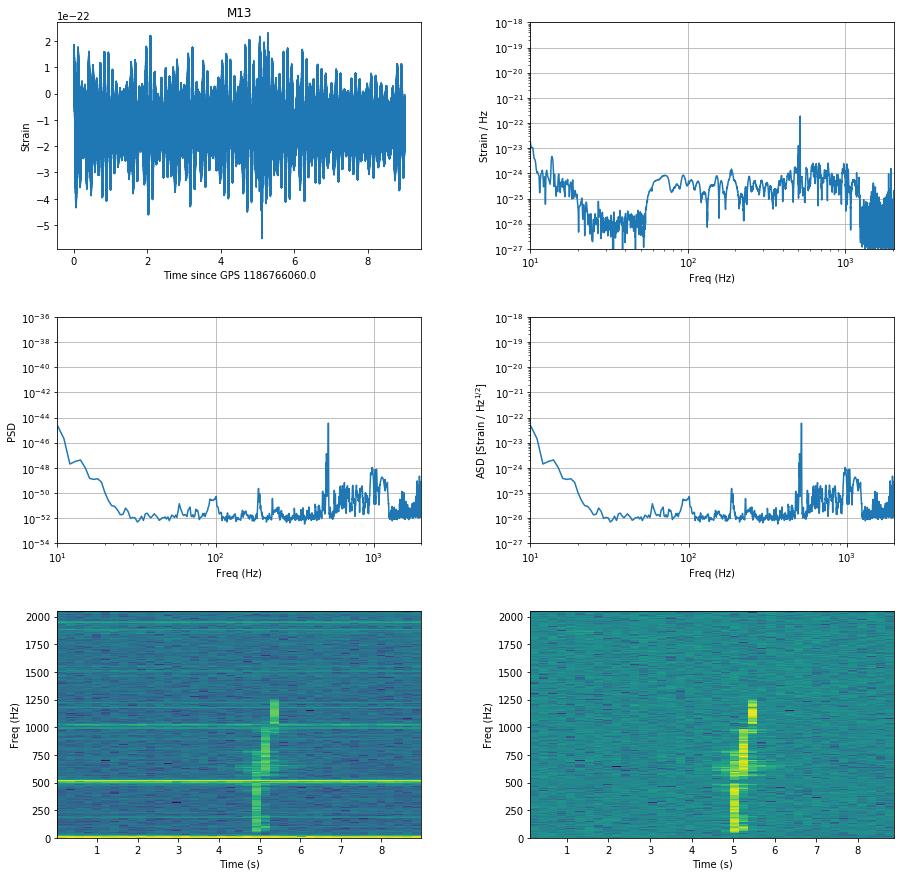

SNR= 10.5470866639


In [112]:
M13_plots(noisy_amp_M13[R1[8]-1])
print ('SNR=', SN_R13[R1[8]-1])

### 90 Kpc

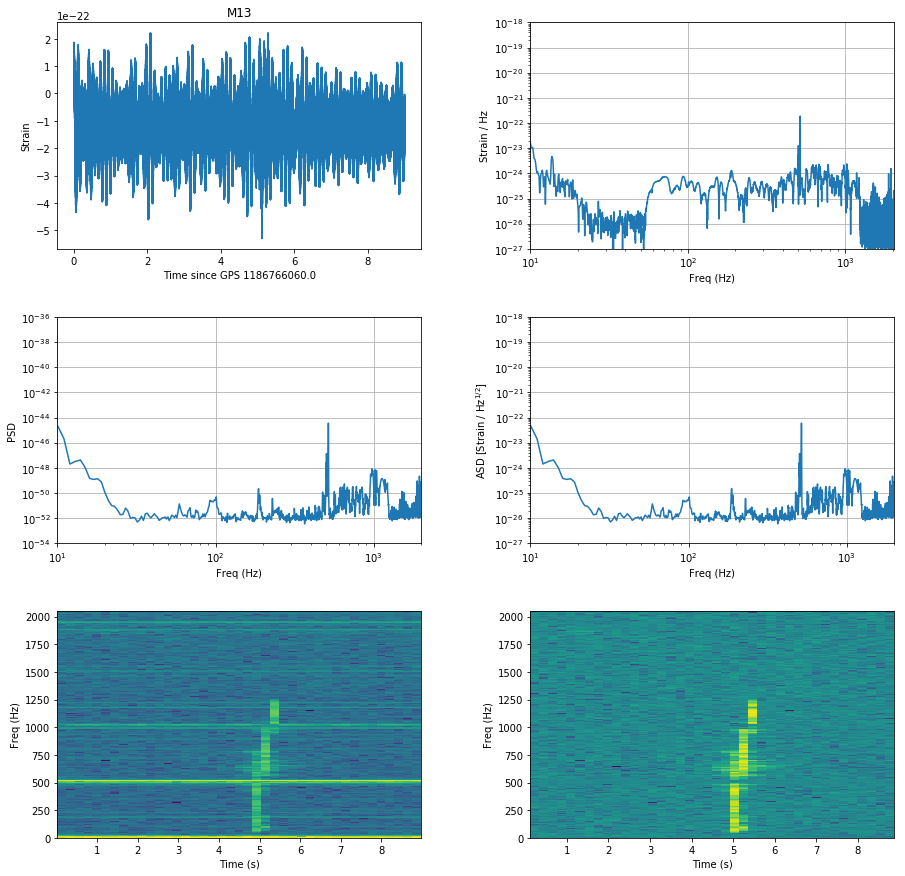

SNR= 9.3751881457


In [113]:
M13_plots(noisy_amp_M13[R1[9]-1])
print ('SNR=', SN_R13[R1[9]-1])

### 100 Kpc

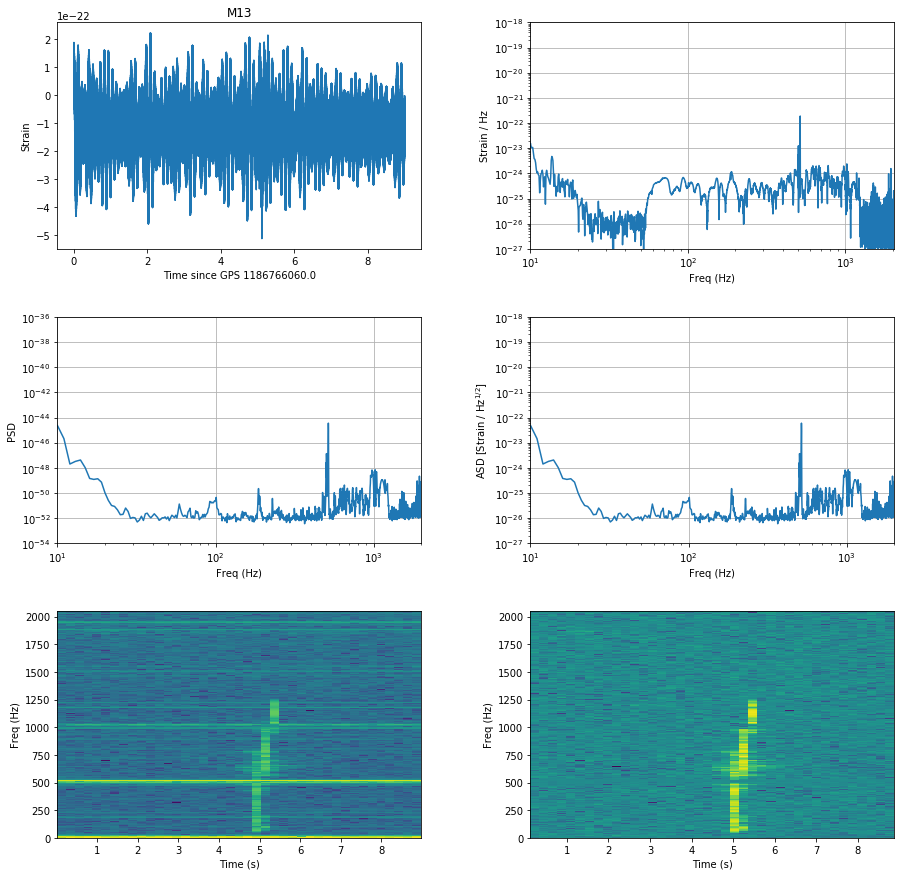

SNR= 8.43766933113


In [114]:
M13_plots(noisy_amp_M13[R1[10]-1])
print ('SNR=', SN_R13[R1[10]-1])

# AdaWave

In [115]:
import matplotlib.pyplot as plt
import pywt
import numpy as np
import random
from math import *
import ipdb
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
import csv

In [116]:
def normalizeData(rawData):
    # normalize the raw dataset
    dim = rawData.shape[1]  
    # the rawData has at least 2 raw, 1 for signal 1 for lable
    minList = [np.amin(rawData[:,x]) for x in range(0, dim-1)] + [0] 
    toZero = rawData - np.array(minList)
    toZero_max=np.amax(toZero[:,0])
    maxList = [np.amax(rawData[:,x])+0.0001*toZero_max for x in range(0, dim-1)] + [1]
   
    # add the [0] and [1] because there is a 'raw of lable', and 0.001 to avoid 1
    
    normData = toZero / (np.array(maxList) - np.array(minList))
    #print(np.amax(normData[:,0]))
    return(normData)

def map2ScaleDomain(dataset, scale=128):
    # map the dataset into scale domain for wavelet transform
    if scale <= 0 or not(isinstance(scale, int)):
        raise ValueError('scale must be a positive interger')
    dim = dataset.shape[1]
    length = dataset.shape[0]
    #print(dim,length)
    sd_data = {}
    for i in range(0,length):
        num = 0
        for j in reversed(range(0, dim-1)):     # start from the most weighted dimension
            #print(dataset[i,j], scale, i,j)
            num += (dataset[i,j]//(1/scale))*pow(scale,j) # let the numbering start from '0'!
        num = int(num)
        if sd_data.get(num, 'N/A')=='N/A':
            sd_data[num] = 1
        else: sd_data[num] += 1
    # print(("%d points have been mapped to scale domain \n") % (len(sd_data)))
    return(sd_data)

def ndWT(data, dim, scale, wave):
    # calculate 1 order n dimensional wavelet transform with numbered grids
    wavelets = {'db1':[0.707, 0.707], 'bior1.3':[-0.09, 0.09, 0.707, 0.707, 0.09, -0.09], \
                'db2':[-0.13, 0.224, 0.836, 0.483]}
    lowFreq = {}
    convolutionLen = len(wavelets.get(wave))-1
    lineLen = ceil(scale/2) + ceil((convolutionLen-2)/2)
    for inDim in range(0, dim):
        for key in data.keys():
            coordinate = [] # coordinate start from 0
            tempkey = key
            for i in range(0,dim):
                # get the coordinate for a numbered grid
                if i <= dim-inDim-1:
                    coordinate.append(tempkey//pow(scale, (dim-1-i)))
                    tempkey = tempkey%pow(scale, (dim-1-i))
                else:
                    coordinate.append(tempkey//pow(lineLen, (dim-1-i)))
                    tempkey = tempkey%pow(lineLen, (dim-1-i))
            coordinate.reverse()
            # if inDim == 0:  print(coordinate,'\n')
            startCoord = ceil((coordinate[inDim]+1)/2)-1    # to calculate ndwt, signal should start from 1, temperally convert
            startNum = 0    # numbered lable for next level of data
            for i in range(0, dim):
                if i <= inDim:
                    if i == inDim:
                        startNum += startCoord*pow(lineLen, i)
                    else:
                        startNum += coordinate[i]*pow(lineLen, i)
                else:
                    startNum += coordinate[i]*pow(scale, i)
            wavelet = wavelets.get(wave)   # for convolution
            # wavelet.reverse()
            for i in range(0, convolutionLen//2+1):  
                if startCoord+i >= lineLen: # coordinate start from 0 
                    break
                if lowFreq.get(int(startNum+pow(lineLen, inDim)*i), 'N/A') == 'N/A':
                    lowFreq[int(startNum+pow(lineLen, inDim)*i)] = \
                            data[key]*wavelet[int((startCoord+1+i)*2-(coordinate[inDim]+1))]
                else:
                    lowFreq[int(startNum+pow(lineLen, inDim)*i)] += \
                            data[key]*wavelet[int((startCoord+1+i)*2-(coordinate[inDim]+1))]
        data = lowFreq
        lowFreq = {}
    # print(("after dwt, there are %d datapoints") % (len(data)))
    return(data)
def getThreshold(data):
    #print(data)
    lst_value = list(data.values())
    #print(lst_value)
    lst_value.sort(reverse=False)
    #print(lst_value)
    #print(len(lst_value))
    lst_fstdiff = [lst_value[i+10] - lst_value[i] for i in range(0, len(lst_value)-11)]
    #print(lst_fstdiff)
    #print(len(lst_fstdiff))
    lst_aver_diff = [sum([lst_fstdiff[i+j]/10 for j in range(0, 9)]) for i in range(0, len(lst_fstdiff)-11)]
    #print(lst_aver_diff)
    #print(len(lst_aver_diff))
    sum_aver = 0
    for i in range(0, len(lst_aver_diff) - 11):
        sum_aver = sum_aver + lst_aver_diff[i]
        average = sum_aver / (i+1)
        count = 0
        for j in range(0, 40):
            if((i+j)<len(lst_aver_diff)):
                if (lst_aver_diff[i+j] > 3*average):
                    count = count + 1
        if (count>37):
            return lst_value[i]
    def_value = 0
    return def_value

def thresholding(data,threshold,scale,dim):
    nodes = {}
    result = {}
    startNode = node(0)
    avg = 0
    for key,value in data.items():
        if value >= threshold:
            nodes[key]=node(key,value)
            avg += value
            if value > startNode.value:
                startNode = node(key,value)
    cutMiniCluster = avg/len(nodes)
    # ipdb.set_trace()
    # clusters = clustering(nodes,startNode,scale,dim,cutMiniCluster)
    clusters = clustering(nodes,scale,dim,cutMiniCluster)
    # for tag in clusters.keys():
    #     for point in clusters.get(tag):
    #         result[point.key] = tag
    return(clusters)
def showThreshold(data,threshold):
    value = list(data.values())
    value.sort(reverse=True)
    # 'cutMiniCluster' is used to throw away the single grid
    x = [i for i in range(1, len(value)+1)]
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(x, value)
    ax.axhline(y=threshold, xmin=0, xmax=1, color='r')
    plt.show()

def markData(normData,cluster,scale):
    dim = normData.shape[1]-1
    # there is a column for tags
    tags = []
    for point in range(0,normData.shape[0]):
        number = 0
        for inDim in range(0,dim):
            number += (normData[point,inDim]//(1/scale))*pow(scale,inDim)
        if cluster.get(int(number),'N/A')=='N/A':
            tags.append(0)
        else:
            tags.append(cluster.get(int(number)))
    return(tags)
# start node checking
class node():
    def __init__(self,key=0,value=0):
        self.key = key
        self.value = value
        self.process = False
        self.cluster = None
    def around(self,scale=1,dim=1):
        aroundNodeKey = []
        coordinate = []
        for inDim in range(0,dim):
            # we can't afford diagnal searching
            dimCoord = self.key//pow(scale,inDim)
            if dimCoord == 0:
                aroundNodeKey.append(self.key+pow(scale,inDim))
            elif dimCoord == scale-1:
                aroundNodeKey.append(self.key-pow(scale,inDim))
            else:
                aroundNodeKey.append(self.key+pow(scale,inDim))
                aroundNodeKey.append(self.key-pow(scale,inDim))
        return(aroundNodeKey)
def clustering(data, scale, dim, cutMiniCluster):
    equal_pair = []
    cluster_flag = 1
    for point in data.values():
        point.process = True
        for around in point.around(scale, dim):
            if not(data.get(around, 'N/A')=='N/A'):
                around = data.get(around)
                if around.cluster is not None:
                    if point.cluster is None:
                        point.cluster = around.cluster
                    elif point.cluster != around.cluster:
                        mincluster = min(point.cluster, around.cluster)
                        maxcluster = max(point.cluster, around.cluster)
                        equal_pair += [(mincluster,maxcluster)]
        if point.cluster is None:
            point.cluster = cluster_flag
            cluster_flag += 1
    #-------------------
    # def maptest():
    #     board = np.zeros((int(scale),int(scale)),dtype=np.int) 
    #     for point in data.values():
    #         x = point.key // scale
    #         y = point.key % scale
    #         board[int(x),int(y)] = point.cluster
    #     print(board)
    #-------------------
    equal_pair = set(equal_pair)
    equal_list = bfs(equal_pair,cluster_flag)
    # ipdb.set_trace()
    # maptest()
    result = build_key_cluster(data,equal_list,cutMiniCluster)
    return(result)

def bfs(equal_pair,maxQueue):
    if equal_pair == []:
        return(equal_pair)
    group = {x:[] for x in range(1,maxQueue)}
    result = []
    for x,y in equal_pair:
        group[x].append(y)
        group[y].append(x)
    for i in range(1,maxQueue):
        if i in group:
            if group[i] == []:
                del group[i]
            else:
                queue = [i]
                for j in queue:
                    if j in group:
                        queue += group[j]
                        del group[j]
                record = list(set(queue))
                record.sort()
                result.append(record)
    return(result)
def build_key_cluster(nodes,equal_list,cutMiniCluster):
    cluster_key = {}
    for point in nodes.values():
        flag = 0
        for cluster in equal_list:
            if point.cluster in cluster:
                point.cluster = cluster[0]
                if cluster_key.get(cluster[0],'N/A') == 'N/A':
                    cluster_key[cluster[0]] = [point]
                    flag = 1
                else:
                    cluster_key[cluster[0]].append(point)
                    flag = 1
                break
        if flag == 0:
            if cluster_key.get(point.cluster,'N/A') == 'N/A':
                cluster_key[point.cluster] = [point]
            else:
                cluster_key[point.cluster].append(point)
    count = 1
    result = {}
    # ipdb.set_trace()
    for cluster in cluster_key.keys():
        # ipdb.set_trace()
        if len(cluster_key[cluster]) == 1:
            if cluster_key[cluster][0].value < cutMiniCluster:
                continue
        for p in cluster_key[cluster]:
            result[p.key] = count
        count += 1
    return(result)
def draw2Darray(x,y,tag):
    # draw a picture for 2d dataset
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    color = tag / np.amax(tag)
    rgb = plt.get_cmap('jet')(color)
    ax.scatter(x,y,color = rgb)
    plt.show()


## Use AdaWave in the hdf5 noise added noisy M13 signal of 1 to 100Kpc

In [117]:
def AdaWave_plots(Amplitude, Time):
    data = np.column_stack((Amplitude,Time))
# finished reading, start clustering
    normData = normalizeData(data)
    #print(normData)
    scale = 128
    dim = 2
    wavelet = 'db2'
    wavelength = {'db1':0, 'db2':1, 'bior1.3':2}
    dataDic = map2ScaleDomain(normData,scale)
    dwtResult = ndWT(dataDic,2,scale,wavelet)
    threshold = getThreshold(dwtResult)
    print("threshold:")
    print(threshold)

#show threshold on the chart
    showThreshold(dwtResult,threshold)
    lineLen = scale/2+wavelength.get(wavelet)
    result = thresholding(dwtResult,threshold,lineLen,dim)
    tags = markData(normData,result,lineLen)

#show the result after clustering
    draw2Darray(normData[:,1],normData[:,0],np.array(tags))
    quality = nmi(list(normData[:,normData.shape[1]-1]),tags)
    print("AMI:")
    print(quality)


## Injsig

threshold:
6.1080179999999995


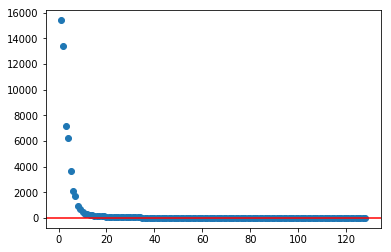

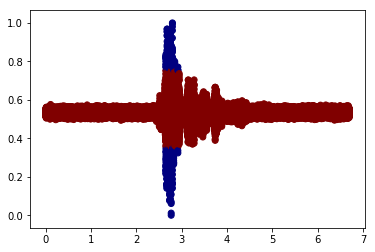

AMI:
0.0503901478951


In [118]:
df1=pd.read_csv('injsig.csv')
AdaWave_plots(df1.Amplitude, df1.Time)

### 1 Kpc

threshold:
0


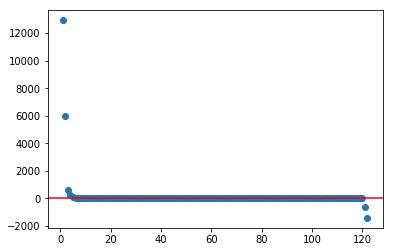

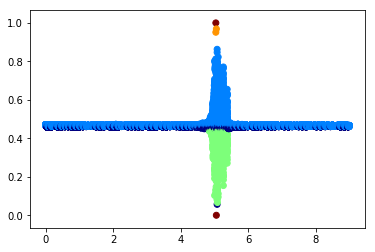

AMI:
0.214520262968


In [119]:
AdaWave_plots(noisy_amp_M13[R1[0]-1], time4 - time4[0])

### 10 Kpc

threshold:
2.138241


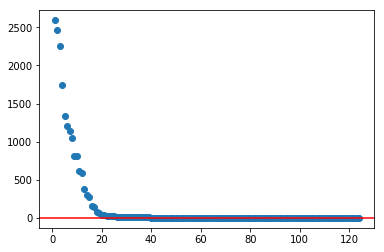

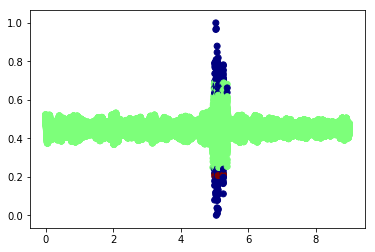

AMI:
0.051163194563


In [120]:
AdaWave_plots(noisy_amp_M13[R1[1]-1], time4 - time4[0])

### 20 Kpc

threshold:
2.2174529999999995


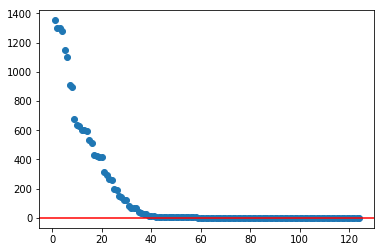

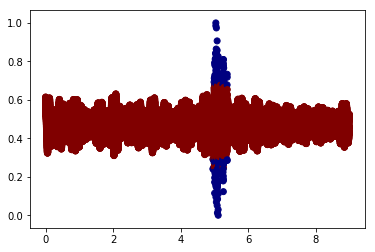

AMI:
0.0539179343115


In [121]:
AdaWave_plots(noisy_amp_M13[R1[2]-1], time4 - time4[0])

### 30 Kpc

threshold:
0.852978


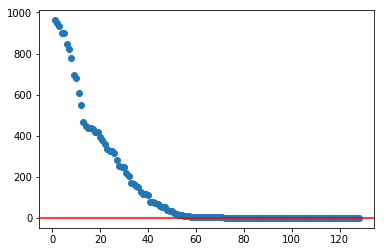

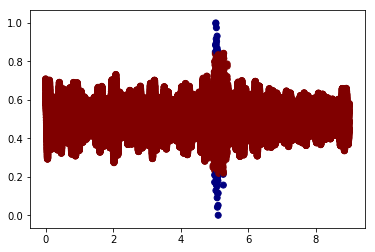

AMI:
0.0287248361599


In [122]:
AdaWave_plots(noisy_amp_M13[R1[3]-1], time4 - time4[0])

### 40 Kpc

threshold:
0.345632


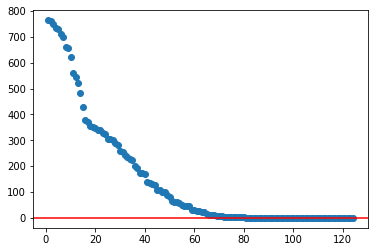

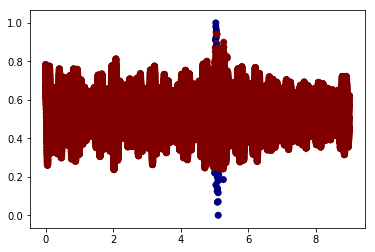

AMI:
0.0227192882524


In [123]:
AdaWave_plots(noisy_amp_M13[R1[4]-1], time4 - time4[0])

### 50 Kpc

threshold:
0.295456


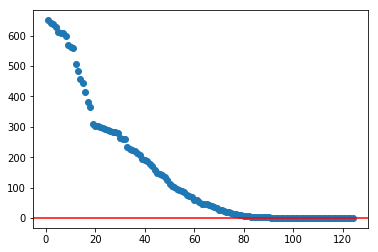

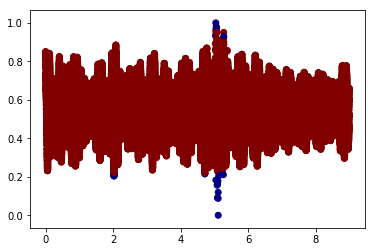

AMI:
0.0231309159414


In [124]:
AdaWave_plots(noisy_amp_M13[R1[5]-1], time4 - time4[0])

### 60 Kpc

threshold:
0.51184


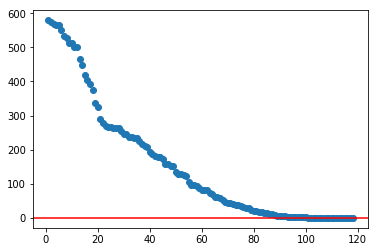

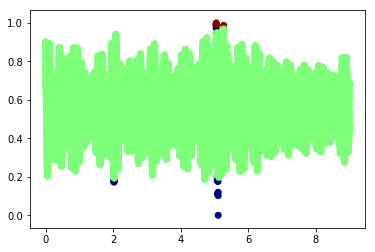

AMI:
0.0211024231713


In [125]:
AdaWave_plots(noisy_amp_M13[R1[6]-1], time4 - time4[0])

### 70 Kpc

threshold:
0


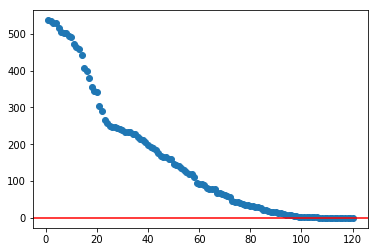

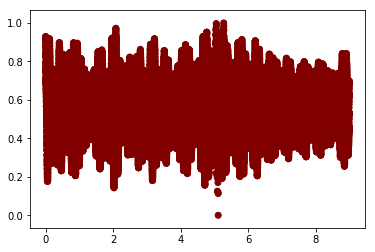

AMI:
0.0


In [126]:
AdaWave_plots(noisy_amp_M13[R1[7]-1], time4 - time4[0])

### 80 Kpc

threshold:
0


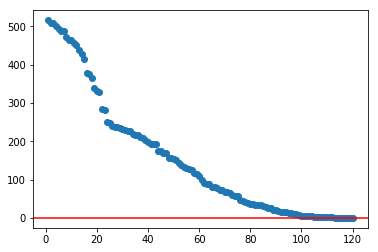

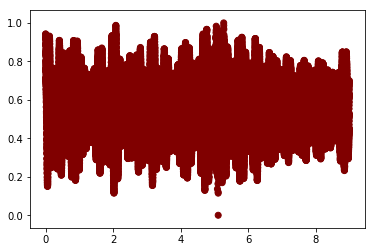

AMI:
0.0


In [127]:
AdaWave_plots(noisy_amp_M13[R1[8]-1], time4 - time4[0])

### 90 Kpc

threshold:
0


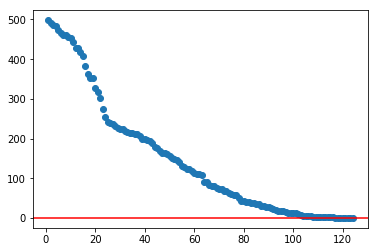

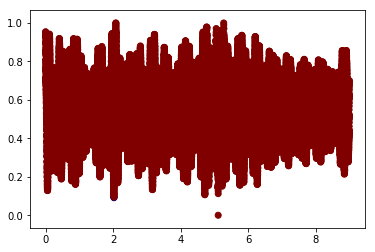

AMI:
0.00545036848483


In [128]:
AdaWave_plots(noisy_amp_M13[R1[9]-1], time4 - time4[0])

### 100 Kpc

threshold:
0


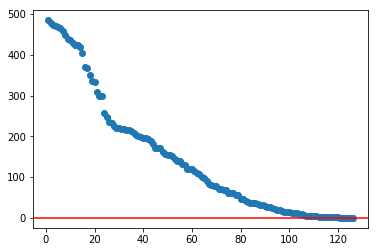

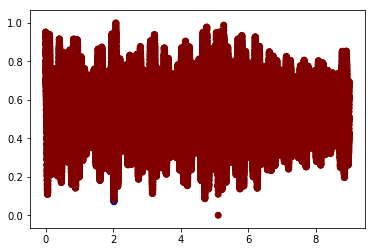

AMI:
0.0102235078053


In [129]:
AdaWave_plots(noisy_amp_M13[R1[10]-1], time4 - time4[0])

# Whitened noisy signal-Morozova M10

In [130]:
#M10
time1=[]
amplitude1=[]
df1=pd.read_csv('Morozova_M10_SFHo_SNR20_L1_wf_white_rec.csv')

time1=df1.Time
amplitude1=np.array(df1.Amplitude)

len1=time1[len(time1)-1]-time1[0]
print(len1)
ts1=len1/len(time1)

print(ts1)
fs1=int(1/ts1)

print(fs1)

7.9997561
0.000244133181763
4096


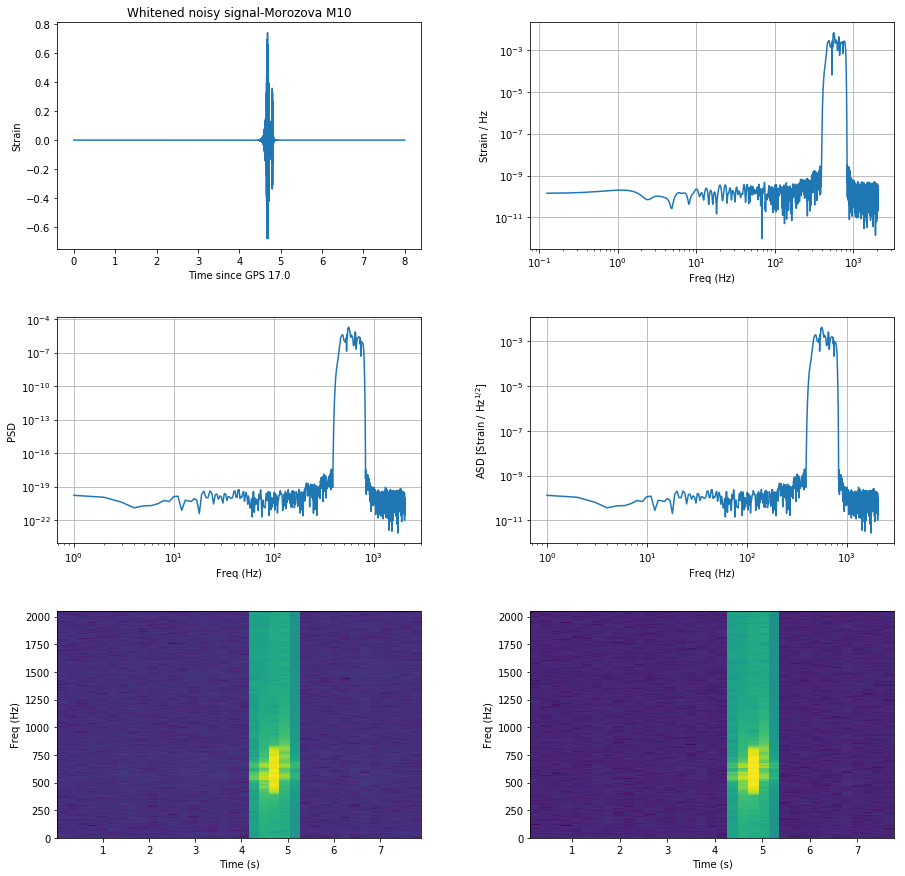

In [131]:
#M10
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(321)
plt.title('Whitened noisy signal-Morozova M10')
plt.plot(time1 - time1[0], amplitude1)
plt.xlabel('Time since GPS ' + str(time1[0]))
plt.ylabel('Strain')
#------------------------------------------
# Apply a Blackman Window, and plot the FFT
#------------------------------------------
window = np.blackman(amplitude1.size)
windowed_strain = amplitude1*window
freq_domain = np.fft.rfft(windowed_strain) / fs1
freq = np.fft.rfftfreq(len(windowed_strain))*fs1

plt.subplot(322)
plt.loglog( freq, abs(freq_domain) )
#plt.axis([10, fs1/2.0, 1e-27, 1e-18])
plt.grid('on')
plt.xlabel('Freq (Hz)')
plt.ylabel('Strain / Hz')

#----------------------------------
# Make PSD for first chunk of data
#----------------------------------
plt.subplot(323)
Pxx, freqs = mlab.psd(amplitude1, Fs = fs1, NFFT=fs1)
plt.loglog(freqs, Pxx)
#plt.axis([10, 2000, 1e-54, 1e-36])
plt.grid('on')
plt.ylabel('PSD')
plt.xlabel('Freq (Hz)')

#-------------------------
# Plot the ASD
#-------------------------------
plt.subplot(324)
plt.loglog(freqs, np.sqrt(Pxx))
#plt.axis([10, 2000, 1e-27, 1e-18])
plt.grid('on')
plt.xlabel('Freq (Hz)')
plt.ylabel('ASD [Strain / Hz$^{1/2}$]')

#--------------------
# Make a spectrogram
#-------------------
NFFT = 1024
window = np.blackman(NFFT)
plt.subplot(325)
spec_power, freqs, bins, im = plt.specgram(amplitude1, NFFT=NFFT, Fs=fs1, 
                                    window=window)
plt.xlabel('Time (s)')
plt.ylabel('Freq (Hz)')

#------------------------------------------
# Renormalize by average power in freq. bin
#-----------------------------------------
med_power = np.zeros(freqs.shape)
norm_spec_power = np.zeros(spec_power.shape)
index = 0
for row in spec_power:
    med_power[index] = np.median(row)
    norm_spec_power[index] = row / med_power[index]
    index += 1

ax = plt.subplot(326)
ax.pcolormesh(bins, freqs, np.log10(norm_spec_power))
plt.xlabel('Time (s)')
plt.ylabel('Freq (Hz)')

plt.show()

threshold:
0


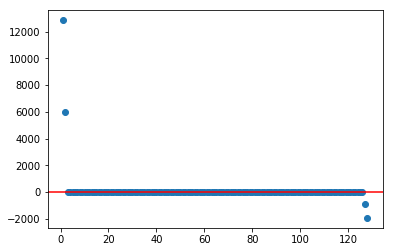

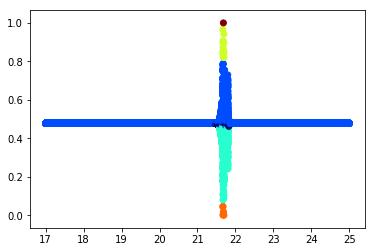

AMI:
0.106386690903


In [132]:
AdaWave_plots(df1.Amplitude, df1.Time)

# Whitening filter

In [133]:
def autocorr(amp):
    N=len(amp)
    M=4096 #order
    r=[]
    for k in range(0,M+1):
        s=0
        for n in range(k,N):
            s=s+(1/N)*amp[n]*amp[n-k]
        r.append(s)
    return r


In [134]:
#Levinson-durbin
#def levi(r,M):
    #k=r[1]/r[0]
    
    #c=[]
    #if M==1:
        #return np.array(k)
    #else:
        #for i in range(1,M):
            #for j in range(1,M-1):
                #num=num+r[M-j]
            #k=r[M]-
            #c.append(levi(r,M-1)-k*c[M-i])
    
    

In [135]:
#
#c=levi(r,4096)

In [136]:
def linpred(r):
    M=4096
    W=np.zeros([M,M])
    for i in range(0,M):
        for j in range(0,M):
            if i+j<M:
                W[i,j+i]=r[j]
    for i in range(0,M):
        for j in range(0,M):
            if j<i:
                W[i][j]=W[j][i]
    y = np.linalg.inv(W)
    rp=[]
    for i in range(1,M+1):
        rp.append(r[i])
    rp=np.array(rp)
    c=np.matmul(y,rp)
    return(c)

In [137]:
def err(c,x):
    #M=4096
    #N=len(x)
    c=list(c)
    c.insert(0,0)
    x_predicted=[]
    for n in range(0,N):
        s=0
        for m in range(0,M+1):
            if n>=m:
                s=s+c[m]*x[n-m]
        x_predicted.append(s)
    e=np.array(x)-np.array(x_predicted)
    return e
    

## 10Kpc

In [138]:
M=4096
x= new_noise3*10**(-4)
r=autocorr(x)
N=len(x)
c=linpred(r)
x=noisy_amp_M13[R1[1]-1]
e=err(c,x)

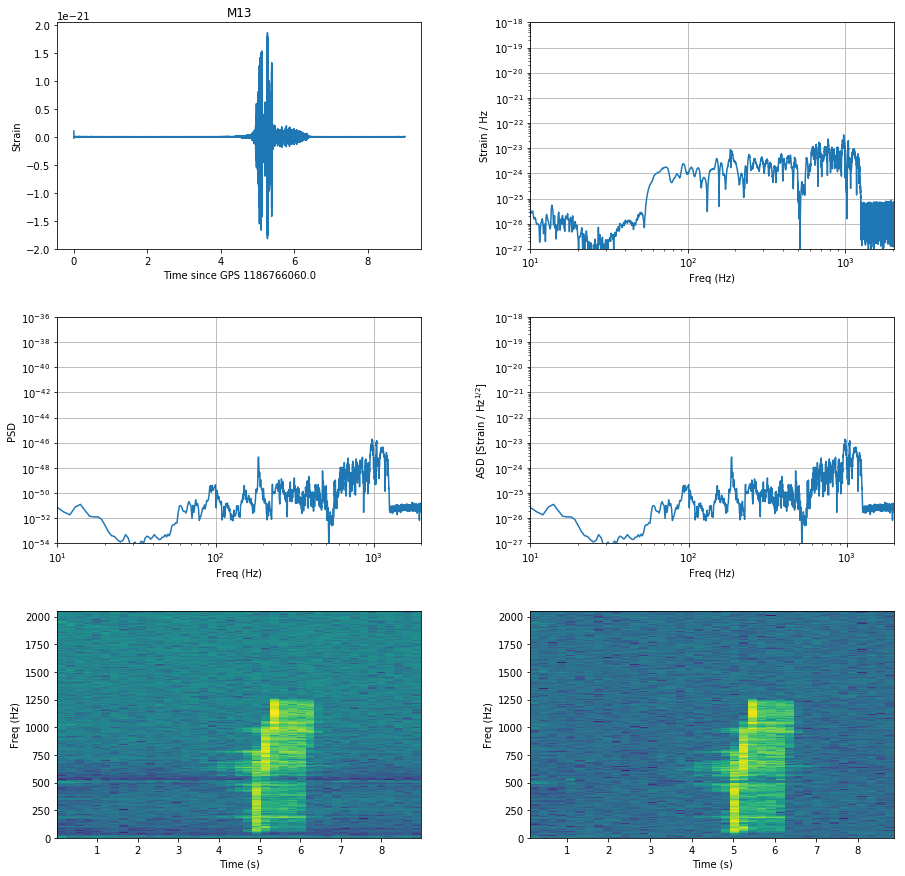

In [139]:
M13_plots(e)

threshold:
0


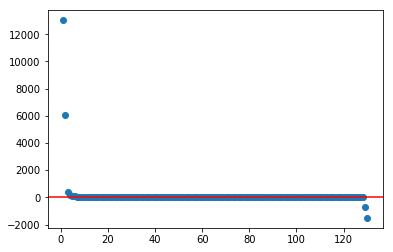

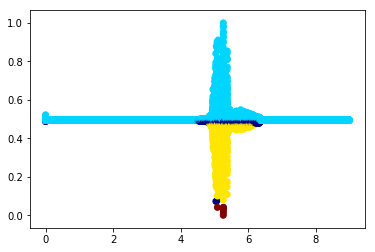

AMI:
0.180934342451


In [140]:
AdaWave_plots(e, time4 - time4[0])

## 20Kpc

In [142]:
x=noisy_amp_M13[R1[2]-1]
e=err(c,x)

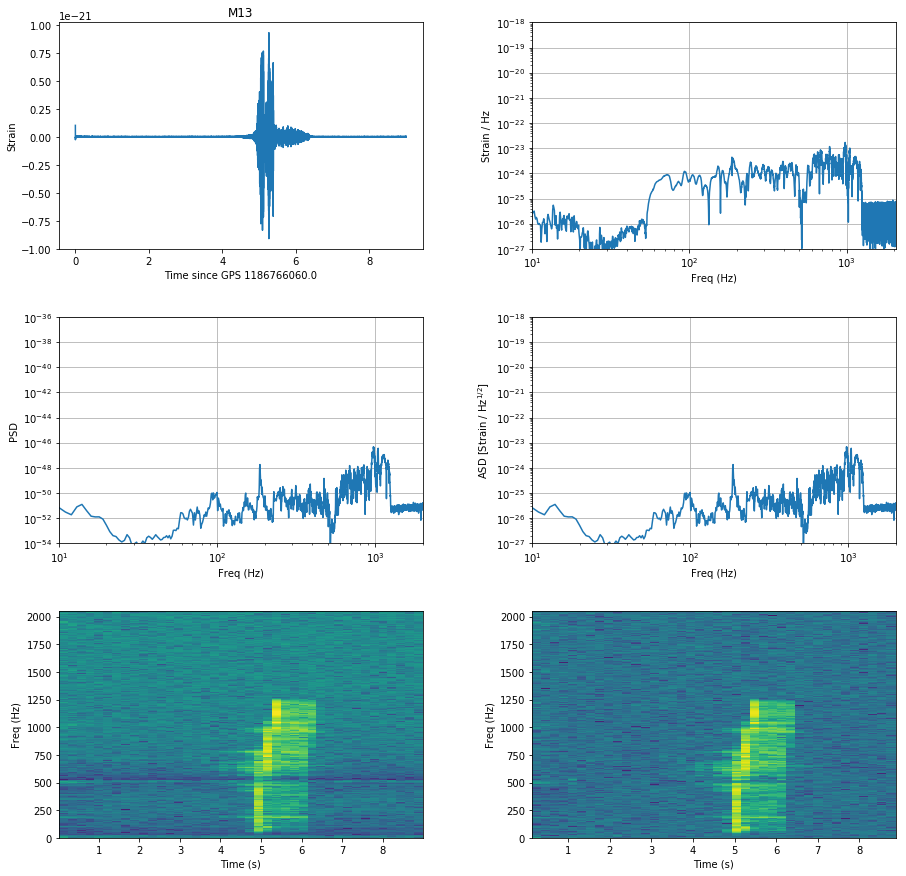

In [143]:
M13_plots(e)

threshold:
0


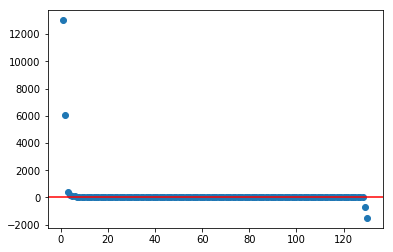

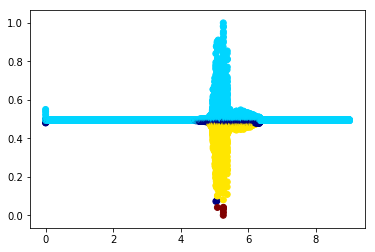

AMI:
0.182356550155


In [144]:
AdaWave_plots(e, time4 - time4[0])

## 30kpc

In [145]:
x=noisy_amp_M13[R1[3]-1]
e=err(c,x)

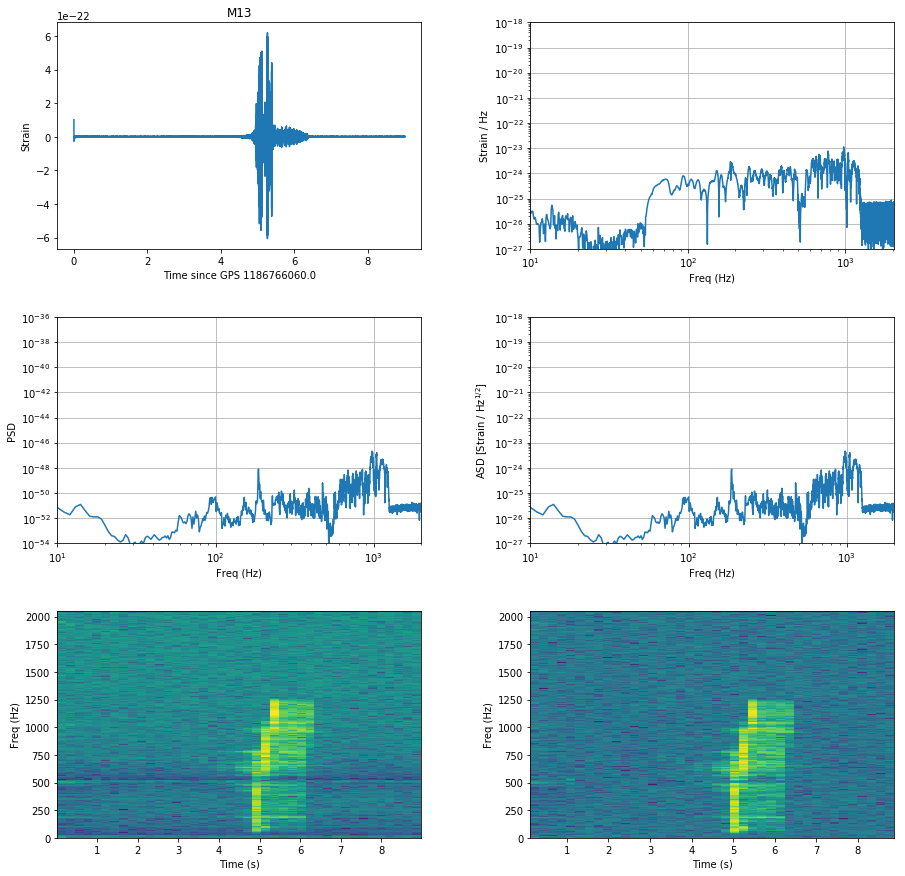

In [146]:
M13_plots(e)

threshold:
0


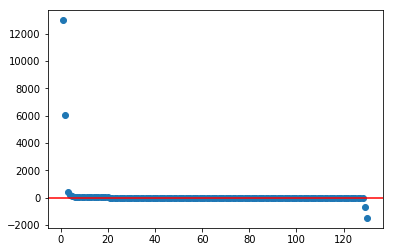

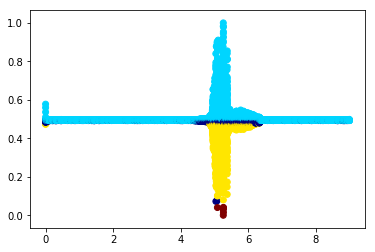

AMI:
0.185544607042


In [147]:
AdaWave_plots(e, time4 - time4[0])

## 40Kpc

In [148]:
x=noisy_amp_M13[R1[4]-1]
e=err(c,x)

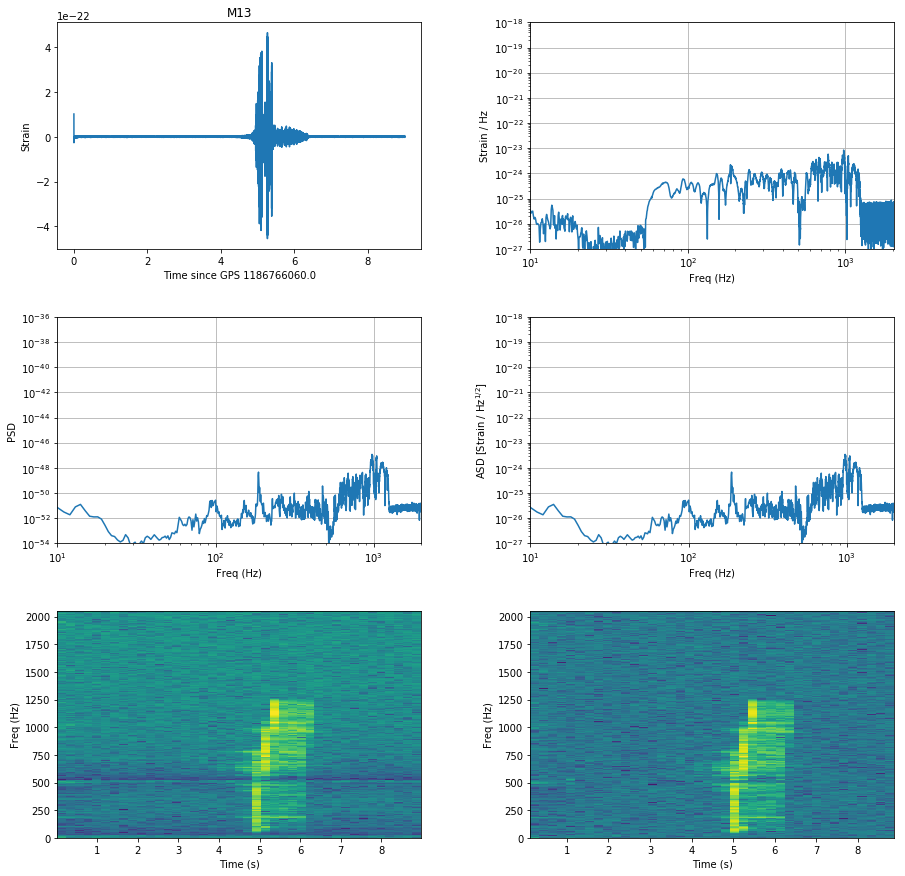

In [149]:
M13_plots(e)

threshold:
0


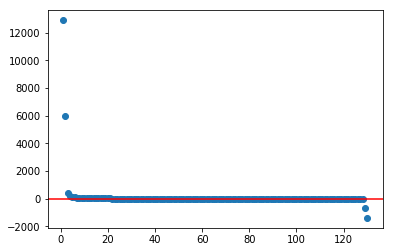

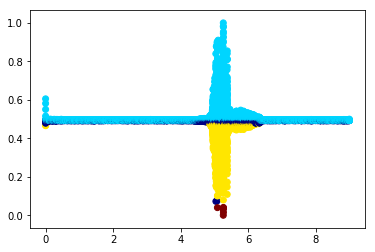

AMI:
0.197156403303


In [150]:
AdaWave_plots(e, time4 - time4[0])

## 50Kpc

In [152]:
x=noisy_amp_M13[R1[5]-1]
e=err(c,x)

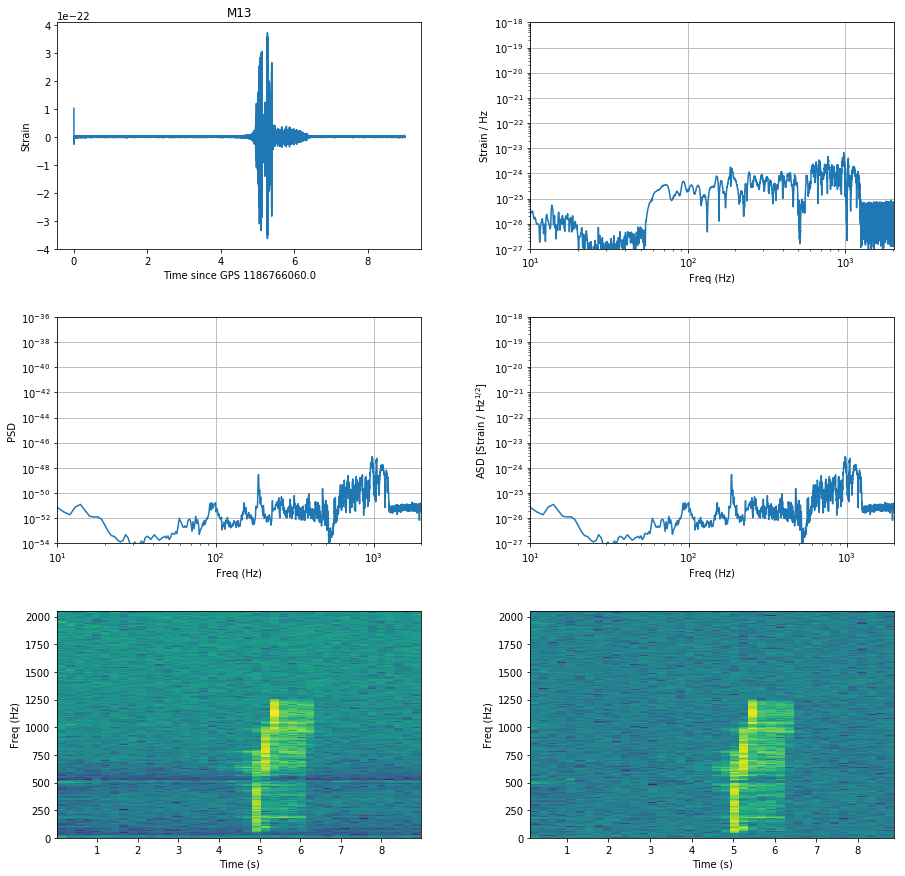

In [153]:
M13_plots(e)

threshold:
0


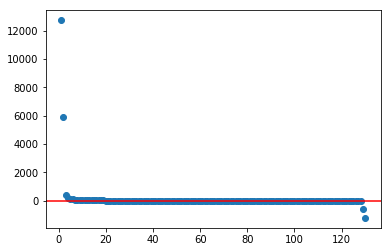

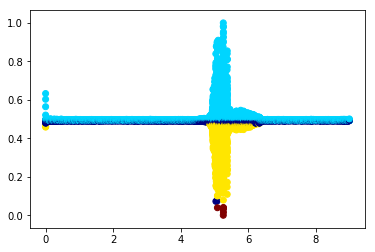

AMI:
0.214098763953


In [154]:
AdaWave_plots(e, time4 - time4[0])

## 60Kpc

In [155]:
x=noisy_amp_M13[R1[6]-1]
e=err(c,x)

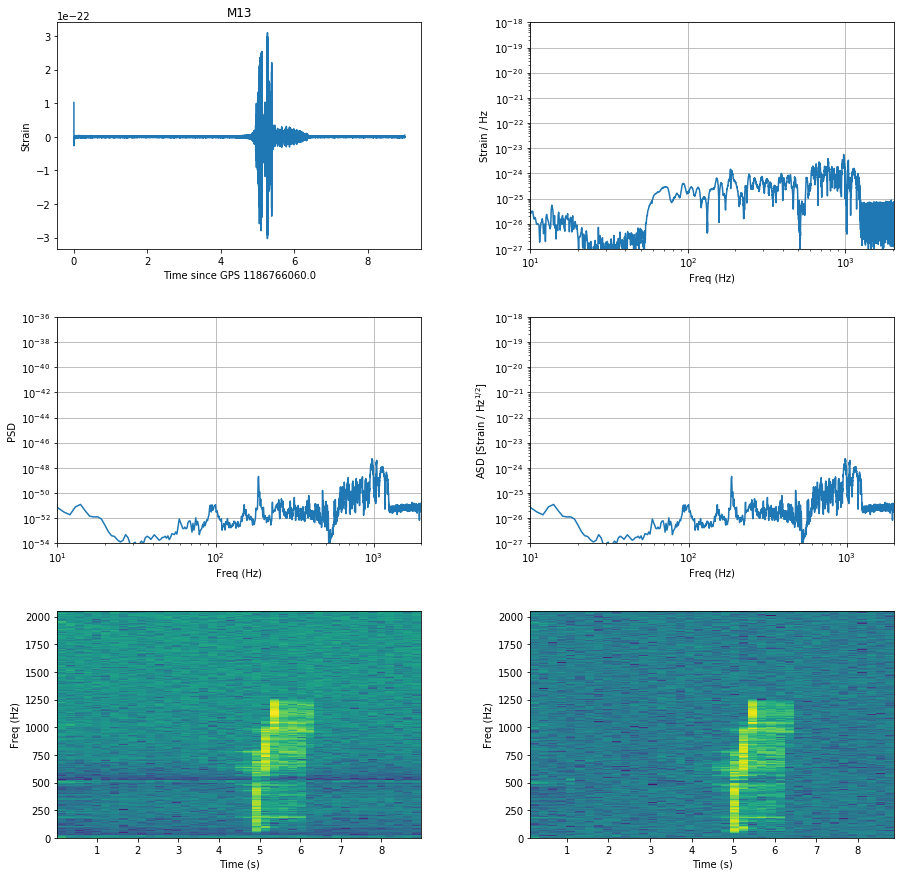

In [156]:
M13_plots(e)

threshold:
0


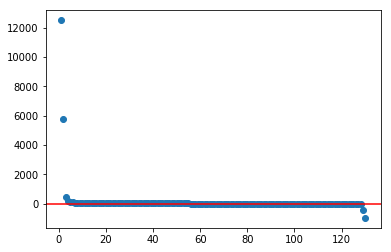

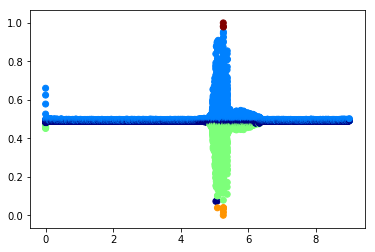

AMI:
0.229452141852


In [157]:
AdaWave_plots(e, time4 - time4[0])

## 70Kpc

In [158]:
x=noisy_amp_M13[R1[7]-1]
e=err(c,x)

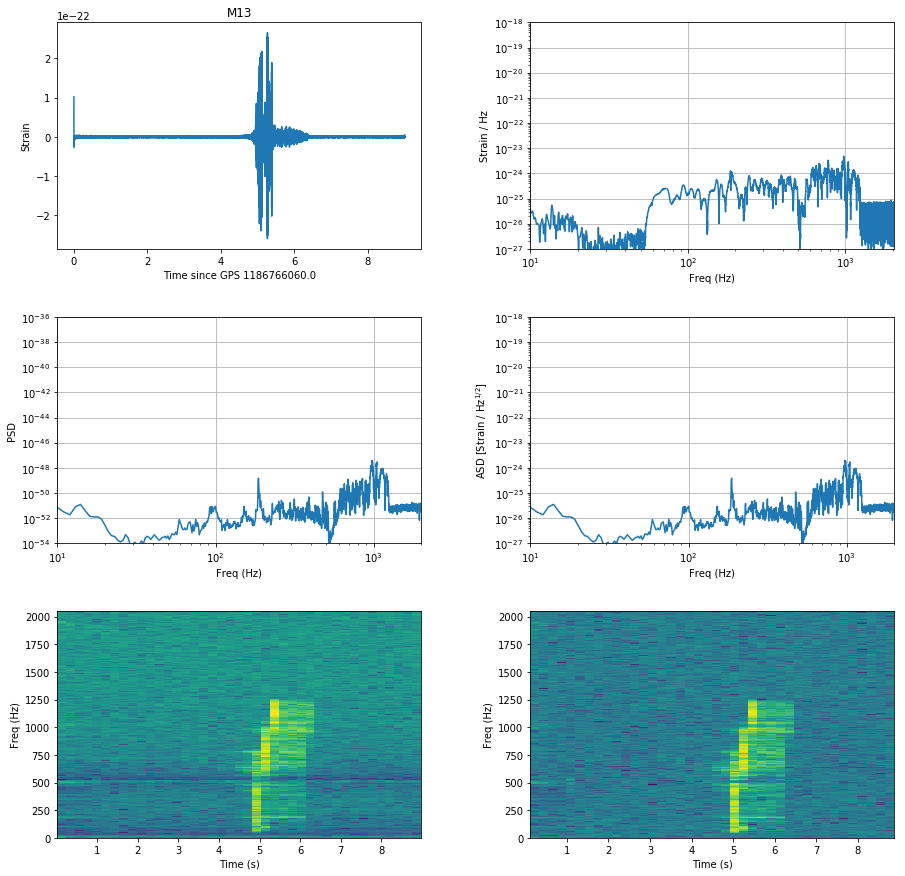

In [159]:
M13_plots(e)

threshold:
0


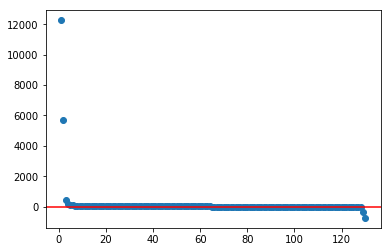

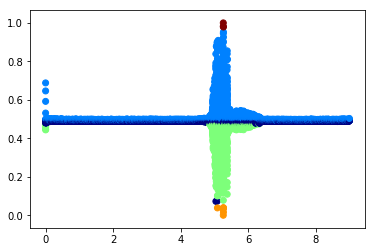

AMI:
0.242097321712


In [160]:
AdaWave_plots(e, time4 - time4[0])

## 80Kpc

In [161]:
x=noisy_amp_M13[R1[8]-1]
e=err(c,x)

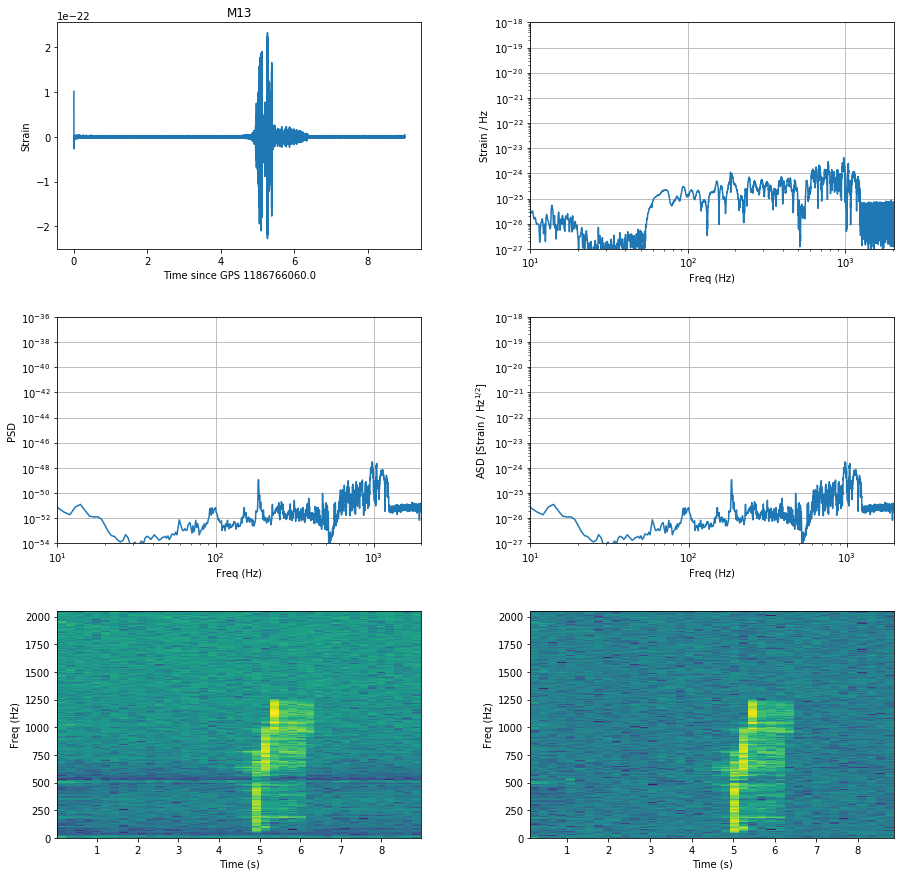

In [162]:
M13_plots(e)

threshold:
0


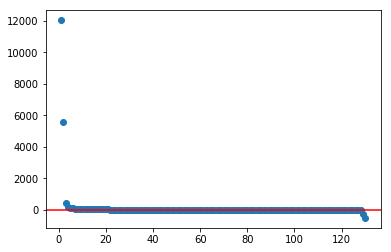

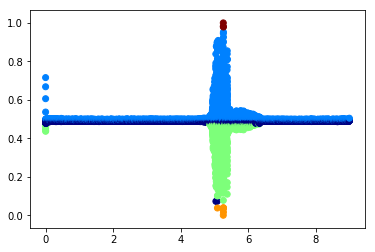

AMI:
0.251504504681


In [163]:
AdaWave_plots(e, time4 - time4[0])

## 90Kpc

In [164]:
x=noisy_amp_M13[R1[9]-1]
e=err(c,x)

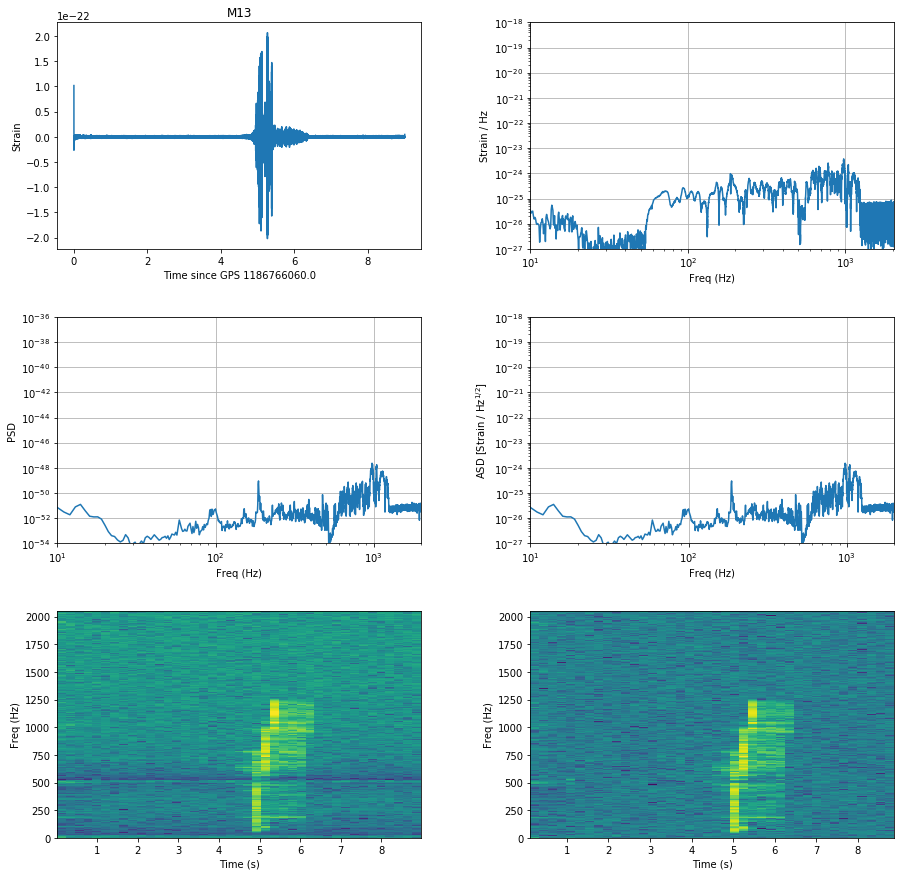

In [165]:
M13_plots(e)

threshold:
0


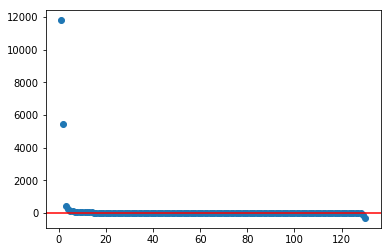

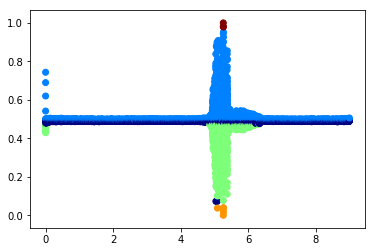

AMI:
0.258173783749


In [166]:
AdaWave_plots(e, time4 - time4[0])

## 100Kpc

In [167]:
x=noisy_amp_M13[R1[10]-1]
e=err(c,x)

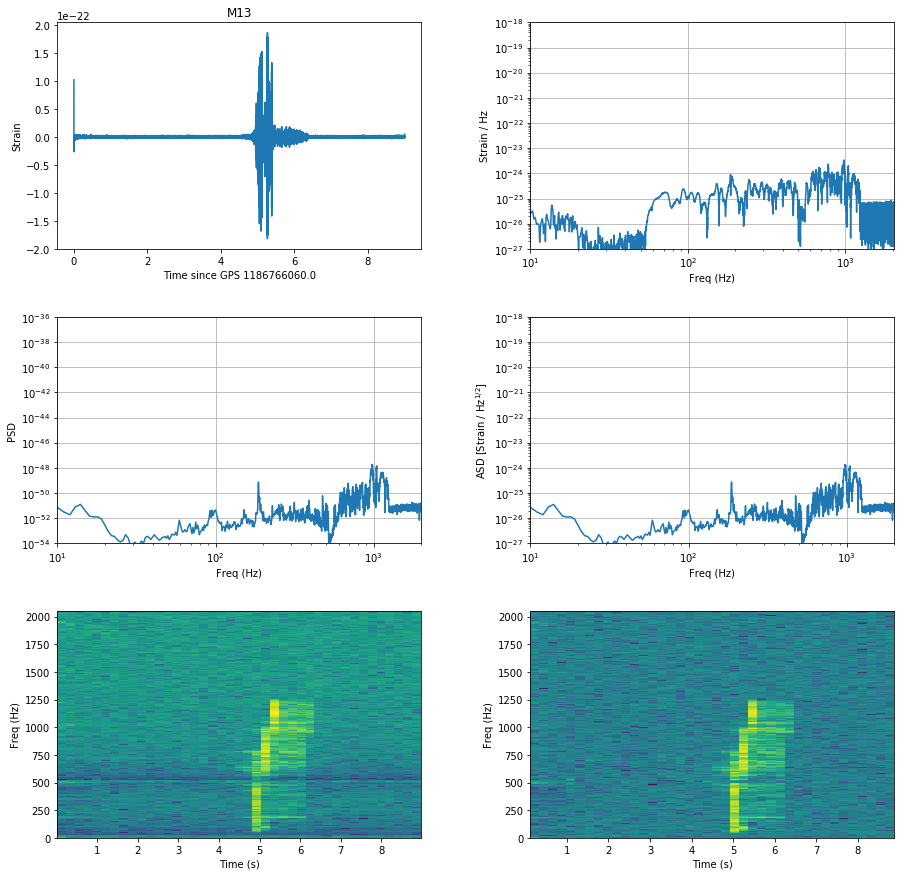

In [168]:
M13_plots(e)

threshold:
0


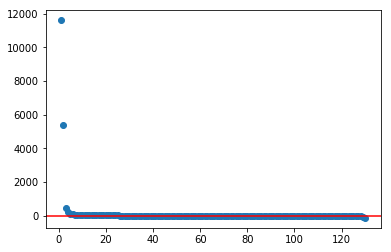

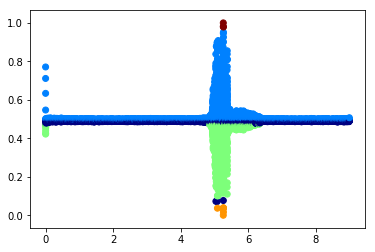

AMI:
0.263141587125


In [169]:
AdaWave_plots(e, time4 - time4[0])